In [1]:
import GRN
import GRNCreationUtils
from utils import *
from genesGroup import subgraph3N
import pandas as pd
import networkx as nx
import matplotlib as plt

# Functions

In [ ]:
import networkx as nx
import itertools
from collections import Counter
from networkx.algorithms.isomorphism import DiGraphMatcher

def generate_motif_templates():
    """Returns a dictionary of canonical 3-node motif templates."""
    templates = {}

    def add_motif(name, edges):
        G = nx.DiGraph()
        G.add_edges_from(edges)
        templates[name] = G

    # Basic motif types (based on Alon 2002 classification)
    add_motif("Fan-In", [(1, 0), (2, 0)])
    add_motif("Fan-Out", [(0, 1), (0, 2)])
    add_motif("Cascade", [(0, 1), (1, 2)])
    add_motif("FFL", [(0, 1), (1, 2), (0, 2)])
    add_motif("FBL", [(0, 1), (1, 2), (2, 0)])
    add_motif("Bi-Mutual", [(0, 1), (1, 0), (1, 2), (2, 1)])
    add_motif("Clique", [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1)])
    # Add more motifs if needed

    return templates


def classify_subgraph(subG, motif_templates):
    """Matches a 3-node subgraph to a motif type using isomorphism."""
    for name, motifG in motif_templates.items():
        matcher = DiGraphMatcher(subG, motifG)
        if matcher.is_isomorphic():
            return name
    return "Other"


def count_motifs(G):
    """
    Enumerates and classifies all 3-node subgraphs in a directed graph.
    
    Returns:
        motif_counts (Counter): motif type -> count
    """
    motif_templates = generate_motif_templates()
    motif_counts = Counter()
    
    for nodes in itertools.combinations(G.nodes, 3):
        subG = G.subgraph(nodes).copy()
        if nx.is_weakly_connected(subG):  # Optional: only count connected
            motif_type = classify_subgraph(subG, motif_templates)
            motif_counts[motif_type] += 1

    return motif_counts


def randomize_graph(G, n_swaps=1000, seed=None):
    """
    Returns a randomized version of the graph preserving in/out-degree distribution.
    Uses the Maslov-Sneppen edge-rewiring algorithm.
    """
    G_rand = G.copy()
    nx.double_edge_swap(G_rand, n_swaps=n_swaps, max_tries=n_swaps * 10, seed=seed)
    return G_rand

# GRNgene simulations

## Ecoli size equivalent network: 1565 genes

In [7]:
# Set parameters

nbgene = 1565
autoRG = 0
duoRG = 0
an = 5

G = GRN.random_grn(genesNb=nbgene,
              autoRG=autoRG,
              duoRG=duoRG,
              an=an
              )

# Load the adjacency matrix as binary
def adj_mx_binary(adj_mx):
    binary_adj_mx = adj_mx.copy()
    binary_adj_mx[binary_adj_mx!=0] = 1.
    return binary_adj_mx

grgene_adj_mx = adj_mx_binary(G['AdjMatrice'])

In [70]:
G = nx.from_numpy_array(grgene_adj_mx, create_using=nx.DiGraph())

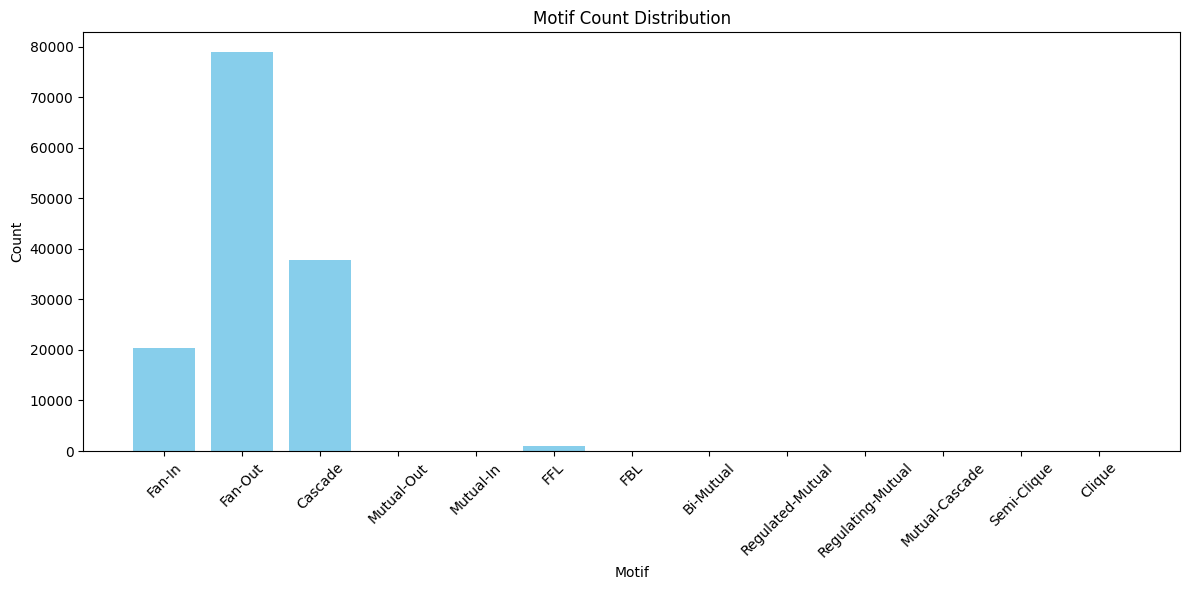

In [78]:
plot_motifs_count(motifs_count)

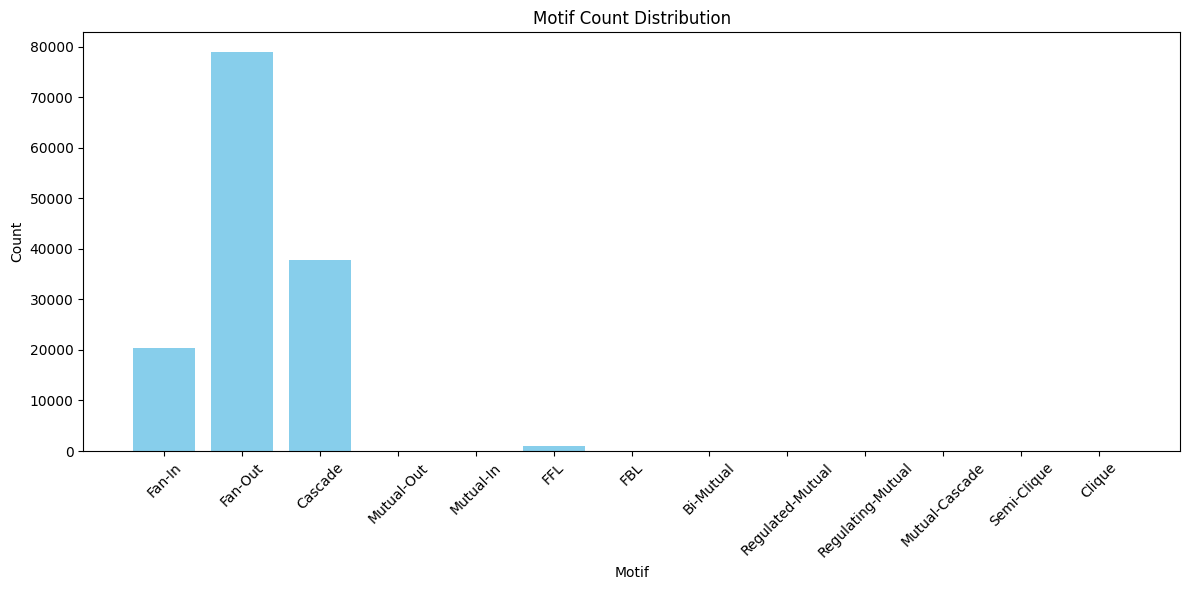

In [31]:
motifs_count=get_all_motifs_count(G['subGraph'])

# Plot the motifs count
plot_motifs_count(motifs_count)

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


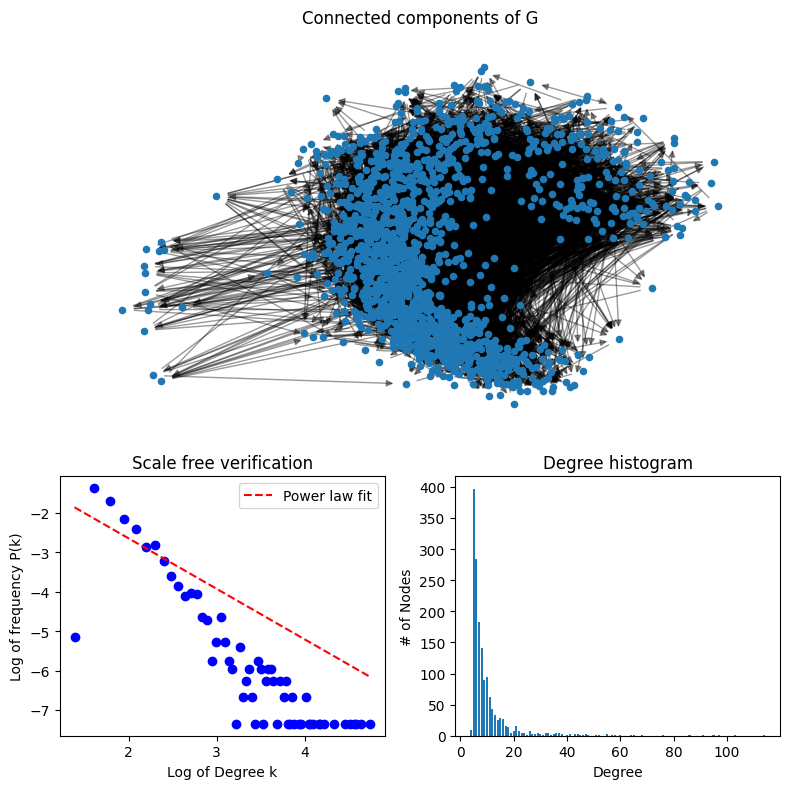

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.28145721651952504
Fitted power law parameters: a = 0.92, b = -1.28


In [ ]:
# Plot the degree distribution
plot_grn_degree(grgene_adj_mx, plot_network=True)

## GRNgene 100 gene

In [32]:
# Set parameters

nbgene = 100
autoRG = 0
duoRG = 0
an = 5

G = GRN.random_grn(genesNb=nbgene,
              autoRG=autoRG,
              duoRG=duoRG,
              an=an
              )

# Load the adjacency matrix as binary

grgene_adj_mx = adj_mx_binary(G['AdjMatrice'])

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


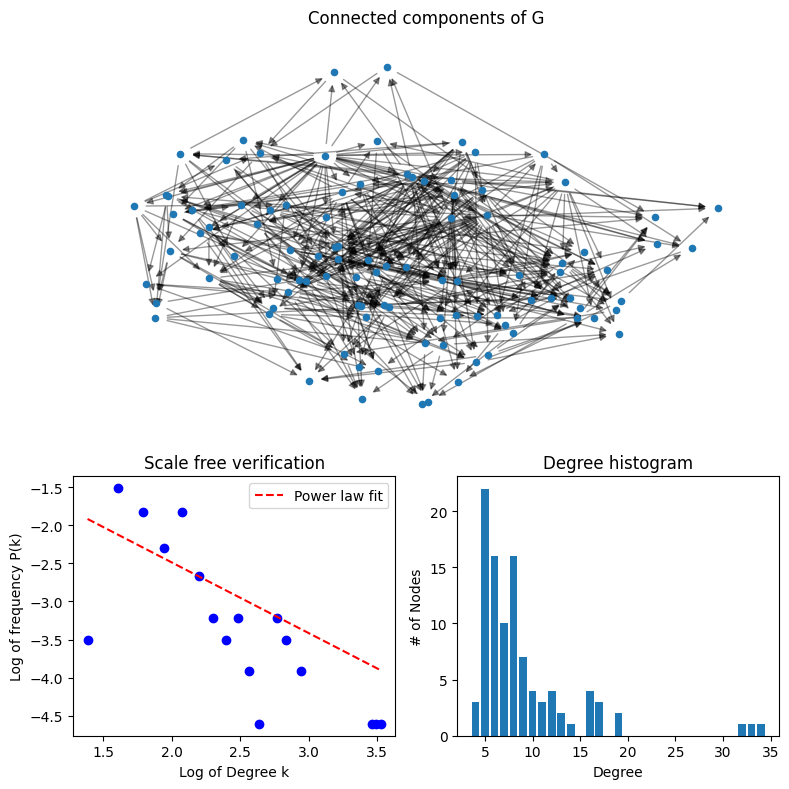

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.2662430372619598
Fitted power law parameters: a = 0.53, b = -0.93


In [33]:
# Plot the degree distribution
plot_grn_degree(grgene_adj_mx, plot_network=True)

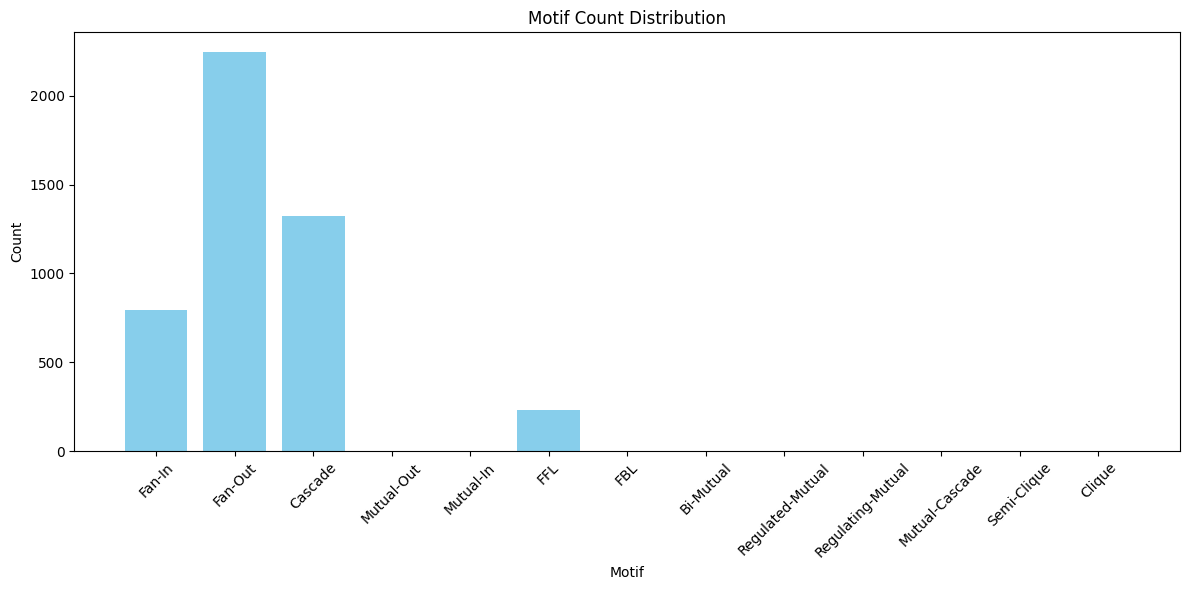

In [34]:
grngene_100_motifs_count=get_all_motifs_count(G['subGraph'])

# Plot the motifs count
plot_motifs_count(grngene_100_motifs_count)

# Evaluating the effect of barabasi algoritm parameter

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


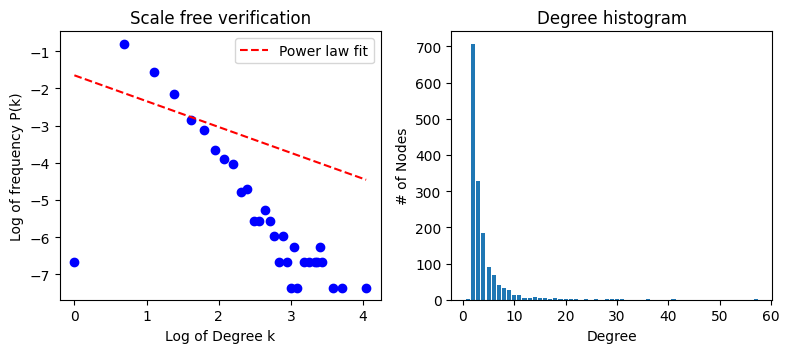

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5289210242746188
Fitted power law parameters: a = 0.19, b = -0.69
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


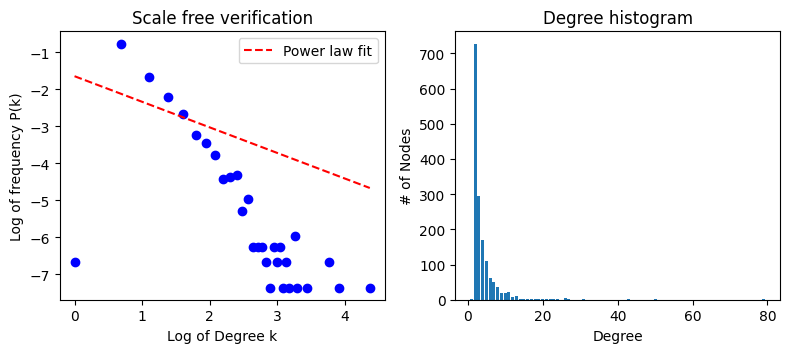

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5321406584451059
Fitted power law parameters: a = 0.19, b = -0.69
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


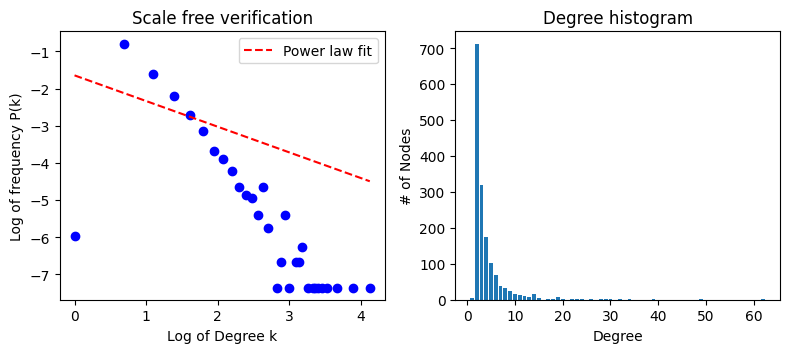

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5314723217527939
Fitted power law parameters: a = 0.19, b = -0.69
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


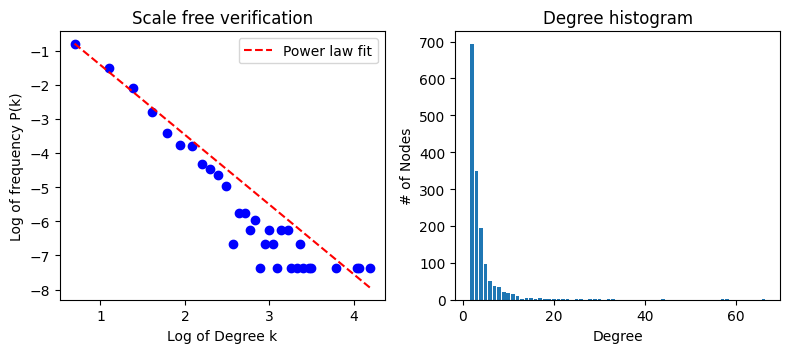

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5253643985031375
Fitted power law parameters: a = 1.86, b = -2.04
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


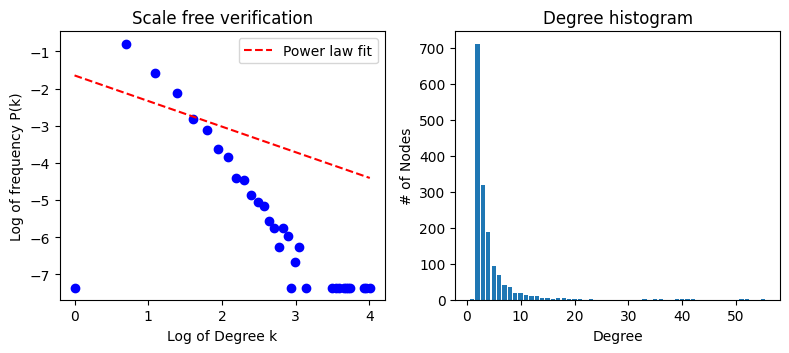

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.533671093416562
Fitted power law parameters: a = 0.19, b = -0.69
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


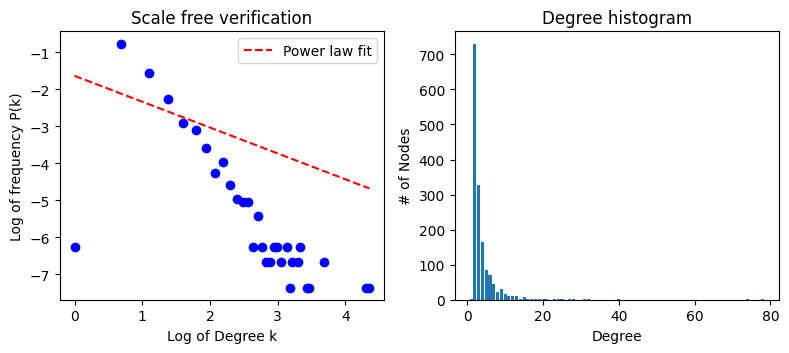

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5315339928500986
Fitted power law parameters: a = 0.20, b = -0.70
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


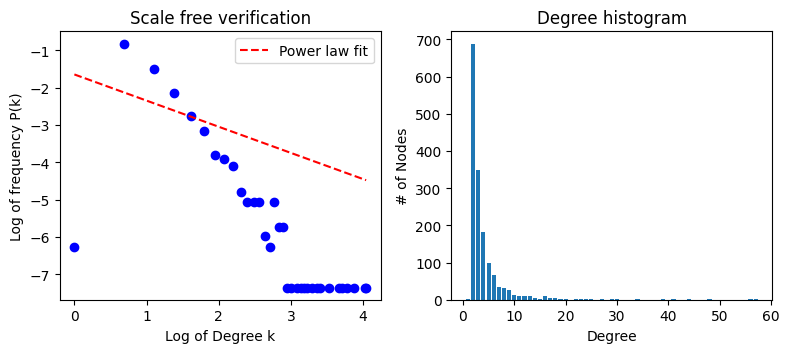

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5255948169443331
Fitted power law parameters: a = 0.19, b = -0.70
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


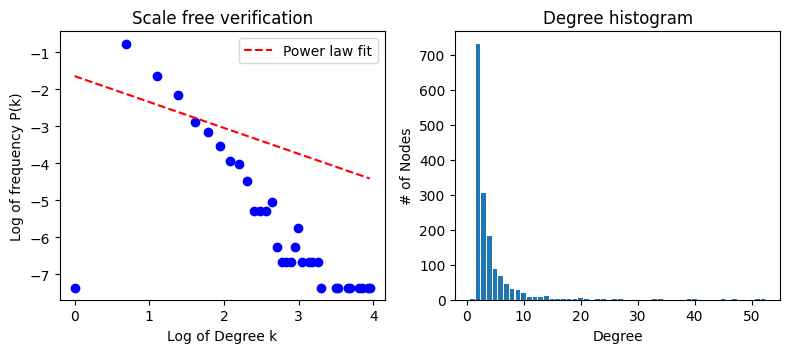

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5287947537052481
Fitted power law parameters: a = 0.19, b = -0.70
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


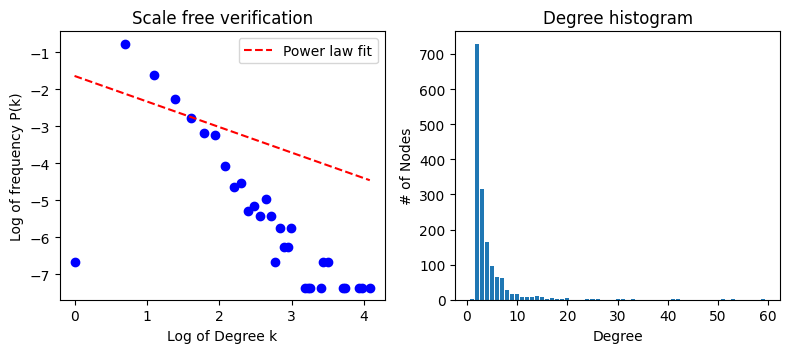

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5265700783529385
Fitted power law parameters: a = 0.19, b = -0.69
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


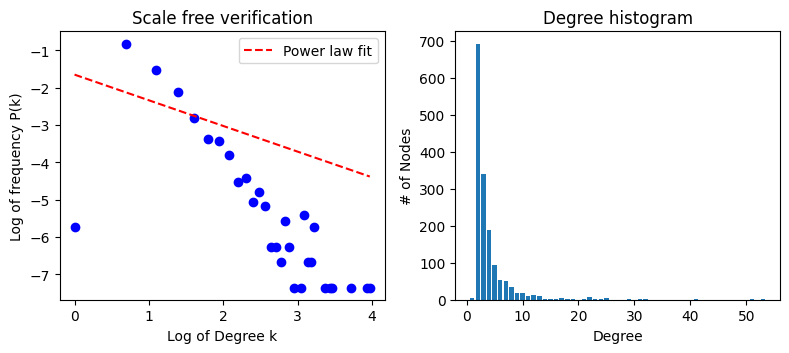

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5306868097568789
Fitted power law parameters: a = 0.19, b = -0.69


In [ ]:
# Set parameters
an = 2
for i in range(10):
    nbgene = 1565
    autoRG = 0
    duoRG = 0
    G = GRN.random_grn(genesNb=nbgene,
                autoRG=autoRG,
                duoRG=duoRG,
                an=an
                )
    grgene_adj_mx = adj_mx_binary(G['AdjMatrice'])
    plot_grn_degree(grgene_adj_mx)

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


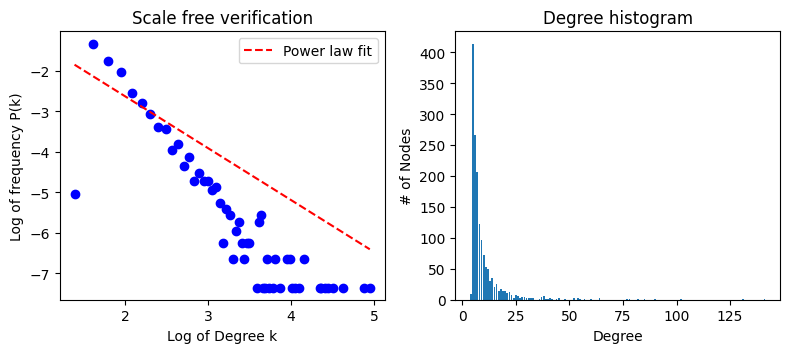

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.2881703711572769
Fitted power law parameters: a = 0.92, b = -1.28
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


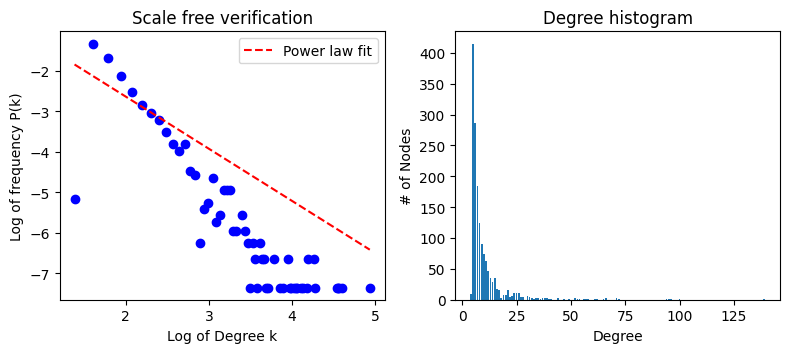

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.2760984019705227
Fitted power law parameters: a = 0.94, b = -1.29
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


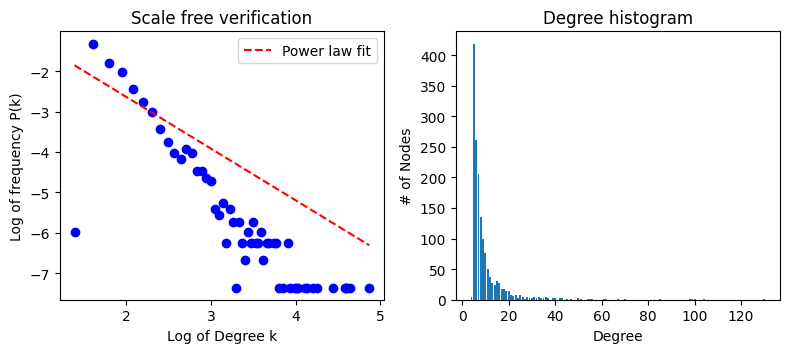

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.27899643641681504
Fitted power law parameters: a = 0.92, b = -1.28
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


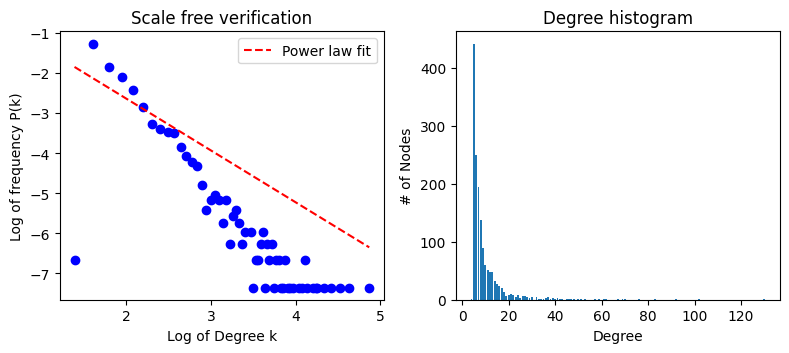

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.2795111450669849
Fitted power law parameters: a = 0.95, b = -1.29
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


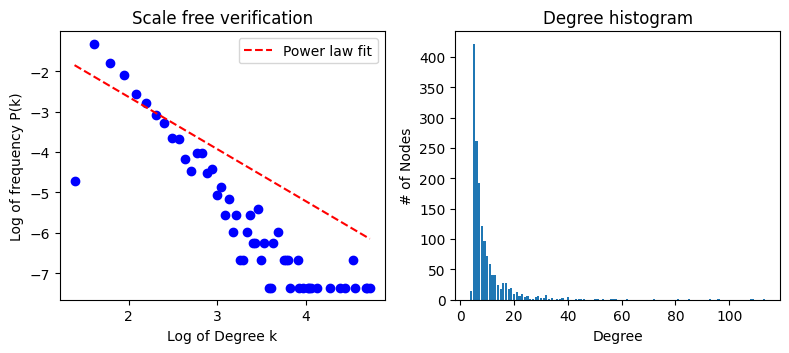

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.2829606171357013
Fitted power law parameters: a = 0.94, b = -1.29
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


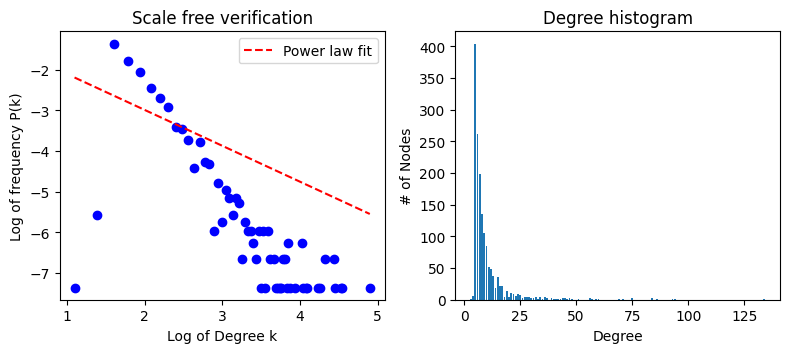

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.28104366557832394
Fitted power law parameters: a = 0.30, b = -0.88
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


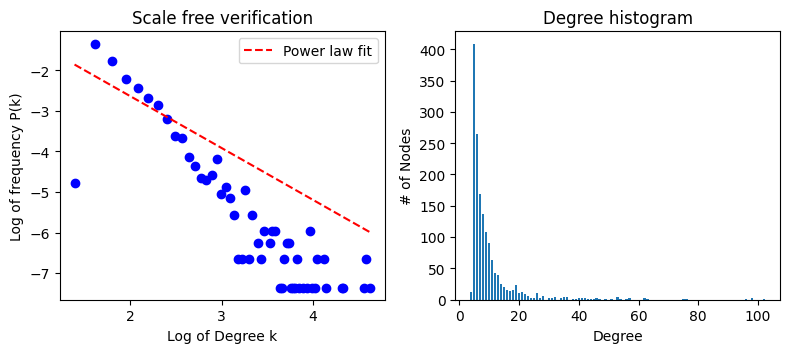

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.28049399894711513
Fitted power law parameters: a = 0.91, b = -1.28
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


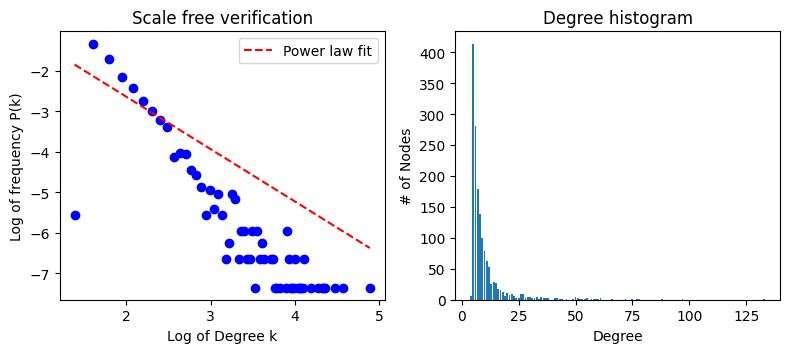

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.2872423008545009
Fitted power law parameters: a = 0.94, b = -1.29
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


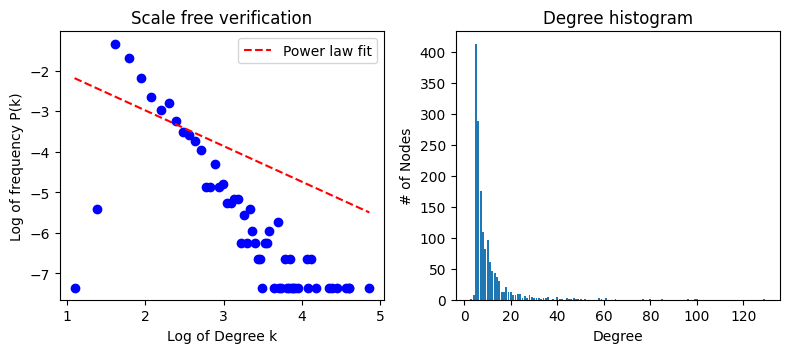

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.27968558445747543
Fitted power law parameters: a = 0.30, b = -0.88
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


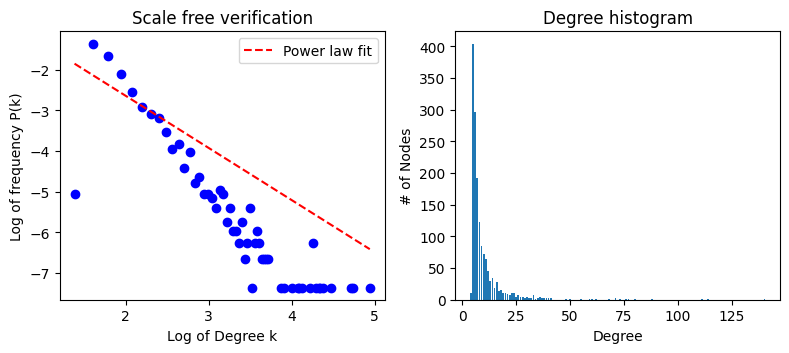

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.28673429287494223
Fitted power law parameters: a = 0.93, b = -1.28


In [ ]:
# Set parameters
an = 5
for i in range(10):
    nbgene = 1565
    autoRG = 0
    duoRG = 0
    G = GRN.random_grn(genesNb=nbgene,
                autoRG=autoRG,
                duoRG=duoRG,
                an=an
                )
    grgene_adj_mx = adj_mx_binary(G['AdjMatrice'])
    plot_grn_degree(grgene_adj_mx)

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


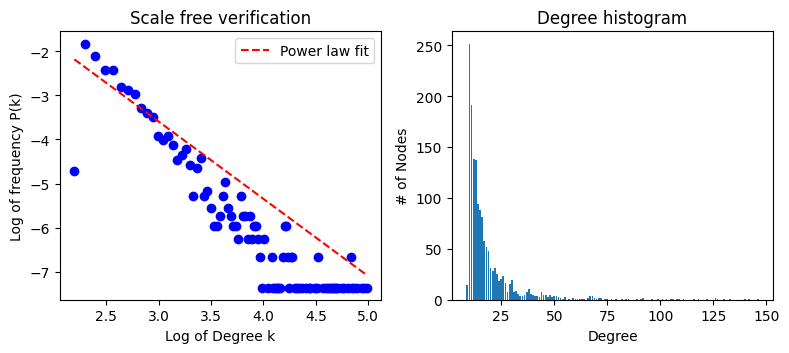

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.18850572242118713
Fitted power law parameters: a = 5.29, b = -1.75
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


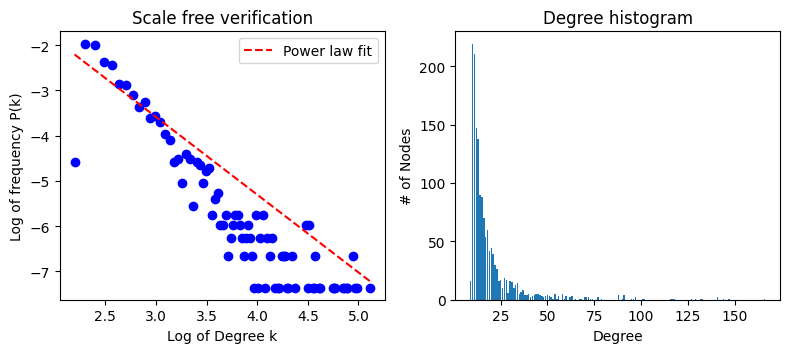

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.19088137548175255
Fitted power law parameters: a = 4.80, b = -1.72
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


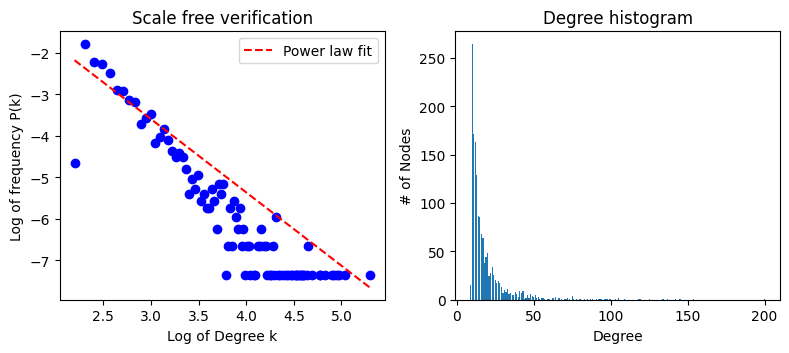

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.19123956349597368
Fitted power law parameters: a = 5.49, b = -1.77
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


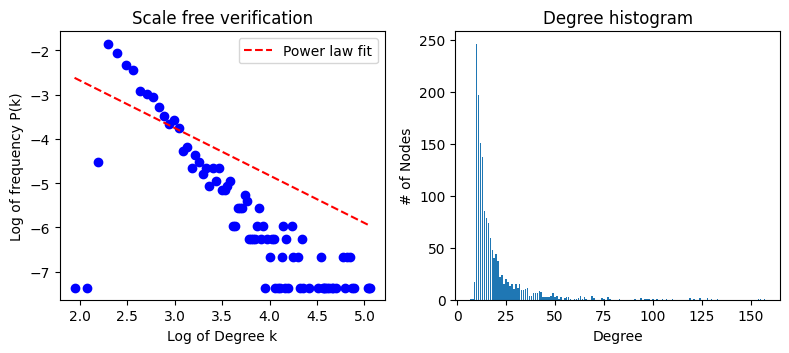

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.18693563769517388
Fitted power law parameters: a = 0.59, b = -1.07
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


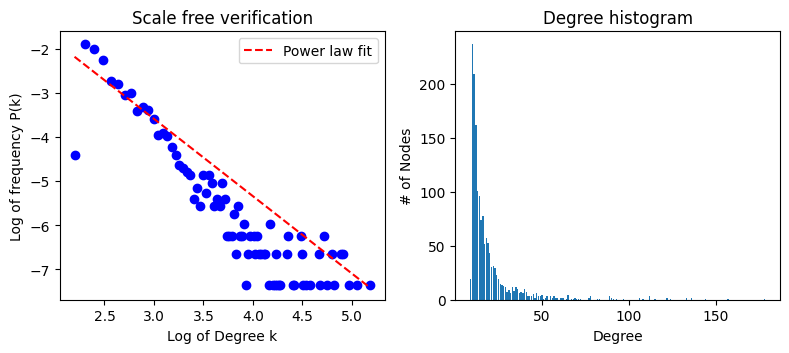

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.18593750674984752
Fitted power law parameters: a = 5.28, b = -1.75
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


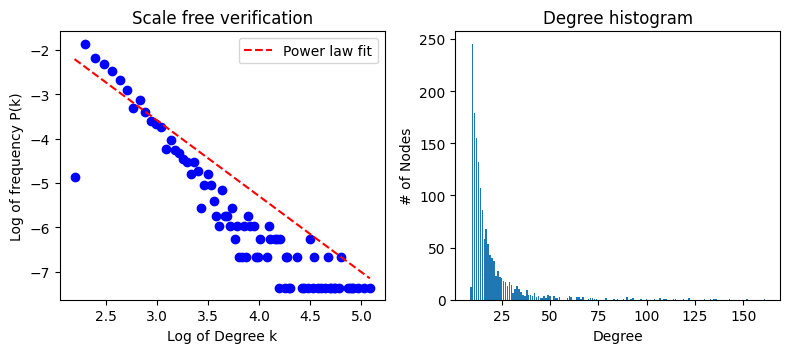

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.18819264892758863
Fitted power law parameters: a = 4.77, b = -1.71
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


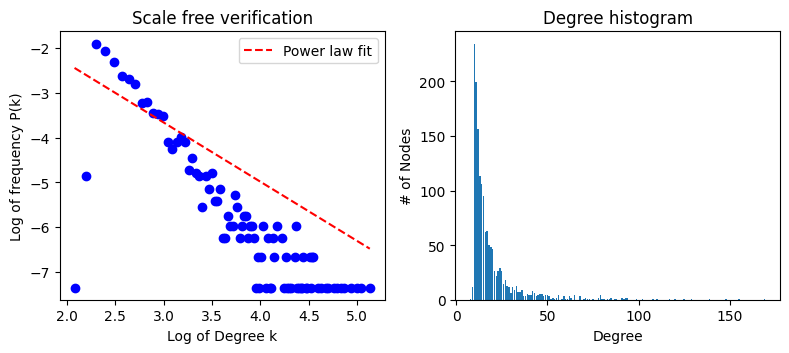

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.1874005939618774
Fitted power law parameters: a = 1.37, b = -1.33
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


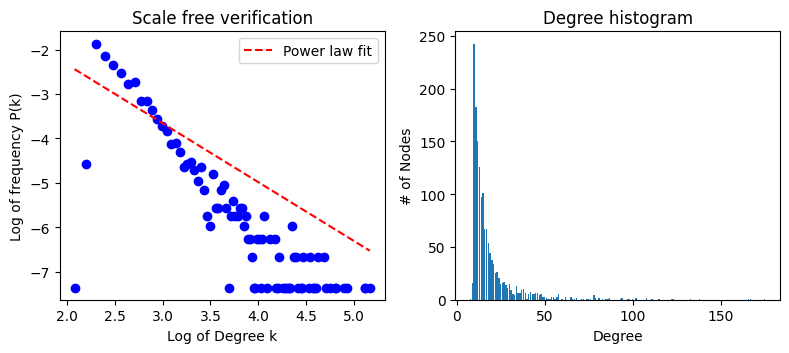

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.1871672450660898
Fitted power law parameters: a = 1.37, b = -1.32
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


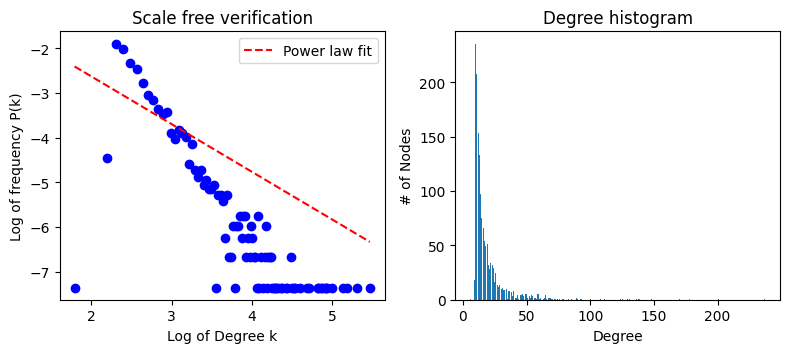

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.18761558453979946
Fitted power law parameters: a = 0.61, b = -1.07
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


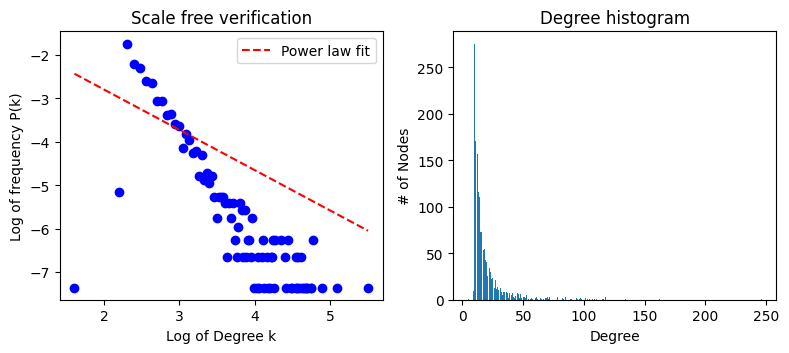

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.18558850098877658
Fitted power law parameters: a = 0.39, b = -0.93


In [ ]:
# Set parameters
an = 10
for i in range(10):
    nbgene = 1565
    autoRG = 0
    duoRG = 0
    G = GRN.random_grn(genesNb=nbgene,
                autoRG=autoRG,
                duoRG=duoRG,
                an=an
                )
    grgene_adj_mx = adj_mx_binary(G['AdjMatrice'])
    plot_grn_degree(grgene_adj_mx)

# GeneNetWeaver simulations

## Full E.coli network

Plotting the graph and the distribution...
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


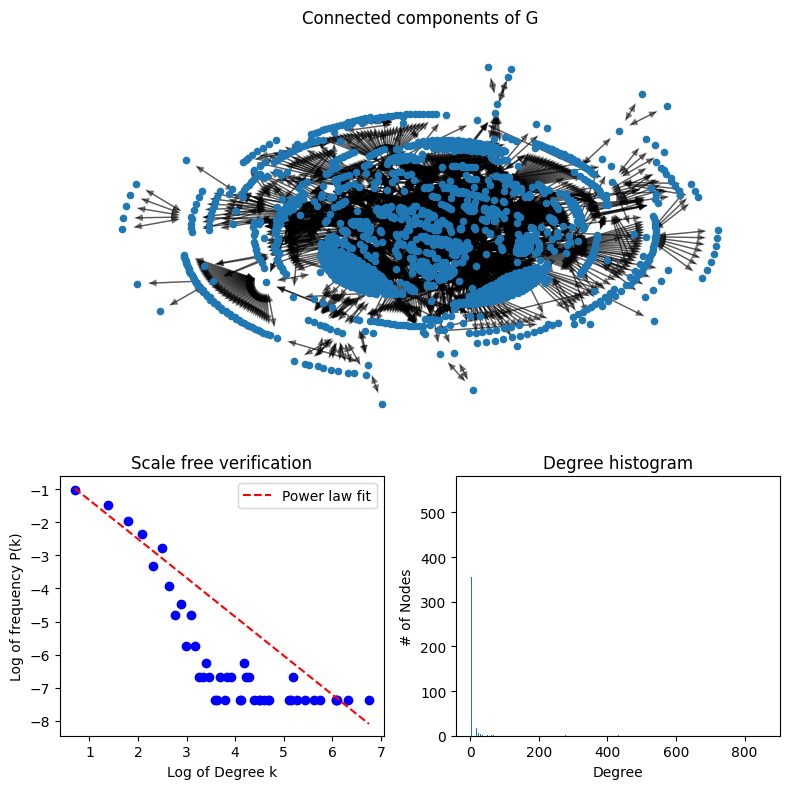

Graph strongly connected: False
Graph weakly connected: False
Modularity of the graph: 0.5577196972821129
Fitted power law parameters: a = 0.86, b = -1.17
Computing the graph properties...


In [ ]:
'''
Full network
'''

filepath = 'data/gnw/Ecoli-full.tsv'
adj_mx = adj_mx_gnw_goldstandard(filepath)
plot_grn_degree(adj_mx, plot_network=True)
gnw_properties = graph_properties(adj_mx)

In [97]:
filepath = 'data/gnw/Ecoli-full.tsv'
df = pd.read_csv(filepath, sep="\t", header=None, names=["source", "target", "interaction"])
active_edges = df[df["interaction"] == 1]
G = nx.from_pandas_edgelist(active_edges, source="source", target="target",create_using=nx.DiGraph)
gnw_motifs = subgraph3N(G)

In [25]:
gnw_motifs

{'acrR-acrA-envR': 'Fan-In',
 'acrR-acrA-rob': 'Fan-In',
 'acrR-acrA-acrB': 'Fan-Out',
 'acrR-acrA-marA': 'Fan-In',
 'acrR-acrA-micF': 'Fan-Out',
 'acrR-acrA-phoP': 'Fan-In',
 'acrR-acrA-soxS': 'Fan-In',
 'acrR-acrA-mprA': 'Fan-In',
 'acrR-acrB-envR': 'Fan-In',
 'acrR-acrB-rob': 'Fan-In',
 'acrR-acrB-marA': 'Fan-In',
 'acrR-acrB-micF': 'Fan-Out',
 'acrR-acrB-phoP': 'Fan-In',
 'acrR-acrB-soxS': 'Fan-In',
 'acrR-acrB-mprA': 'Fan-In',
 'acrR-micF-ompR': 'Fan-In',
 'acrR-micF-lrp': 'Fan-In',
 'acrR-micF-hupB': 'Fan-In',
 'acrR-micF-hns': 'Fan-In',
 'acrR-micF-rob': 'Fan-In',
 'acrR-micF-marA': 'Fan-In',
 'acrR-micF-ihfB': 'Fan-In',
 'acrR-micF-hupA': 'Fan-In',
 'acrR-micF-soxS': 'Fan-In',
 'acrR-micF-ihfA': 'Fan-In',
 'ada-alkB-aidB': 'Fan-Out',
 'ada-alkB-alkA': 'Fan-Out',
 'ada-alkA-aidB': 'Fan-Out',
 'ada-aidB-lrp': 'Fan-In',
 'adiY-adiA-hns': 'Fan-In',
 'adiY-adiA-ihfB': 'Fan-In',
 'adiY-adiA-ihfA': 'Fan-In',
 'agaR-kbaY-agaD': 'Fan-Out',
 'agaR-kbaY-agaB': 'Fan-Out',
 'agaR-kbaY-agaS'

In [ ]:


#motifs_count=get_all_motifs_count(gnw_motifs)

In [ ]:
motifs_count

{'Fan-In': 3497,
 'Fan-Out': 258671,
 'Cascade': 3773,
 'Mutual-Out': 1022,
 'Mutual-In': 30,
 'FFL': 956,
 'FBL': 0,
 'Bi-Mutual': 1,
 'Regulated-Mutual': 434,
 'Regulating-Mutual': 12,
 'Mutual-Cascade': 0,
 'Semi-Clique': 2,
 'Clique': 1}

In [54]:
motifs_count.values()

dict_values([3497, 258671, 3773, 1022, 30, 956, 0, 1, 434, 12, 0, 2, 1])

In [ ]:
def boxplot_motif_distribution(result_path):
    with open(result_path, 'rb') as f:
        loaded_result = pickle.load(f)
    sorted_results = dict(sorted(loaded_result.items()))

    runlist = sorted_results.keys()
    
    ngene = len(sorted_results[0]['ground_truth']['Graph'].nodes) #To update for better identification of gene number in the data
    
    gt_motif_count = [sorted_results[runnb]['ground_truth']['motif_count'] for runnb in runlist]
    inf_motif_count = [sorted_results[runnb]['inferred']['motif_count'] for runnb in runlist]

    df_gt_motif_count = pd.DataFrame(gt_motif_count)
    df_gt_motif_count['Origin'] = 'ground_truth'
    df_inf_motif_count = pd.DataFrame(inf_motif_count)
    df_inf_motif_count['Origin'] = 'inferred'
    df_combined = pd.concat([df_gt_motif_count, df_inf_motif_count], ignore_index=True)
    df_long = df_combined.melt(id_vars='Origin', var_name='Motif', value_name='Count')
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Motif', y='Count', hue='Origin', data=df_long)
    plt.xticks(rotation=45)
    plt.title(f'Comparison of Motif Distributions for {ngene} genes GRN and {len(sorted_results.keys())} simulations')
    plt.tight_layout()
    plt.show()

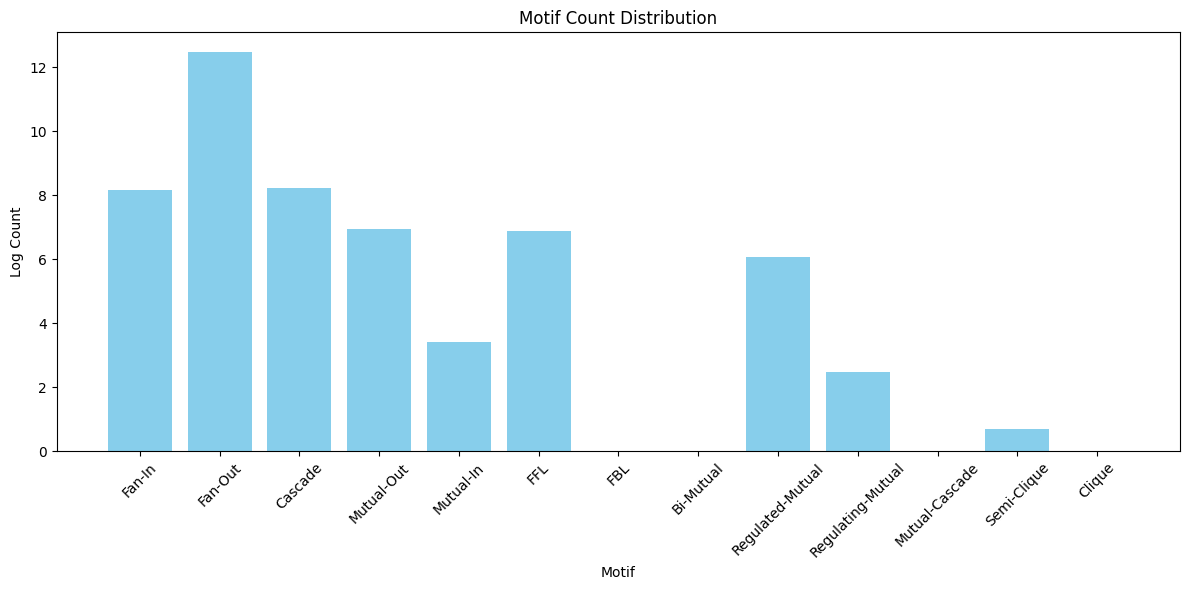

In [98]:
motifs_count=get_all_motifs_count(gnw_motifs)

# Plot the motifs count
plot_motifs_count(motifs_count)

## GRN size 1000

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


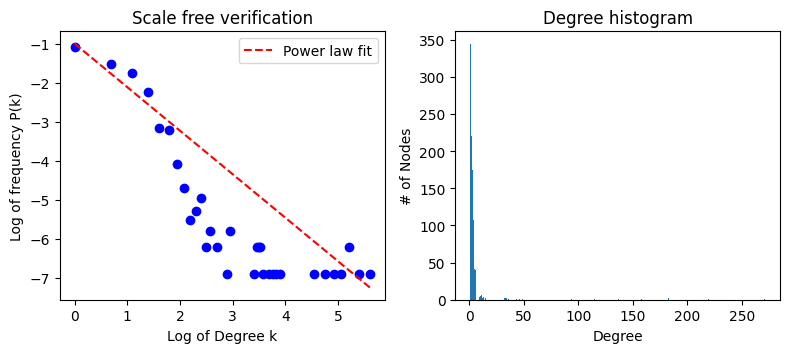

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5681174045412796
Fitted power law parameters: a = 0.37, b = -1.12
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


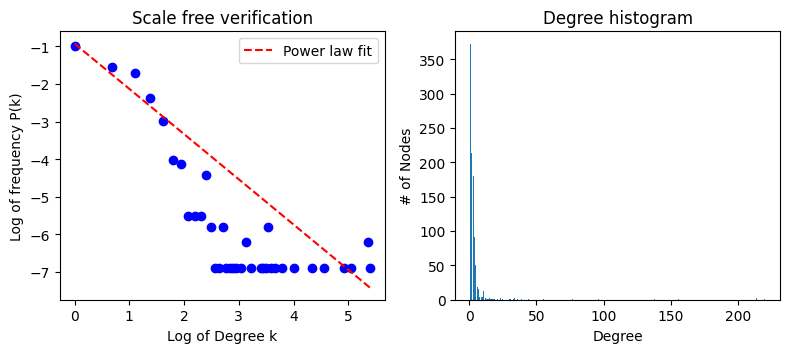

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.6134647913287469
Fitted power law parameters: a = 0.40, b = -1.20
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


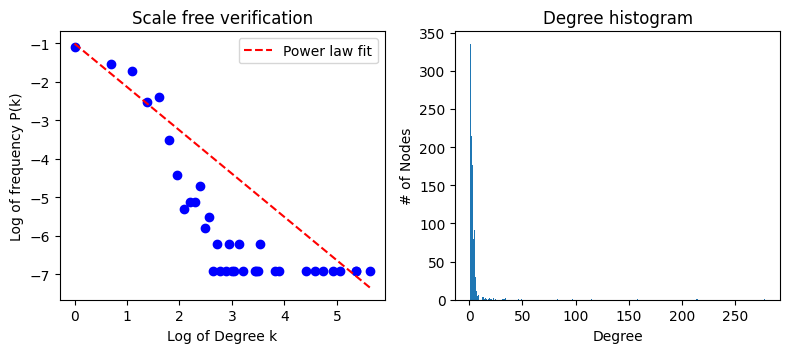

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5945283527430704
Fitted power law parameters: a = 0.36, b = -1.12
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


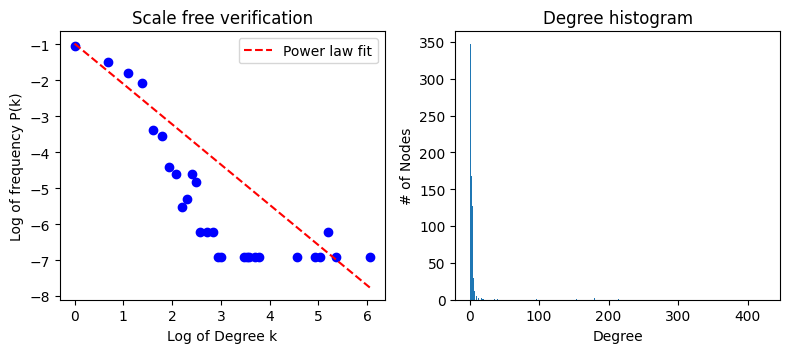

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5633436446054951
Fitted power law parameters: a = 0.38, b = -1.12
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


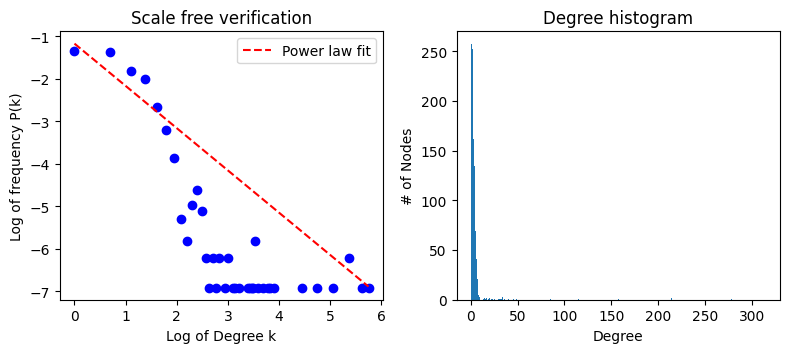

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5601722977070186
Fitted power law parameters: a = 0.31, b = -0.99
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


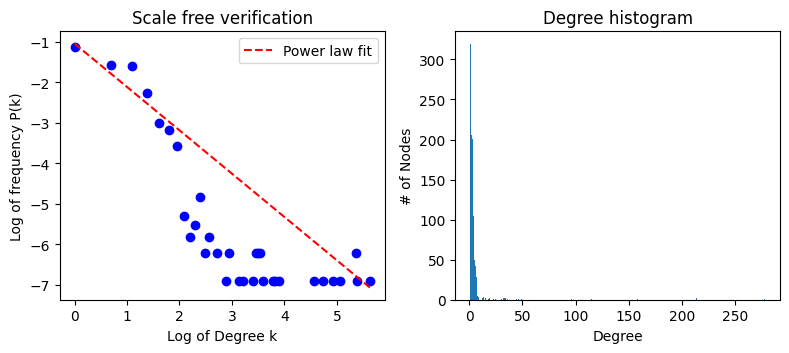

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.555372550487563
Fitted power law parameters: a = 0.35, b = -1.07
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


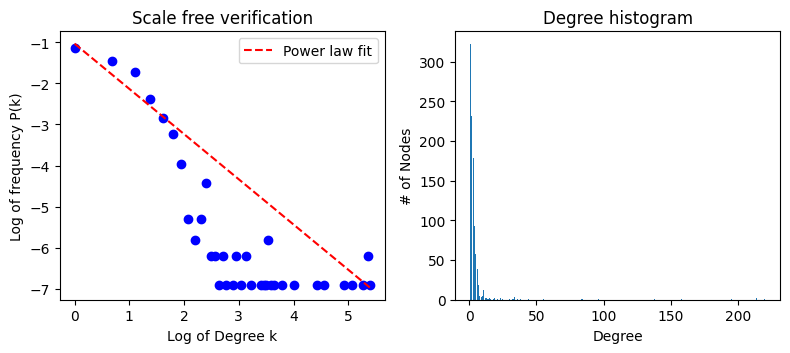

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5754540476140221
Fitted power law parameters: a = 0.36, b = -1.10
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


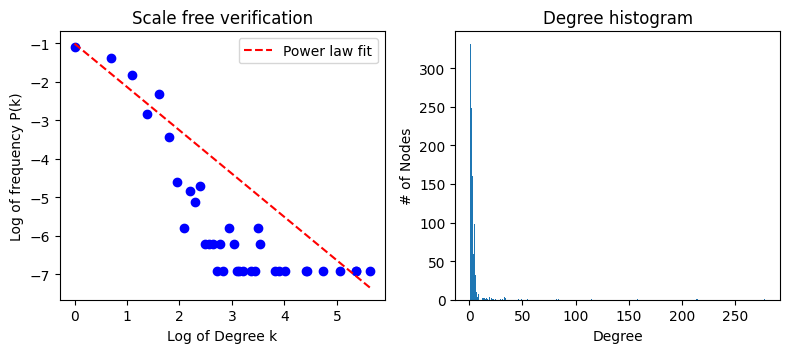

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.6086643993932208
Fitted power law parameters: a = 0.37, b = -1.13
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


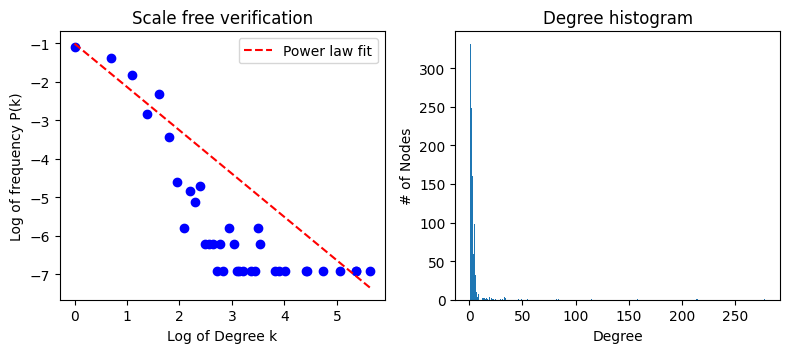

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.6088624902921822
Fitted power law parameters: a = 0.37, b = -1.13


In [6]:
filelist = [f'data/gnw/ecoli-1000-greedy/Ecoli-1000-greedy-{str(i)}.tsv' for i in range(1,10)]
gnw_res_1000 = {}
for filepath in filelist : 
    adj_mx = adj_mx_gnw_goldstandard(filepath)
    plot_grn_degree(adj_mx,plot_network=False)
    gnw_res_1000[filepath] = graph_properties(adj_mx)

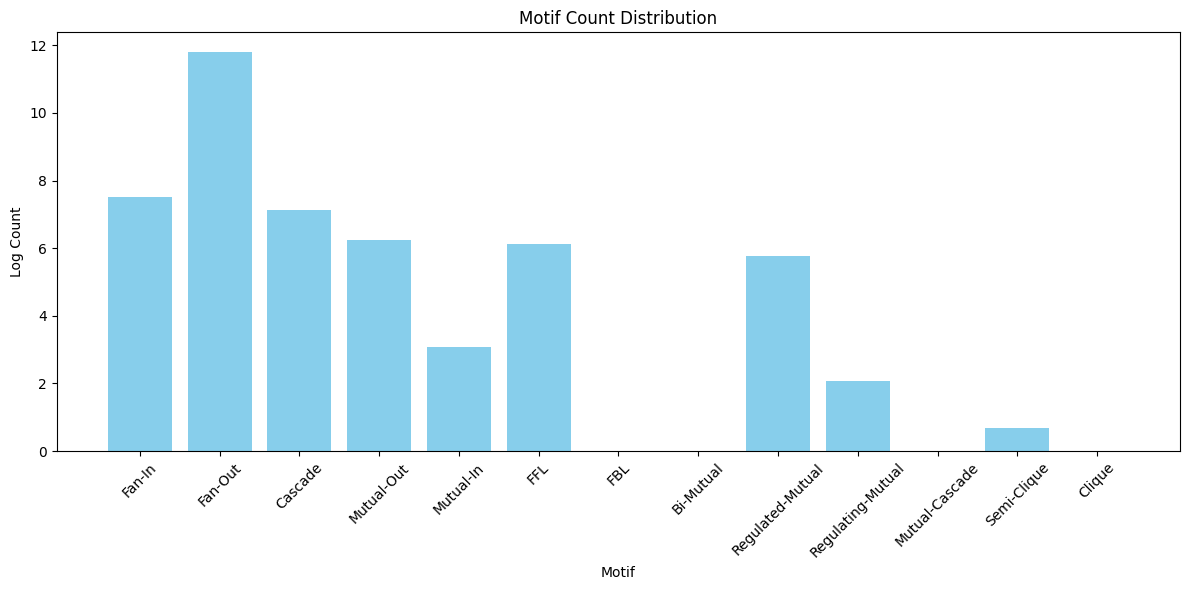

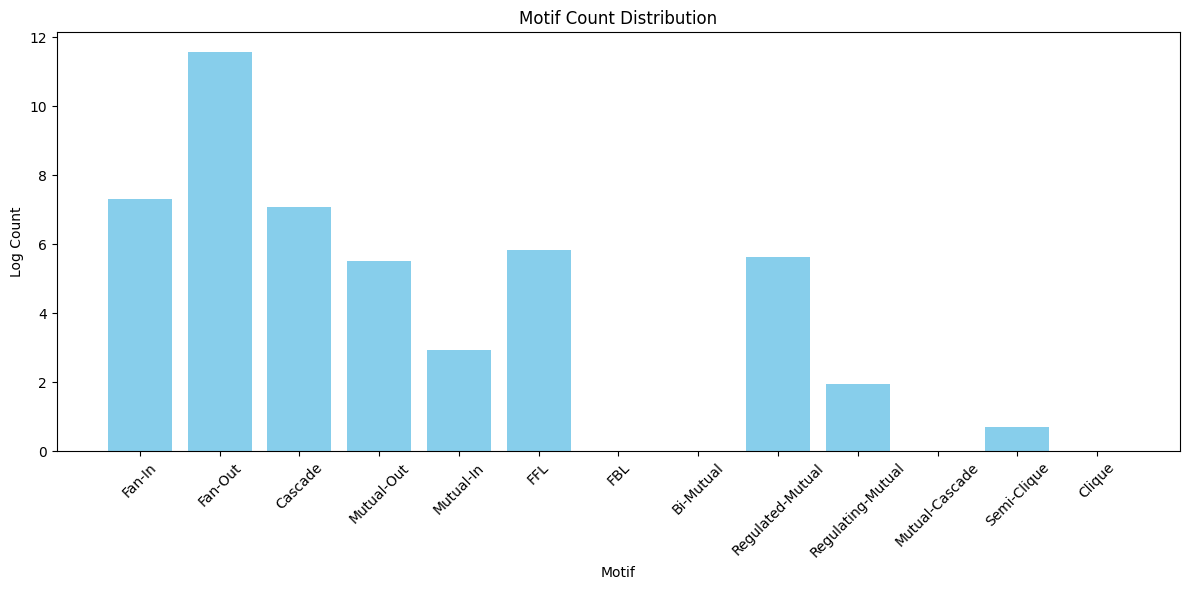

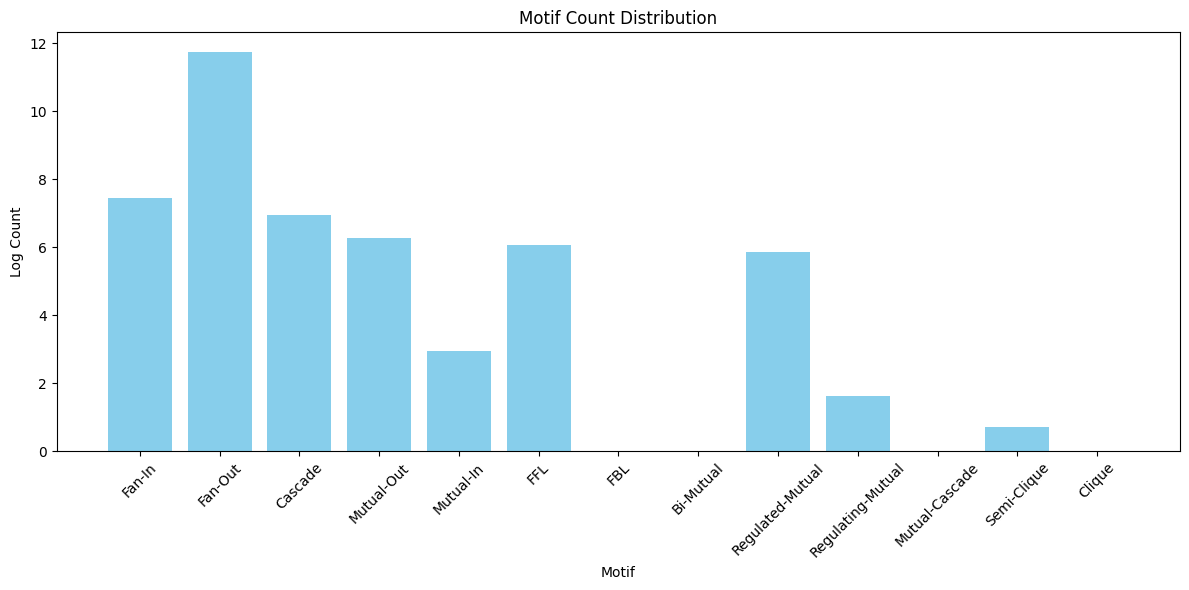

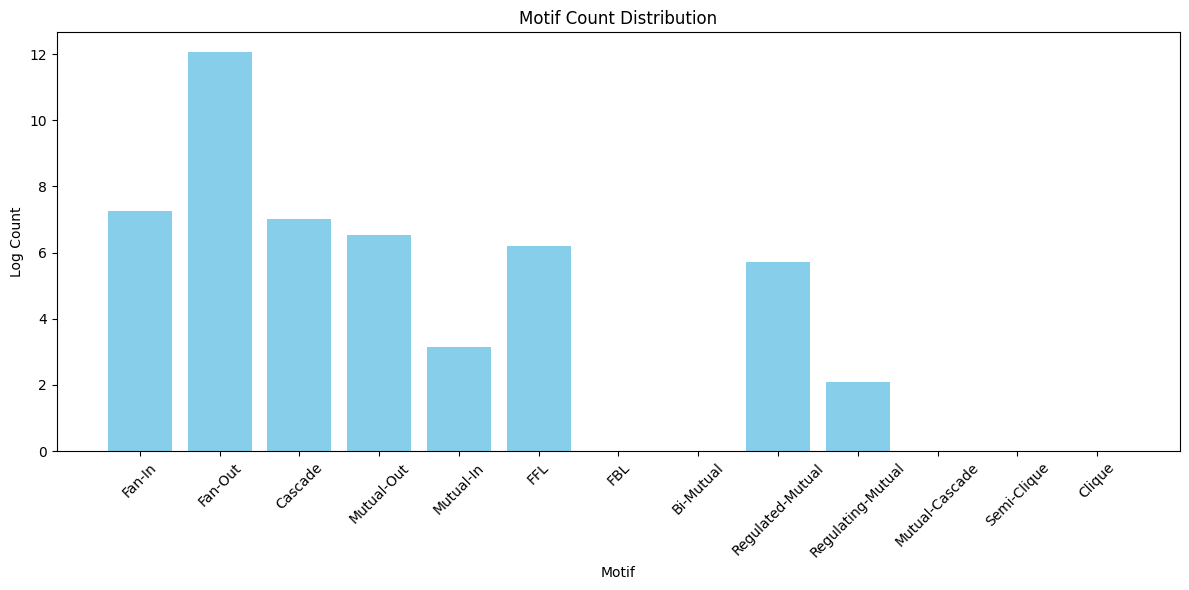

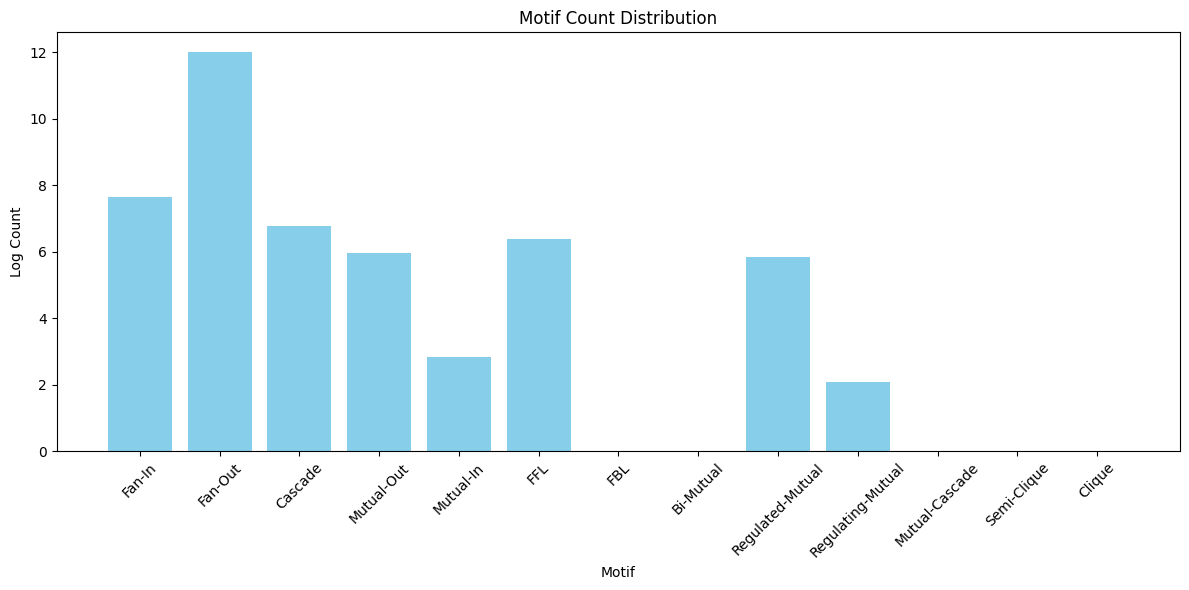

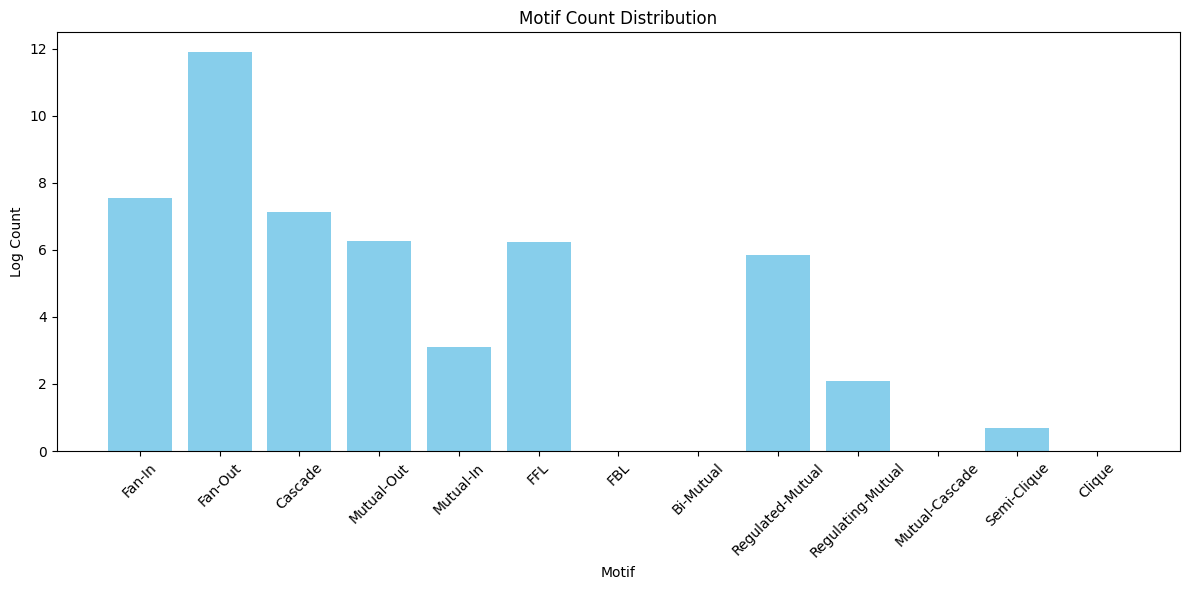

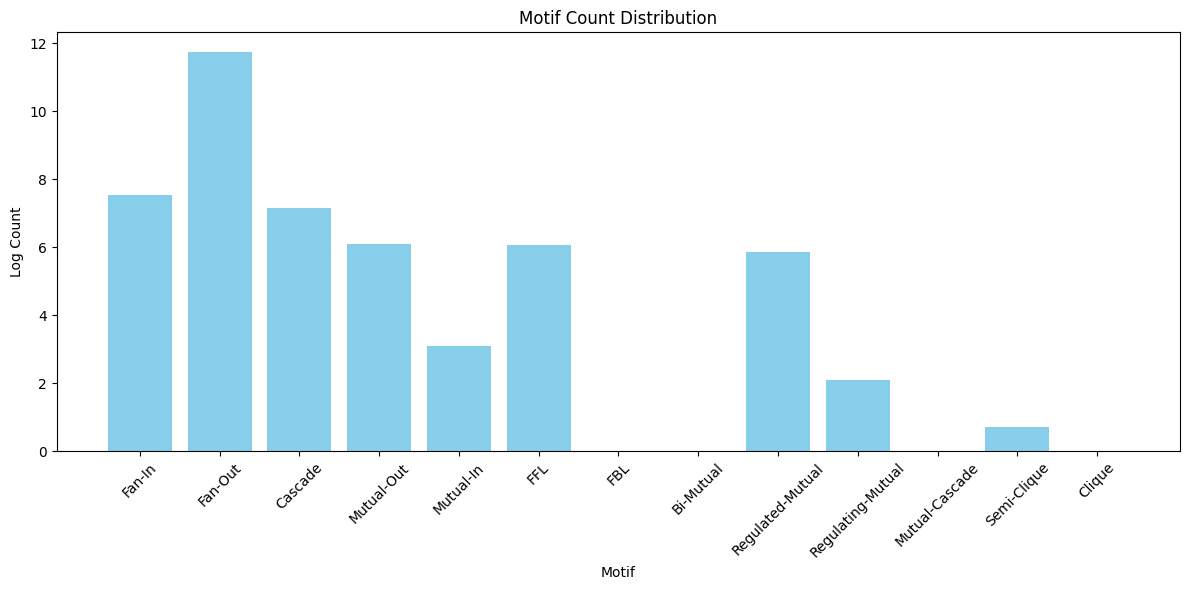

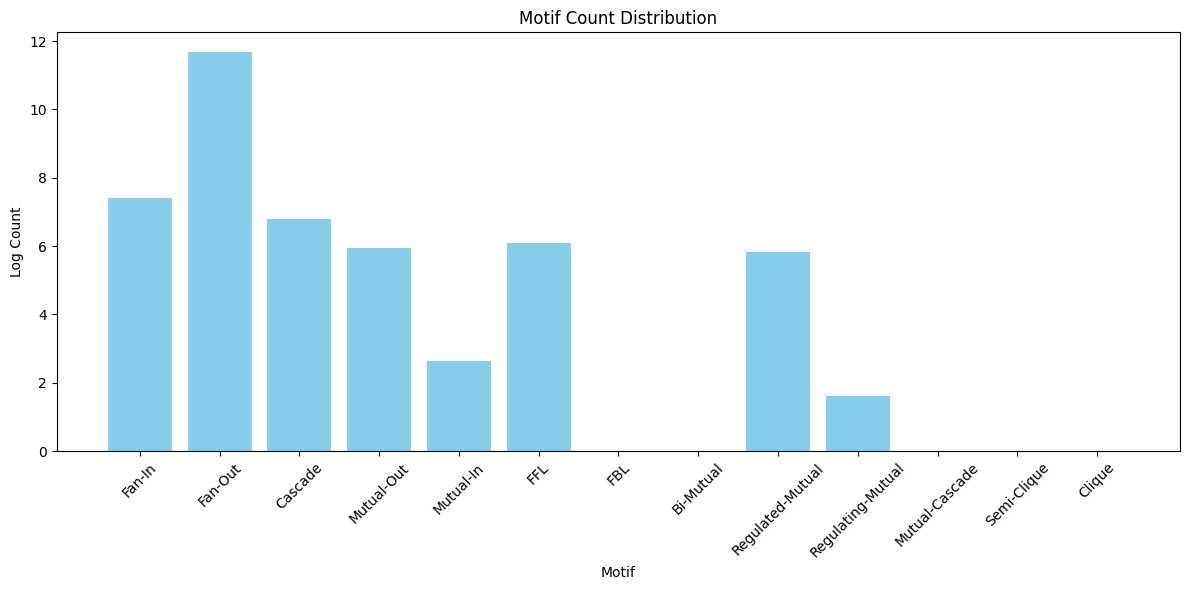

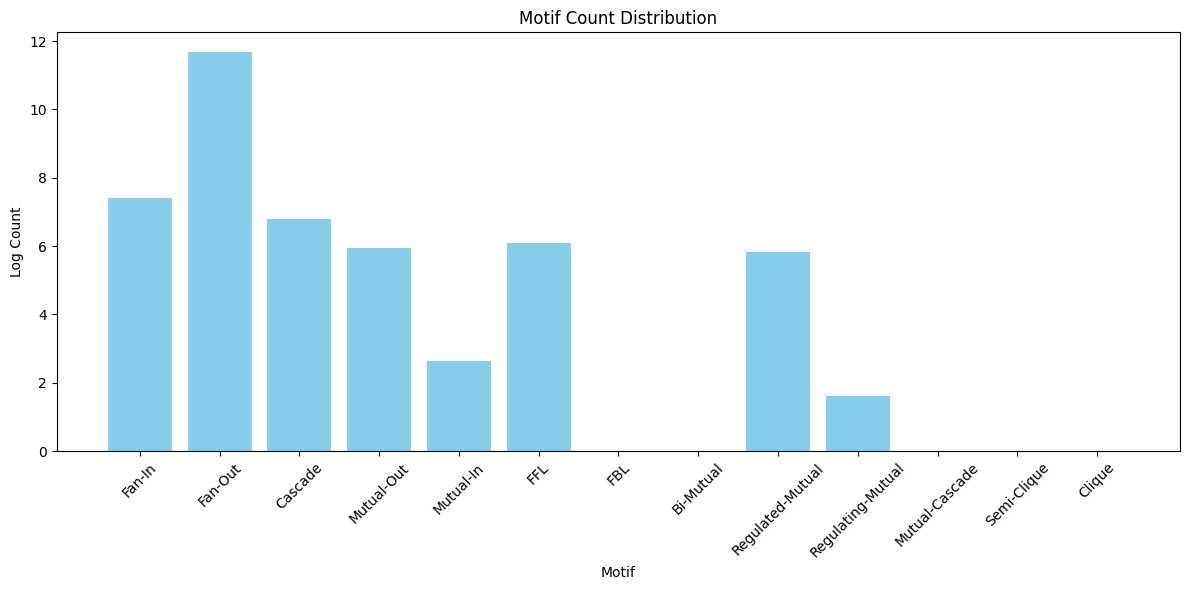

In [5]:
filelist = [f'data/gnw/ecoli-1000-greedy/Ecoli-1000-greedy-{str(i)}.tsv' for i in range(1,10)]

for filepath in filelist : 
    adj_mx = adj_mx_gnw_goldstandard(filepath)
    G = nx.from_numpy_array(adj_mx, create_using=nx.DiGraph())
    motifs = subgraph3N(G)
    motifs_count=get_all_motifs_count(motifs)

    # Plot the motifs count
    plot_motifs_count(motifs_count)

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


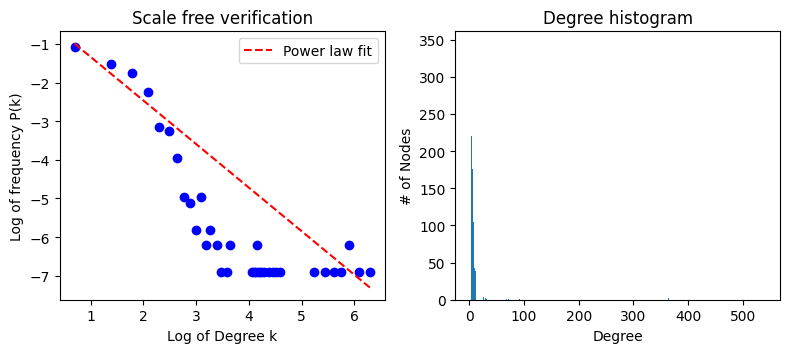

Graph strongly connected: True
Graph weakly connected: True
Modularity of the graph: 0.5681174045412796
Fitted power law parameters: a = 0.81, b = -1.13
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


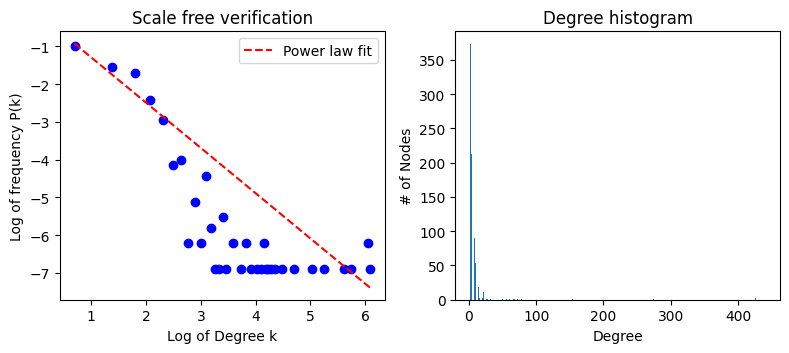

Graph strongly connected: True
Graph weakly connected: True
Modularity of the graph: 0.6134647913287469
Fitted power law parameters: a = 0.91, b = -1.20
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


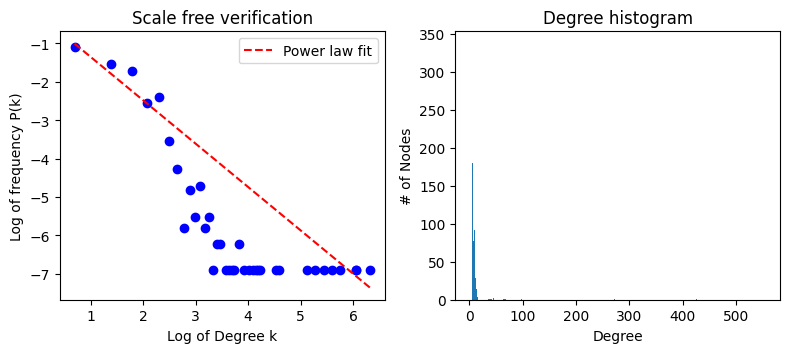

Graph strongly connected: True
Graph weakly connected: True
Modularity of the graph: 0.5945283527430704
Fitted power law parameters: a = 0.80, b = -1.13
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


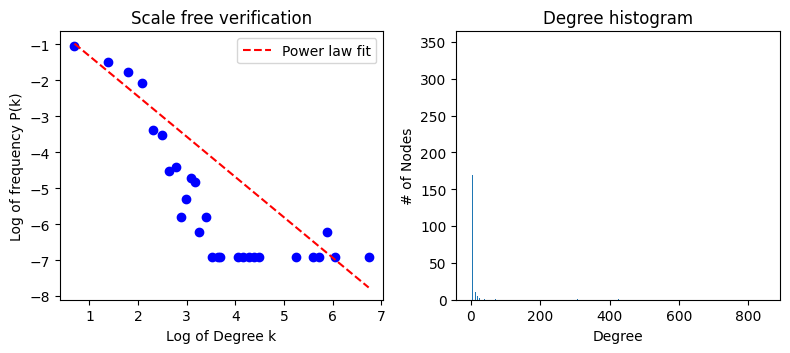

Graph strongly connected: True
Graph weakly connected: True
Modularity of the graph: 0.5633436446054951
Fitted power law parameters: a = 0.82, b = -1.12
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


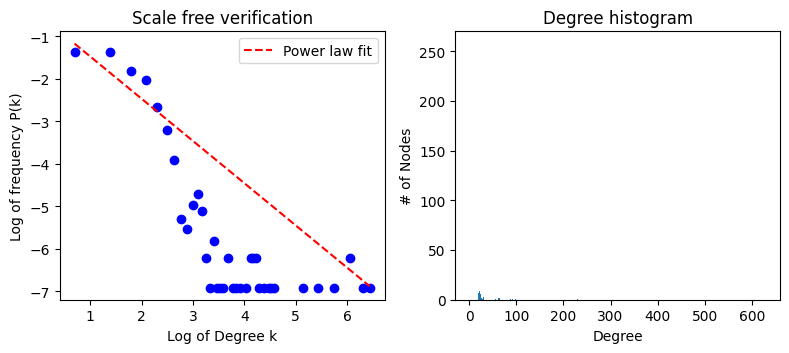

Graph strongly connected: True
Graph weakly connected: True
Modularity of the graph: 0.5601722977070186
Fitted power law parameters: a = 0.62, b = -0.99
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


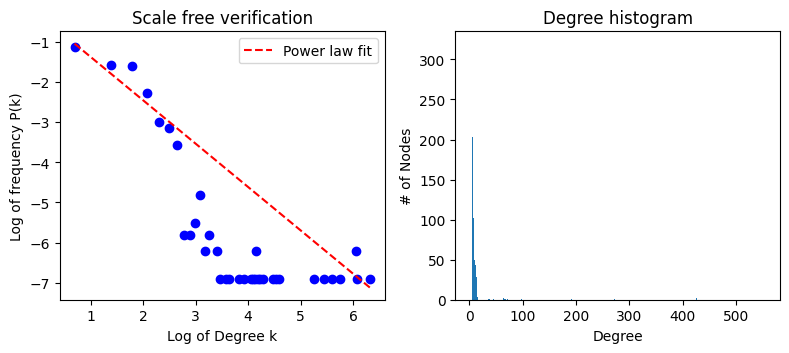

Graph strongly connected: True
Graph weakly connected: True
Modularity of the graph: 0.555372550487563
Fitted power law parameters: a = 0.74, b = -1.08
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


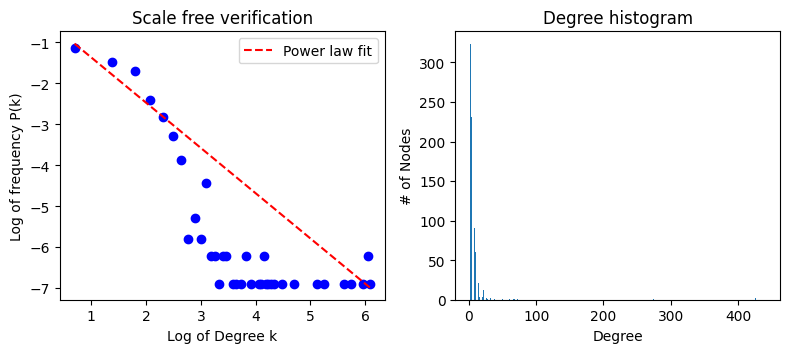

Graph strongly connected: True
Graph weakly connected: True
Modularity of the graph: 0.5754540476140221
Fitted power law parameters: a = 0.77, b = -1.11
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


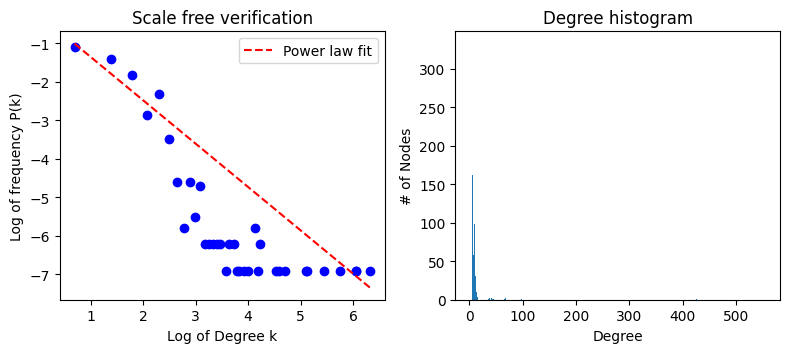

Graph strongly connected: True
Graph weakly connected: True
Modularity of the graph: 0.6086643993932208
Fitted power law parameters: a = 0.80, b = -1.13
The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


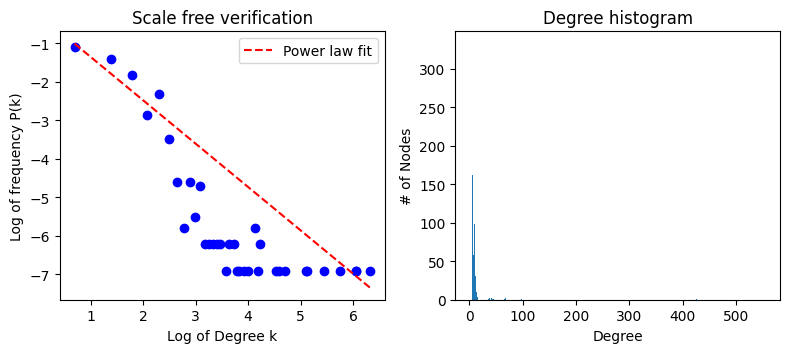

Graph strongly connected: True
Graph weakly connected: True
Modularity of the graph: 0.6088624902921822
Fitted power law parameters: a = 0.80, b = -1.13


In [22]:
'''
Parameters used for the extraction:
Extract all regulators: False
Size of subnetwork: 1000
Include at leas N regulators: None
Number of subnetworks: 1
Seed: 
    Random vertex: True
    Selection from list: None
    From strongly onnected comp: None
Neighbor selection: 
    Greedy: True
    Random among top (%): None
'''

filelist = [f'data/gnw/ecoli-1000-greedy/Ecoli-1000-greedy-{str(i)}.tsv' for i in range(1,10)]
gnw_res_1000_greedy = {}
for filepath in filelist : 
    adj_mx = adj_mx_gnw_goldstandard(filepath)
    plot_grn_degree(adj_mx)
    gnw_res_1000_greedy[filepath] = graph_properties(adj_mx)

## GRN size 100

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


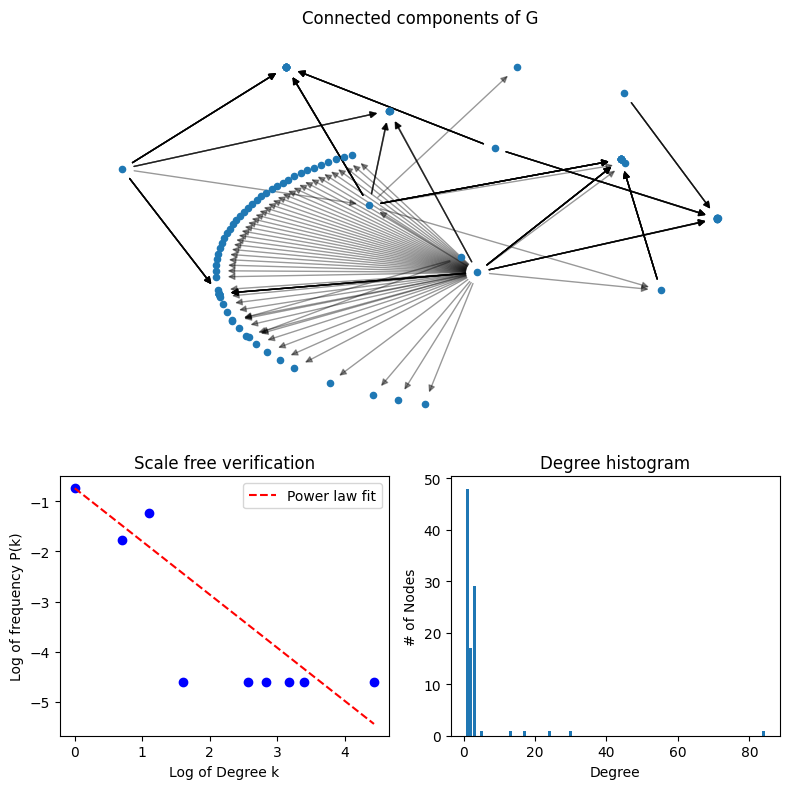

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.3750042748196026
Fitted power law parameters: a = 0.48, b = -1.06


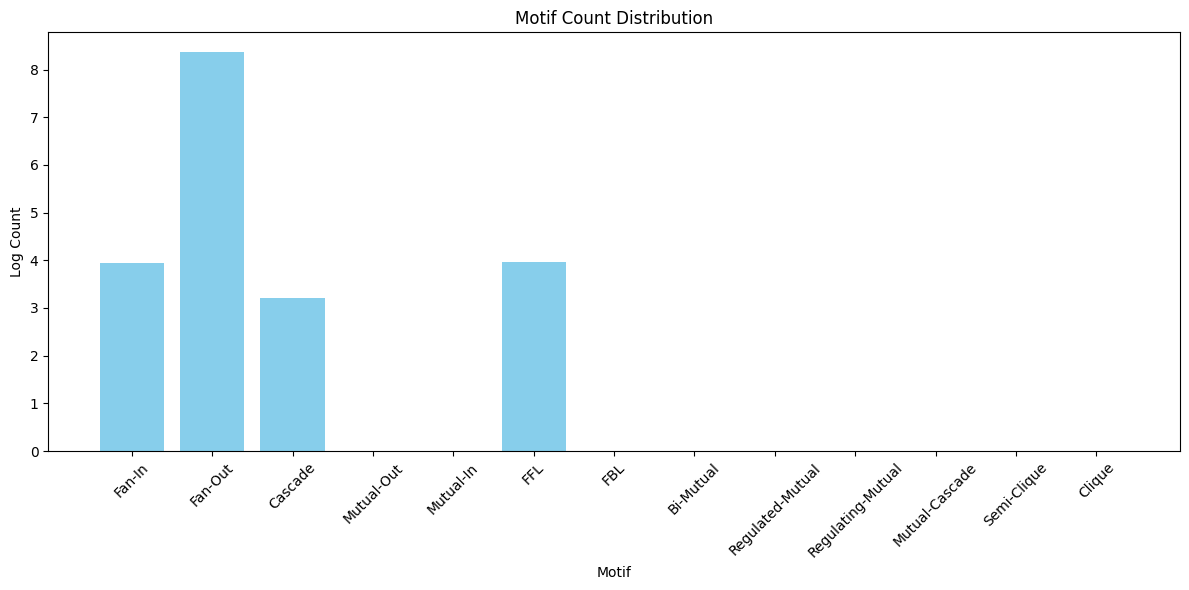

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


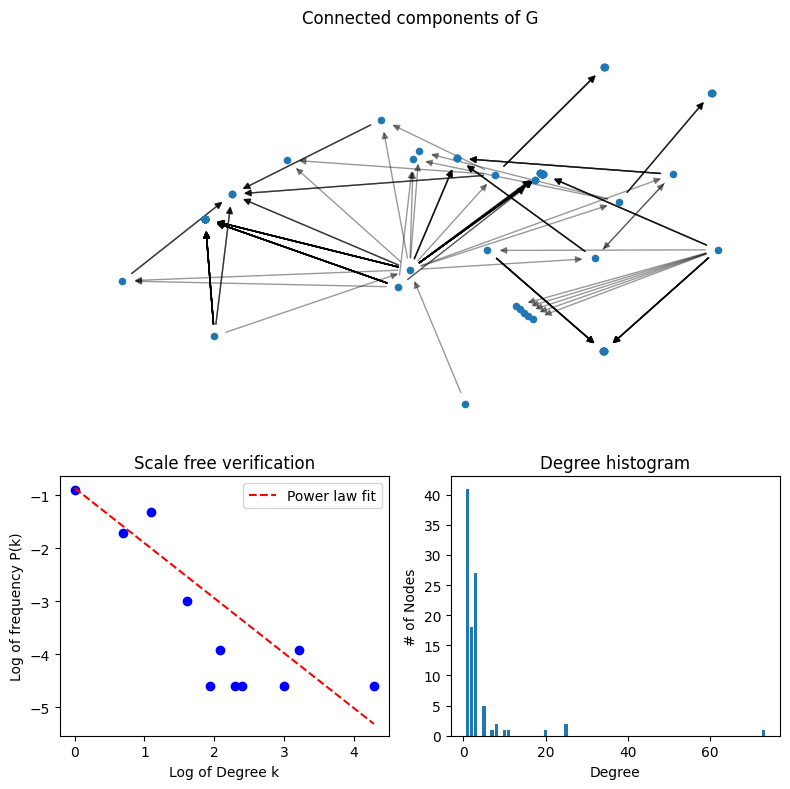

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.492054584120983
Fitted power law parameters: a = 0.42, b = -1.04


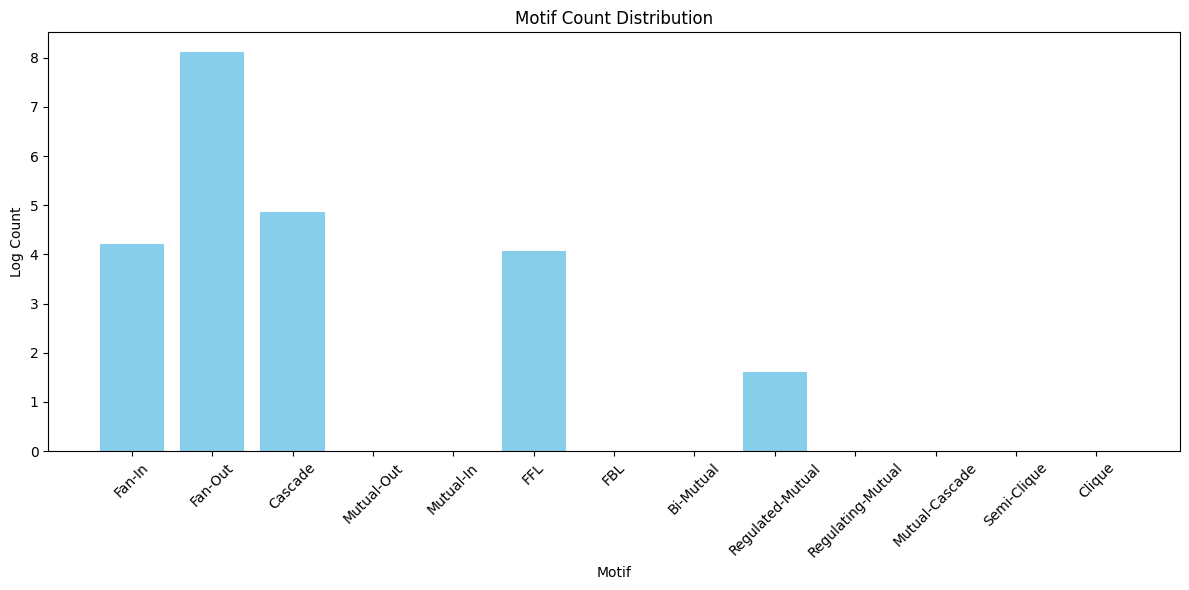

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


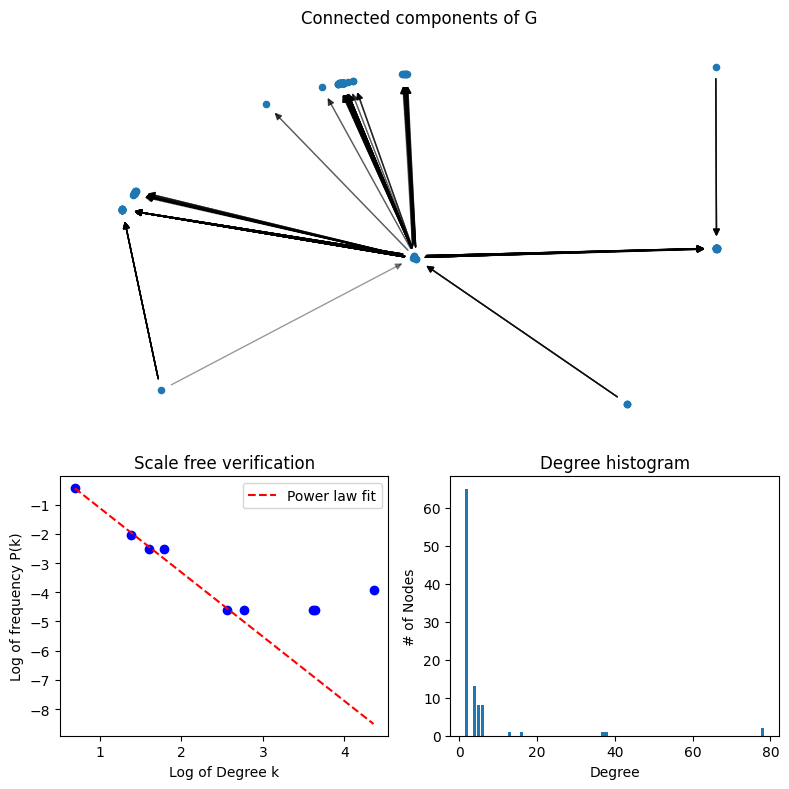

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.3338981844072624
Fitted power law parameters: a = 2.99, b = -2.21


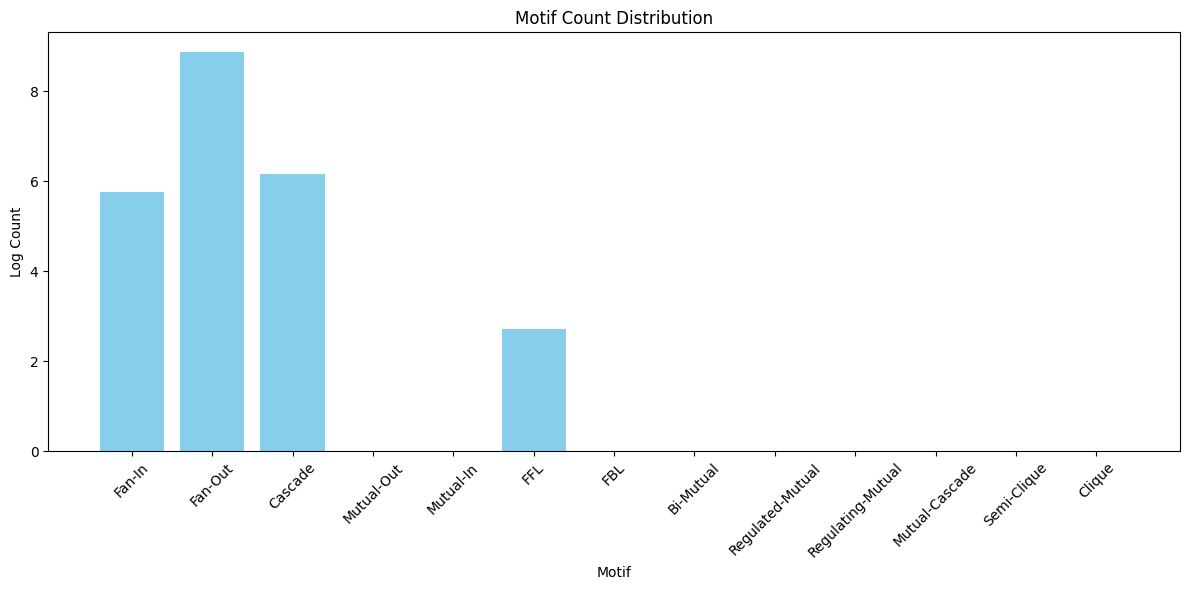

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


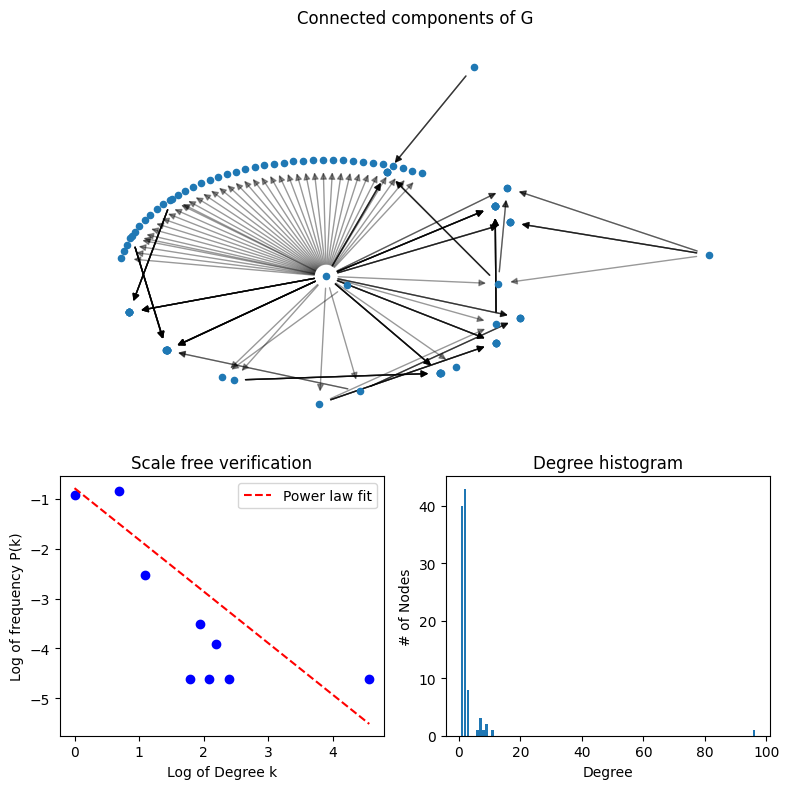

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.3687617065556712
Fitted power law parameters: a = 0.46, b = -1.04


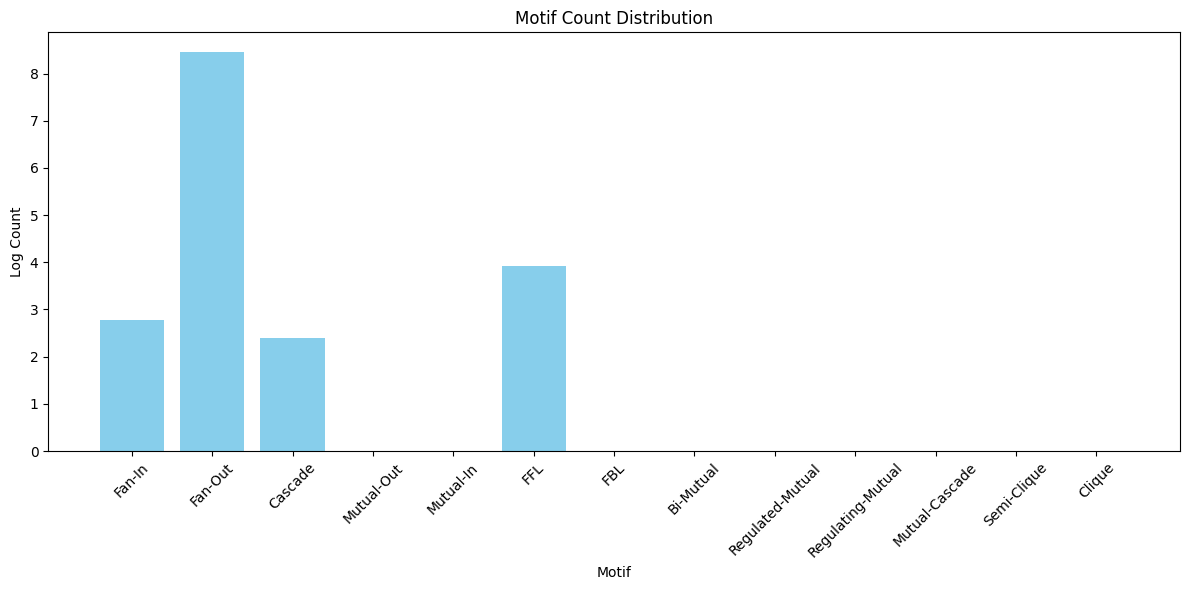

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


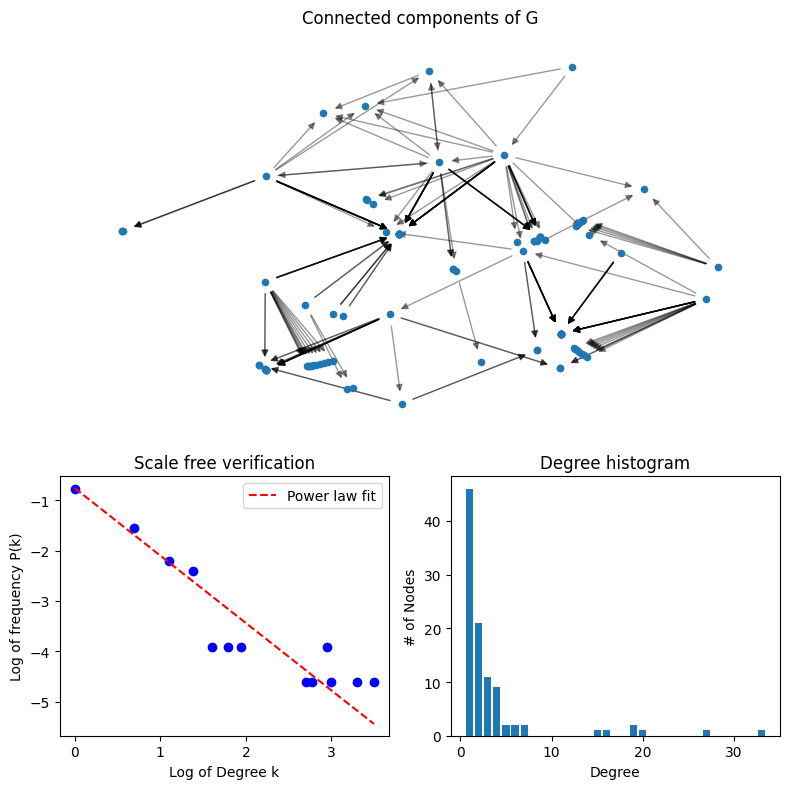

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.570743321312279
Fitted power law parameters: a = 0.47, b = -1.34


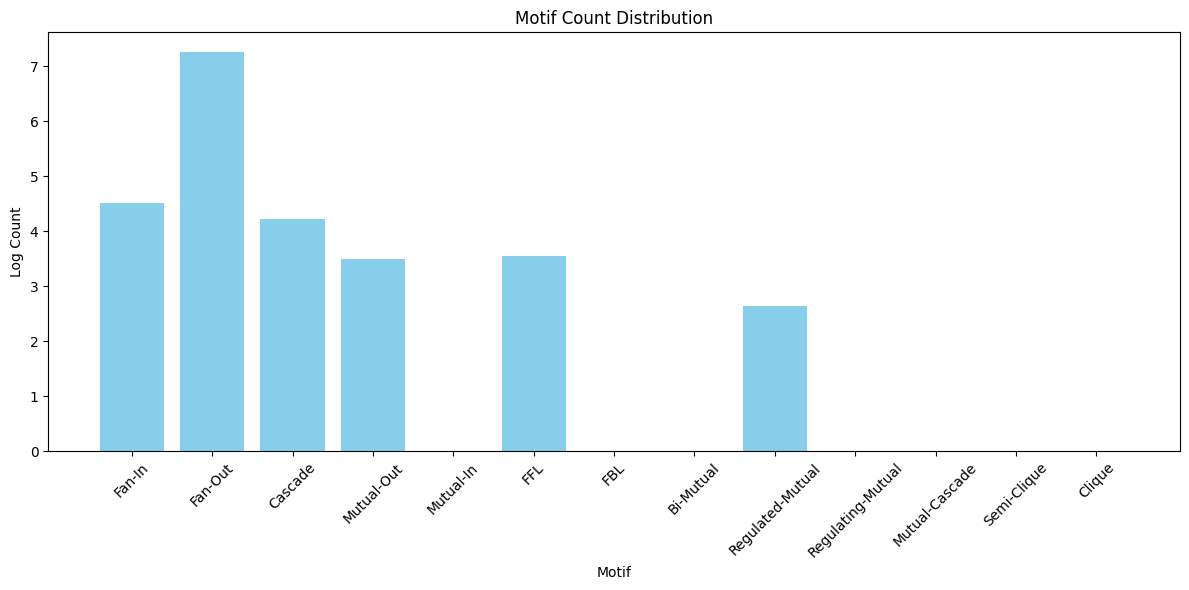

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


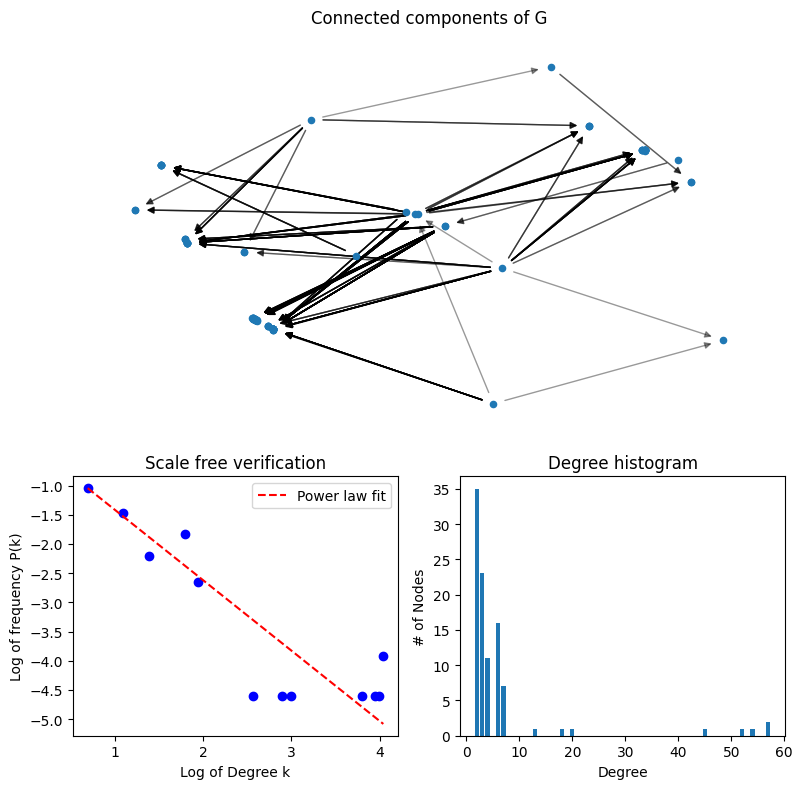

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.2778490413178504
Fitted power law parameters: a = 0.81, b = -1.21


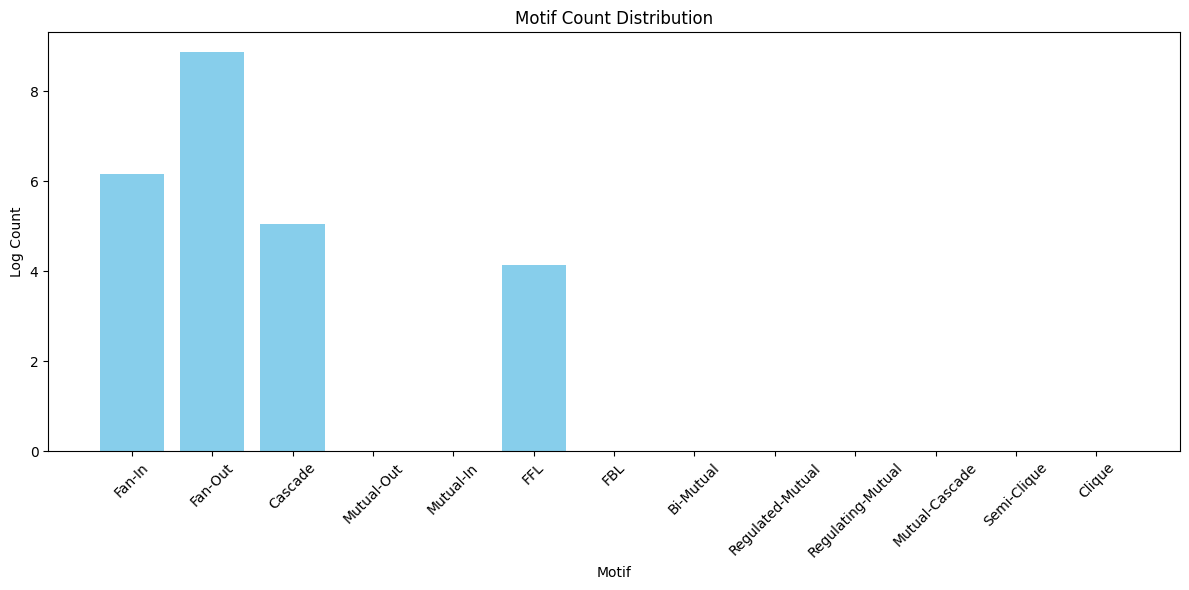

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


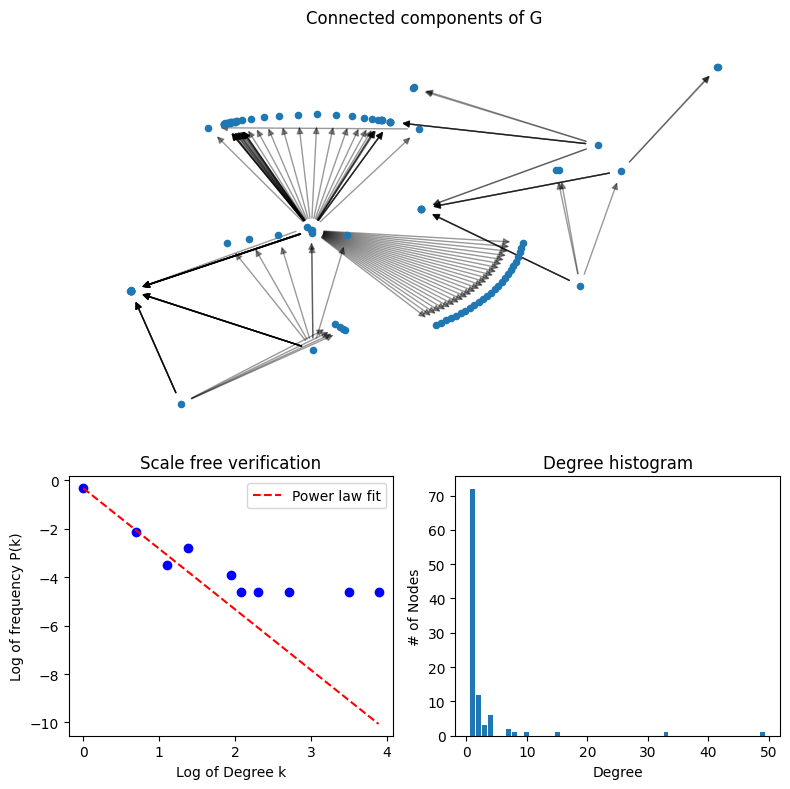

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5684754521963824
Fitted power law parameters: a = 0.72, b = -2.50


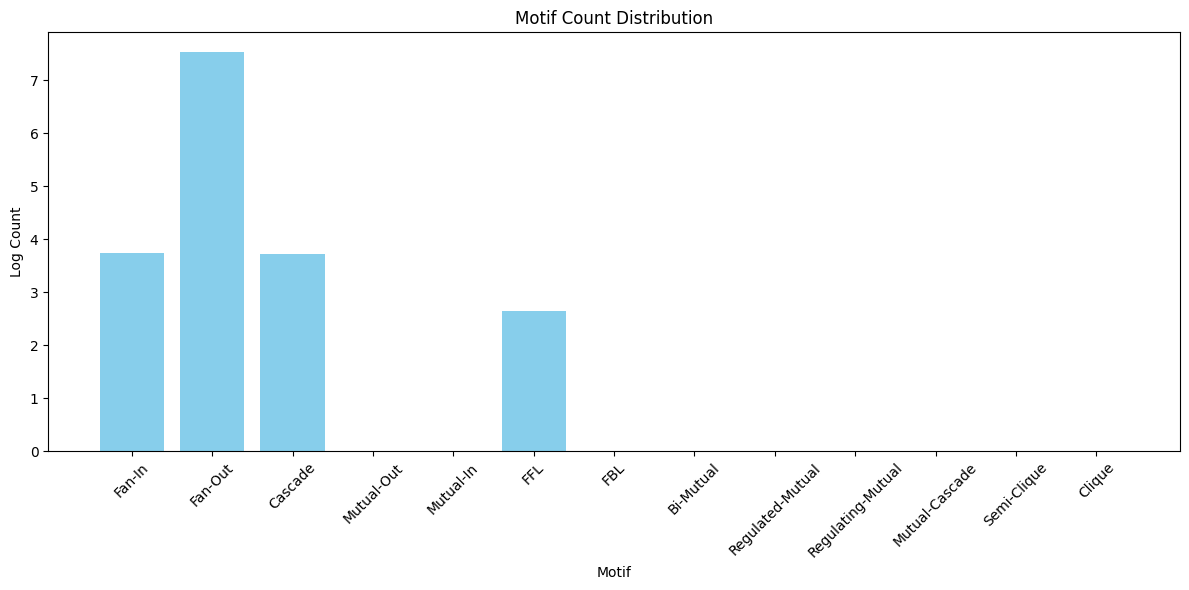

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


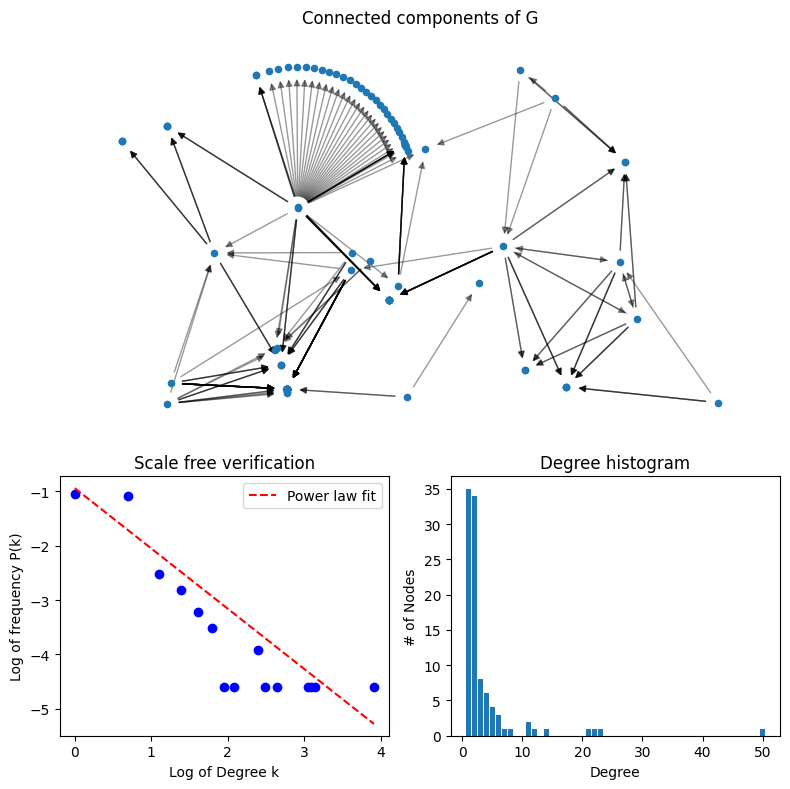

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.5947468026006532
Fitted power law parameters: a = 0.39, b = -1.11


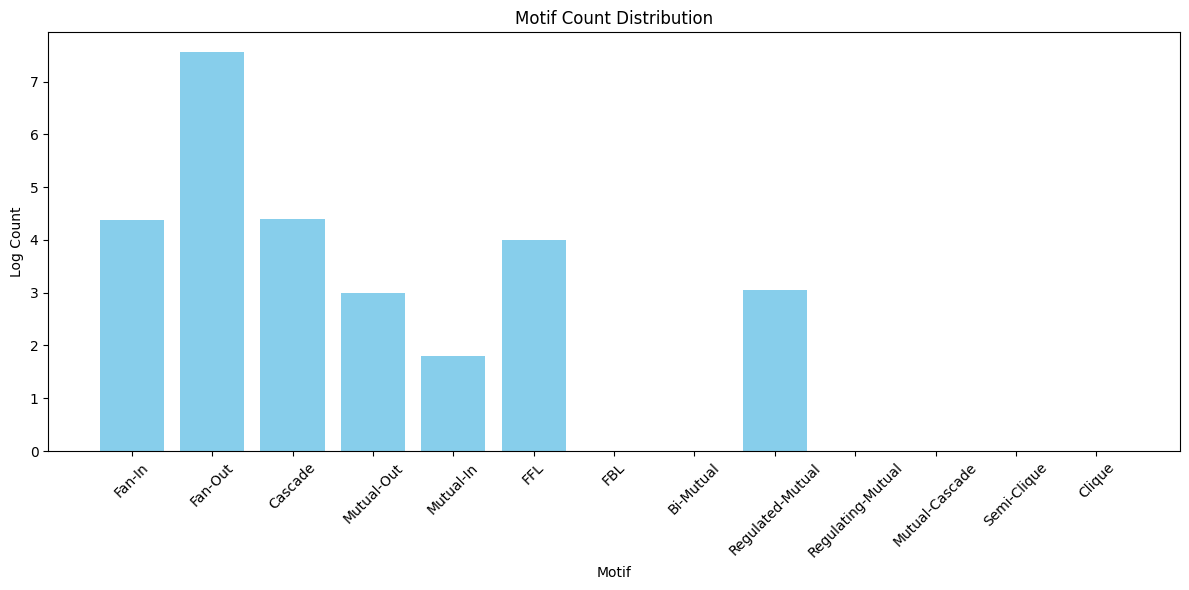

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


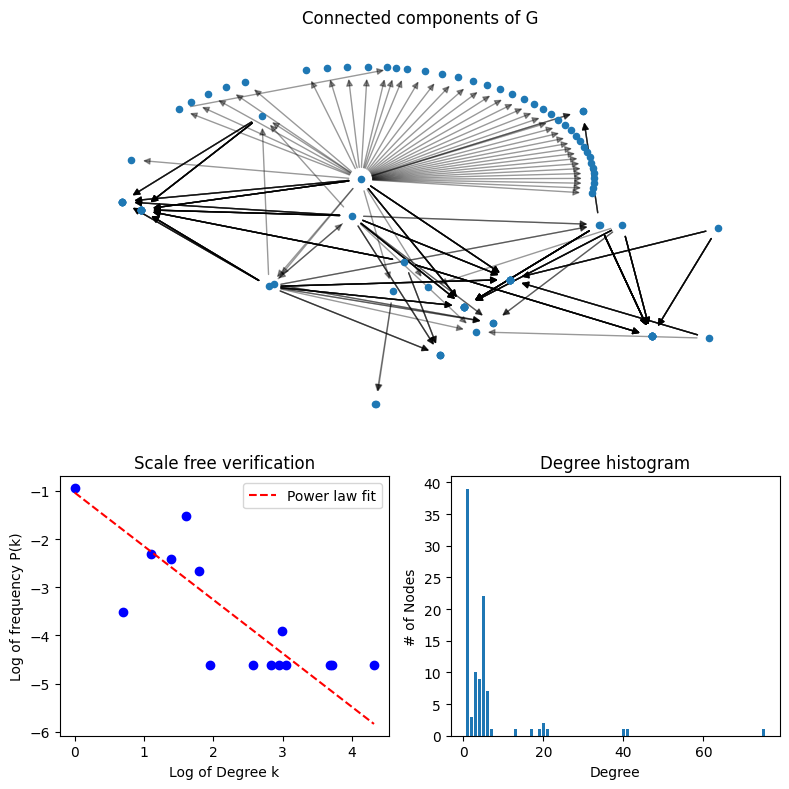

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.36262957819579456
Fitted power law parameters: a = 0.36, b = -1.11


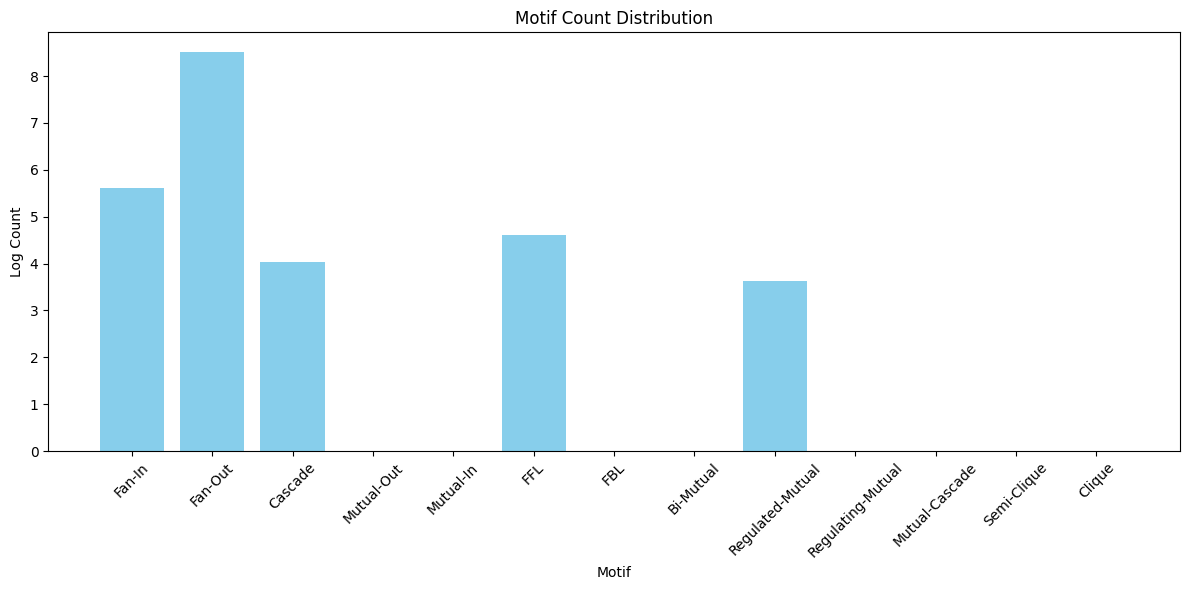

In [128]:
'''
Parameters used for the extraction:
Extract all regulators: False
Size of subnetwork: 100
Include at leas N regulators: None
Number of subnetworks: 1
Seed: 
    Random vertex: True
    Selection from list: None
    From strongly onnected comp: None
Neighbor selection: 
    Greedy: True
    Random among top (%): None
'''

filelist = [f'data/gnw/ecoli-100/Ecoli-100-{str(i)}.tsv' for i in range(1,10)]
gnw_res_100 = {}
for filepath in filelist : 
    adj_mx = adj_mx_gnw_goldstandard(filepath)
    plot_grn_degree(adj_mx,plot_network=True)
    G = nx.from_numpy_array(adj_mx, create_using=nx.DiGraph())
    motifs = subgraph3N(G)
    motifs_counts=get_all_motifs_count(motifs)

    # Plot the motifs count
    plot_motifs_count(motifs_counts)
    gnw_res_100[filepath] = graph_properties(adj_mx)

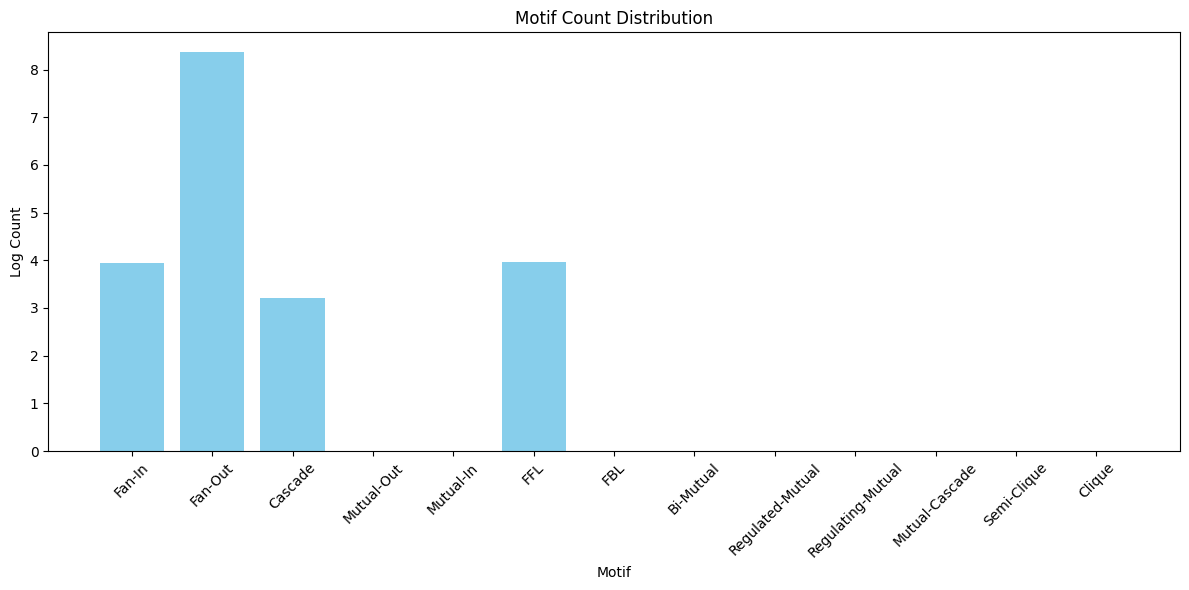

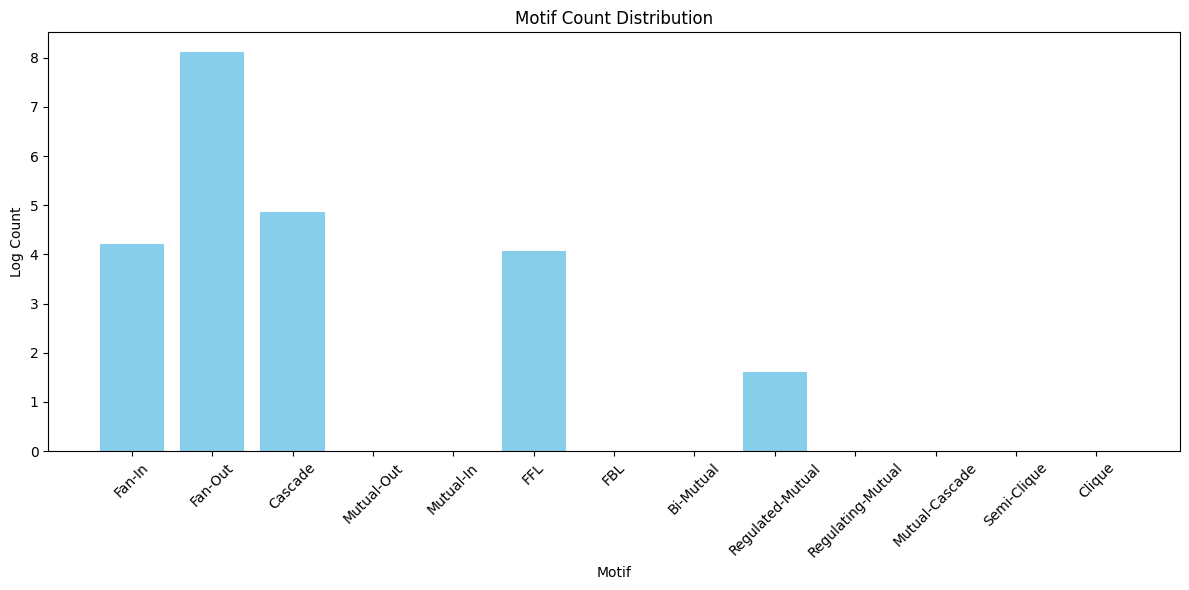

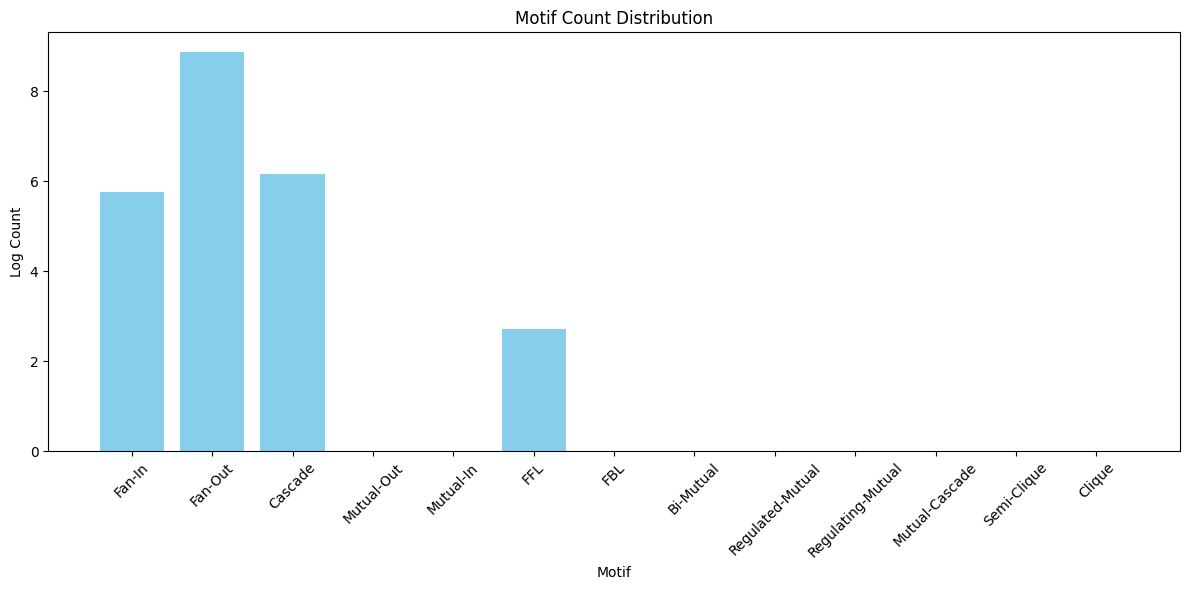

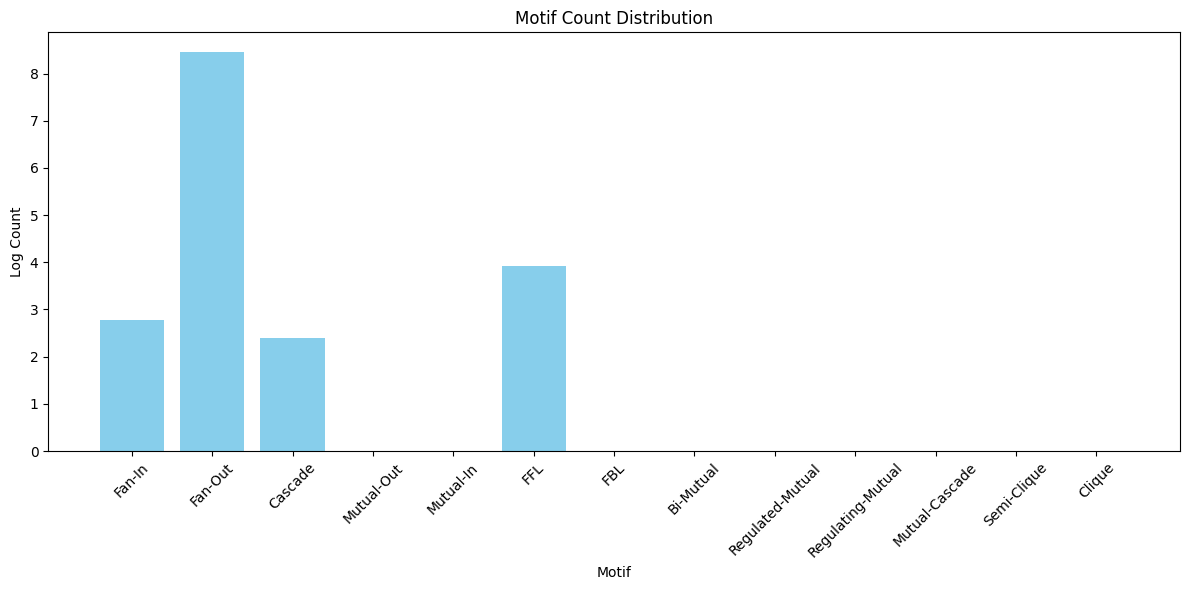

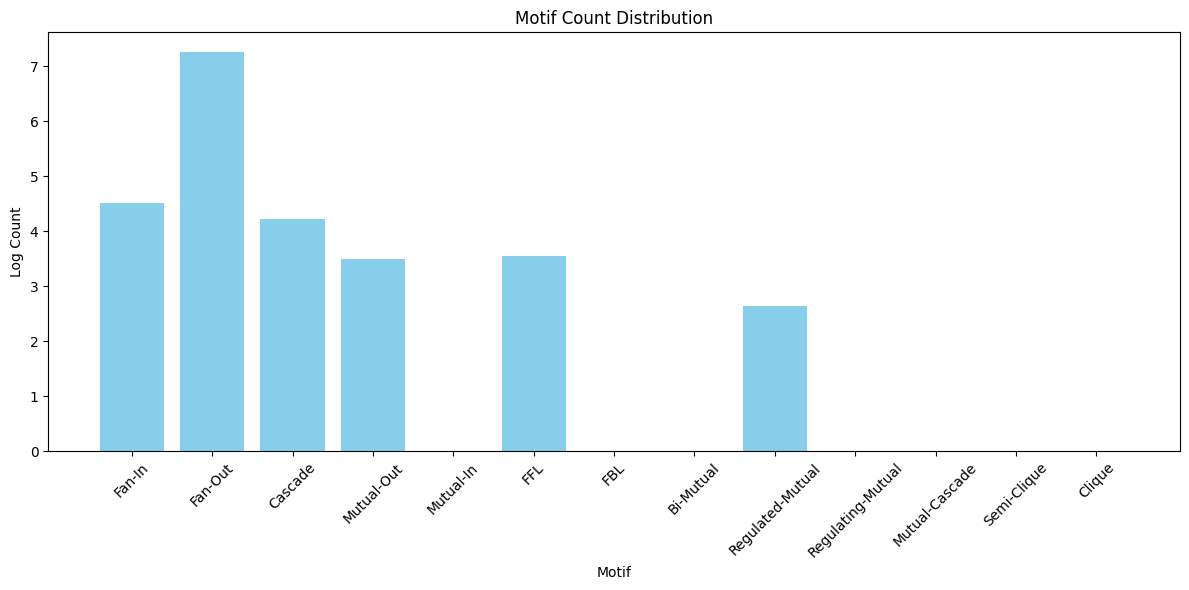

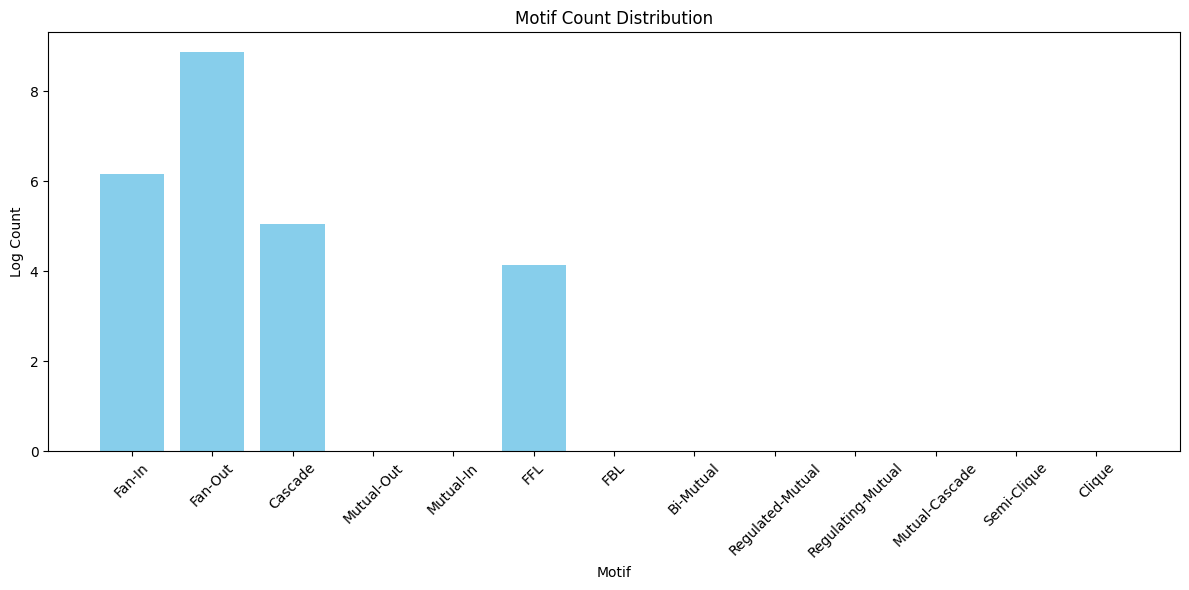

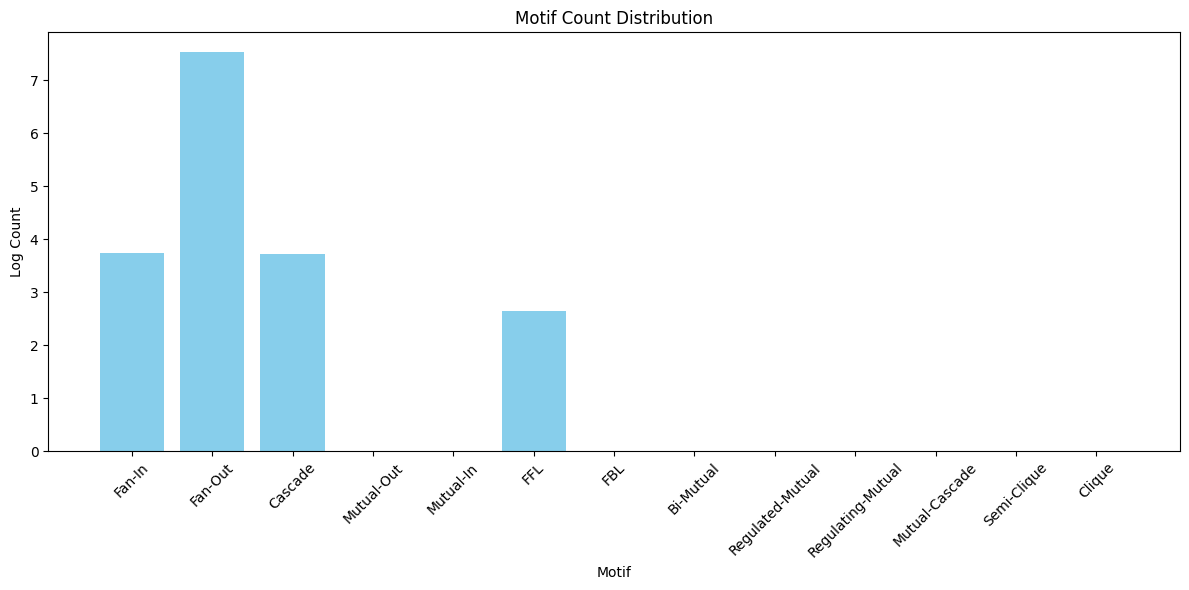

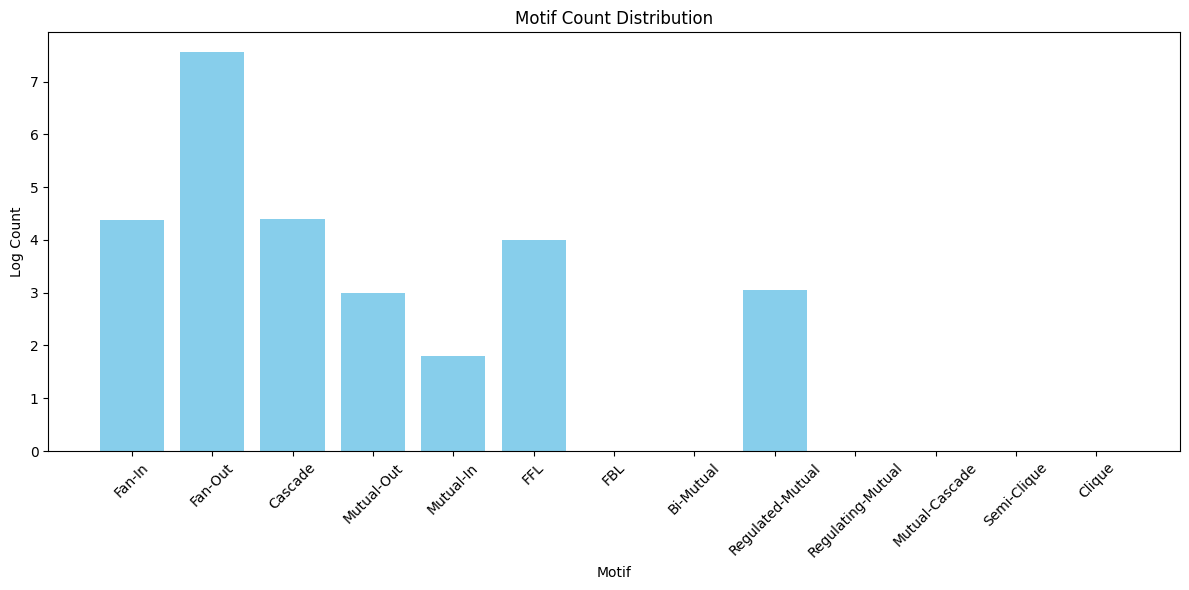

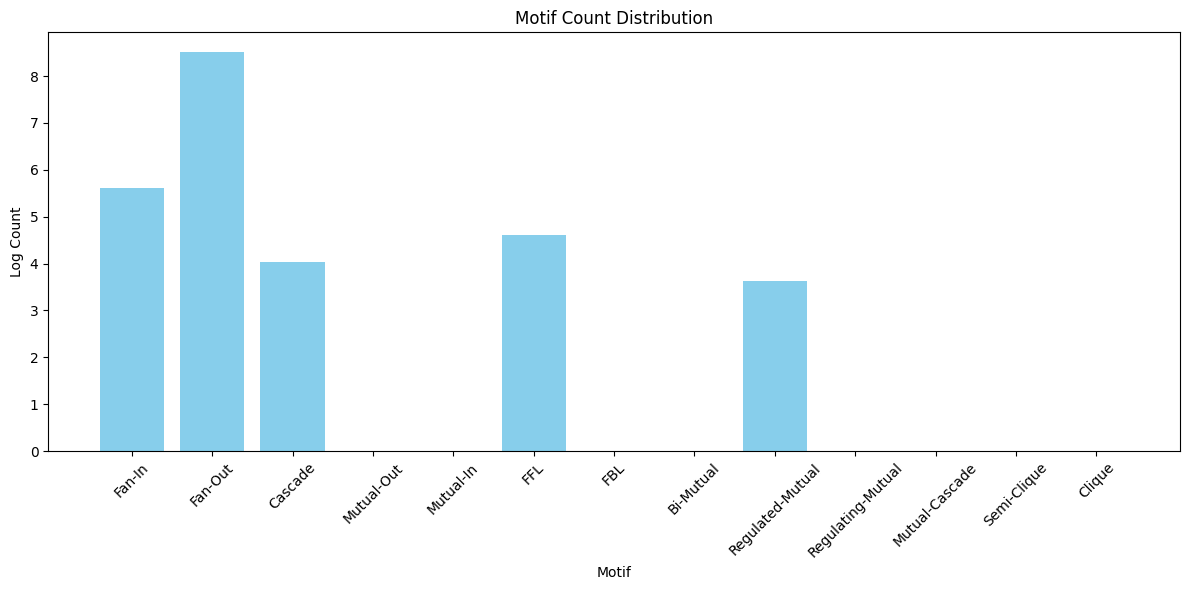

In [4]:
'''
Parameters used for the extraction:
Extract all regulators: False
Size of subnetwork: 100
Include at leas N regulators: None
Number of subnetworks: 1
Seed: 
    Random vertex: True
    Selection from list: None
    From strongly onnected comp: None
Neighbor selection: 
    Greedy: False
    Random among top (%): 100
'''

filelist = [f'data/gnw/ecoli-100/Ecoli-100-{str(i)}.tsv' for i in range(1,10)]
for filepath in filelist : 
    adj_mx = adj_mx_gnw_goldstandard(filepath)
    G = nx.from_numpy_array(adj_mx, create_using=nx.DiGraph())
    motifs = subgraph3N(G)
    motifs_count=get_all_motifs_count(motifs)

    # Plot the motifs count
    plot_motifs_count(motifs_count)


## GRN size 10

In [ ]:
'''
Parameters used for the extraction:
Extract all regulators: False
Size of subnetwork: 10
Include at leas N regulators: None
Number of subnetworks: 1
Seed: 
    Random vertex: True
    Selection from list: None
    From strongly onnected comp: None
Neighbor selection: 
    Greedy: True
    Random among top (%): 20 # /!\ Not sure /!\ 
'''

filelist = [f'data/gnw/ecoli-10/Ecoli-10-{str(i)}.tsv' for i in range(1,10)]
gnw_res_100 = {}
for filepath in filelist : 
    adj_mx = adj_mx_gnw_goldstandard(filepath)
    plot_grn_degree(adj_mx)
    gnw_res_100[filepath] = graph_properties(adj_mx)

# Random Network

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


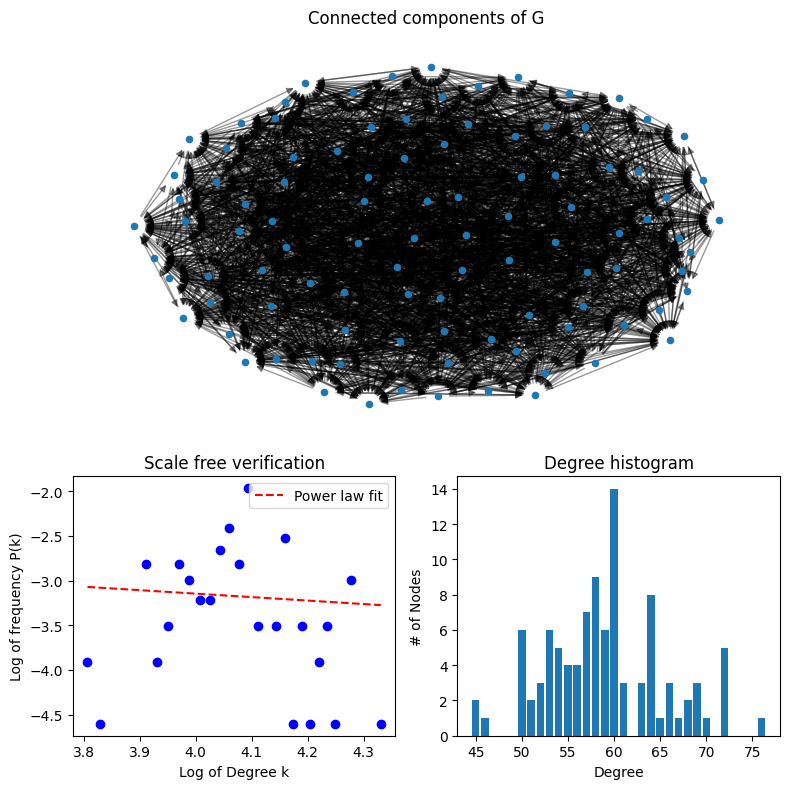

Graph strongly connected: True
Graph weakly connected: True
Modularity of the graph: 0.06593489716251395
Fitted power law parameters: a = 0.20, b = -0.39


In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters for the random directed graph
num_nodes = 100  # Number of nodes
probability = 0.3  # Probability of edge creation

# Generate the random directed graph
random_directed_graph = nx.gnp_random_graph(num_nodes, probability, directed=True)
random_adj_mx = nx.adjacency_matrix(random_directed_graph)
plot_grn_degree(random_adj_mx, plot_network=True)
random_properties = graph_properties(random_adj_mx)

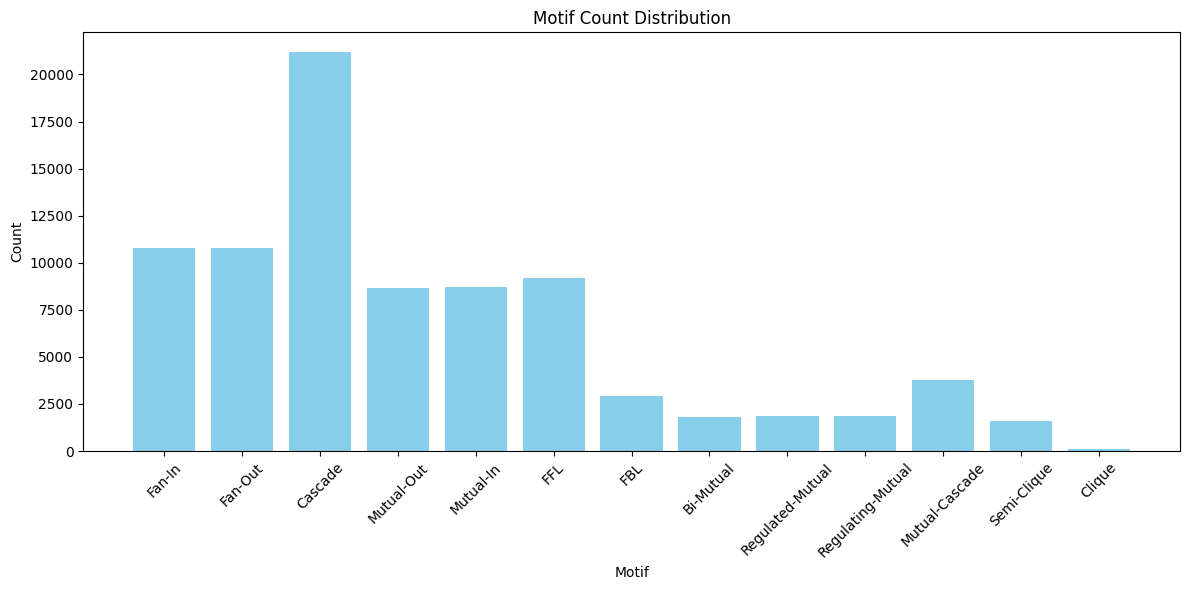

In [17]:
random_motifs = subgraph3N(random_directed_graph)
random_motifs_count=get_all_motifs_count(random_motifs)

# Plot the motifs count
plot_motifs_count(random_motifs_count)

# Scale Free Barabasi

## Barabasi 100 genes

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


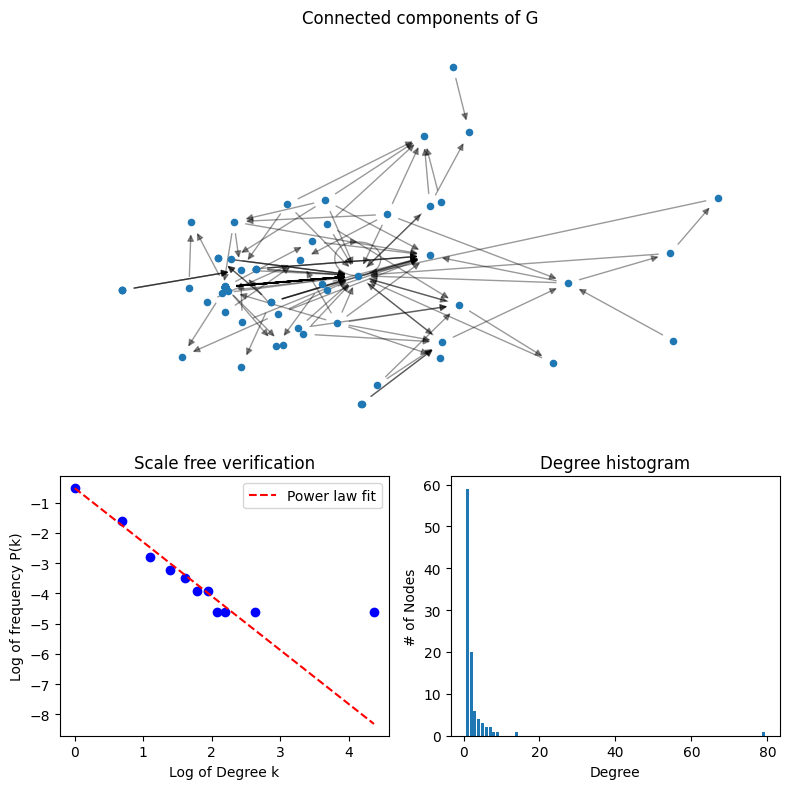

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.43424253403032964
Fitted power law parameters: a = 0.59, b = -1.78


In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# Generate a directed scale-free graph
num_nodes = 100
barabasi_directed_graph = nx.scale_free_graph(num_nodes)
# Convert the MultiDiGraph to DiGraph
barabasi_directed_graph = nx.DiGraph(barabasi_directed_graph)

barabasi_adj_mx = nx.adjacency_matrix(barabasi_directed_graph)
plot_grn_degree(barabasi_adj_mx, plot_network=True)
barabasi_properties = graph_properties(barabasi_adj_mx)

# LFR

In [ ]:
import networkx as nx
import numpy as np
import random as rd

# --- Direction assignment function (star-based) ---
def adjacenteDiMatriceStaredFromGraph(G: nx.Graph,
                                      autoRG: float,
                                      duoRG: float) -> nx.DiGraph:
    """
    Converts an undirected graph into a directed graph
    using a 'star' strategy: the highest-degree node is treated as a hub,
    and edges are oriented outward (with optional bidirectionality and self-loops).
    """
    DiG = nx.DiGraph()
    DiG.add_nodes_from(G)

    # Find the hub node (highest degree)
    degree_dict = dict(G.degree())
    motherNode = max(degree_dict, key=degree_dict.get)
    print(f"Hub node selected for directionality: {motherNode}")

    cache = set()
    distance = nx.single_source_shortest_path_length(G, motherNode)

    for nodeA in distance:
        for nodeB in G[nodeA]:
            edge = (nodeA, nodeB)
            if edge not in cache:
                cache.add(edge)
                cache.add(edge[::-1])
                rdNumber = rd.random()
                if rdNumber < duoRG:
                    DiG.add_edges_from([(nodeA, nodeB), (nodeB, nodeA)])
                else:
                    if distance[nodeA] <= distance[nodeB]:
                        DiG.add_edge(nodeA, nodeB)
                    else:
                        DiG.add_edge(nodeB, nodeA)
        if rd.random() < autoRG:
            DiG.add_edge(nodeA, nodeA)

    return DiG

# --- Connect components probabilistically by degree ---
def connect_components_by_degree(G, hub_bias=1.0):
    """
    Connects disconnected components by adding edges between them.
    Nodes are chosen with probability proportional to (degree ** hub_bias).
    """
    added_edges = 0
    while not nx.is_connected(G):
        components = list(nx.connected_components(G))
        compA, compB = components[0], components[1]

        degrees_A = np.array([G.degree(n) for n in compA])
        degrees_B = np.array([G.degree(n) for n in compB])

        # Amplify hub preference
        degrees_A = (degrees_A + 1e-3) ** hub_bias
        degrees_B = (degrees_B + 1e-3) ** hub_bias

        prob_A = degrees_A / degrees_A.sum()
        prob_B = degrees_B / degrees_B.sum()

        nodeA = np.random.choice(list(compA), p=prob_A)
        nodeB = np.random.choice(list(compB), p=prob_B)

        G.add_edge(nodeA, nodeB)
        added_edges += 1
        print(f"Connected node {nodeA} (deg={G.degree(nodeA)}) with {nodeB} (deg={G.degree(nodeB)})")

    print(f"Graph is now connected (added {added_edges} edges).")
    return G

# --- LFR generation with retry loop ---
def safe_LFR_benchmark(max_retries=10, **kwargs):
    attempt = 0
    while True:
        try:
            attempt += 1
            G = nx.generators.community.LFR_benchmark_graph(**kwargs)
            print(f"Successfully generated LFR graph on attempt {attempt}.")
            return G, attempt
        except nx.ExceededMaxIterations:
            print(f"Generation failed on attempt {attempt}, retrying...")
            if attempt >= max_retries:
                raise RuntimeError(f"Exceeded max retries ({max_retries}). LFR generation failed.")

# --- MAIN SCRIPT ---

# Define your parameters here
LFR_params = dict(
    n=100,
    tau1=2.5,
    tau2=2.162,
    mu=0.1,
    average_degree=2.5,
    min_community=10,
    seed=None  # random seed each time for variability
)

# Generate LFR graph with retry loop
G_lfr, attempts = safe_LFR_benchmark(**LFR_params)

# Connect components if needed (with strong hub preference)
if not nx.is_connected(G_lfr):
    G_lfr = connect_components_by_degree(G_lfr, hub_bias=3.0)  # <<<< amplify hub bias here
else:
    print("LFR graph was already connected.")

# Apply direction assignment
G_lfr_directed = adjacenteDiMatriceStaredFromGraph(
    G_lfr,
    autoRG=0,   # self-loop probability
    duoRG=0.05    # bidirectional edge probability
)

print(f"Finished! LFR graph generated in {attempts} attempt(s) and directed graph created.")




⚠️ Generation failed on attempt 1, retrying...
⚠️ Generation failed on attempt 2, retrying...
✅ Successfully generated LFR graph on attempt 3.
Connected node 12 (deg=6) with 2 (deg=4)
Connected node 44 (deg=5) with 66 (deg=4)
Connected node 26 (deg=9) with 7 (deg=2)
Connected node 4 (deg=3) with 96 (deg=5)
Connected node 12 (deg=7) with 9 (deg=3)
Connected node 26 (deg=10) with 14 (deg=3)
Connected node 47 (deg=11) with 82 (deg=4)
Connected node 26 (deg=11) with 22 (deg=4)
Connected node 72 (deg=3) with 46 (deg=3)
Connected node 47 (deg=12) with 54 (deg=4)
Connected node 47 (deg=13) with 99 (deg=2)
Connected node 47 (deg=14) with 63 (deg=3)
Connected node 35 (deg=7) with 64 (deg=3)
Connected node 97 (deg=5) with 65 (deg=4)
Connected node 26 (deg=12) with 69 (deg=3)
Connected node 1 (deg=7) with 78 (deg=3)
Connected node 47 (deg=15) with 87 (deg=3)
✅ Graph is now connected (added 17 edges).
Hub node selected for directionality: 47
Finished! LFR graph generated in 3 attempt(s) and direct

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


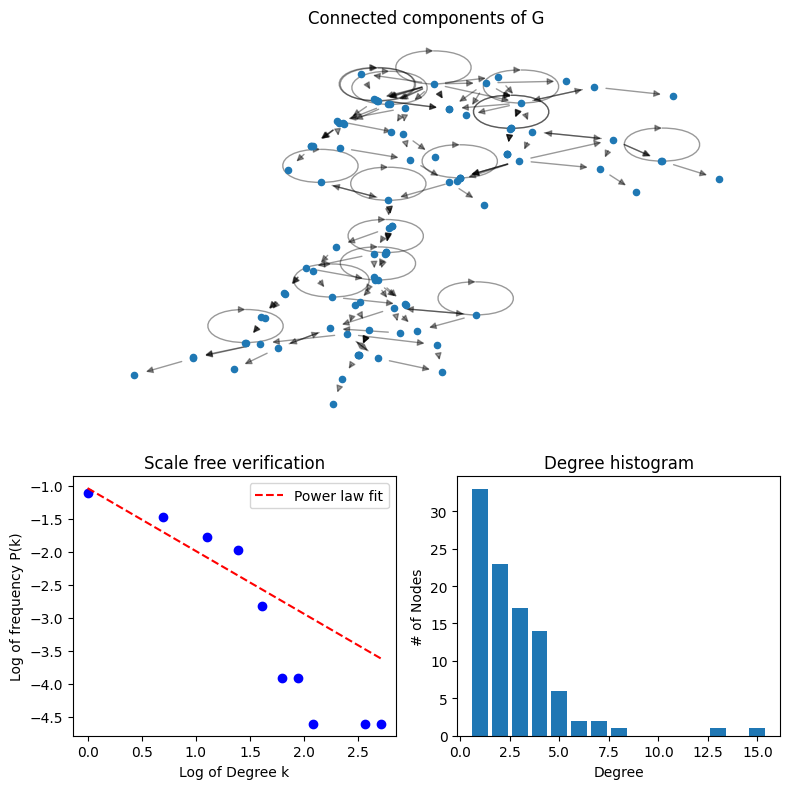

Graph strongly connected: False
Graph weakly connected: True
Modularity of the graph: 0.7856294872519646
Fitted power law parameters: a = 0.36, b = -0.95


In [127]:
lfr_adj_mx = nx.adjacency_matrix(G_lfr_directed)
plot_grn_degree(lfr_adj_mx, plot_network=True)
lfr_properties = graph_properties(lfr_adj_mx)

KS Statistic: 0.09368412225902478, p-value: 2.343577916148532e-06
Generated GRN Clustering Coefficient: 0.05393702868756542
Known GRN Clustering Coefficient: 0.13291362343159122


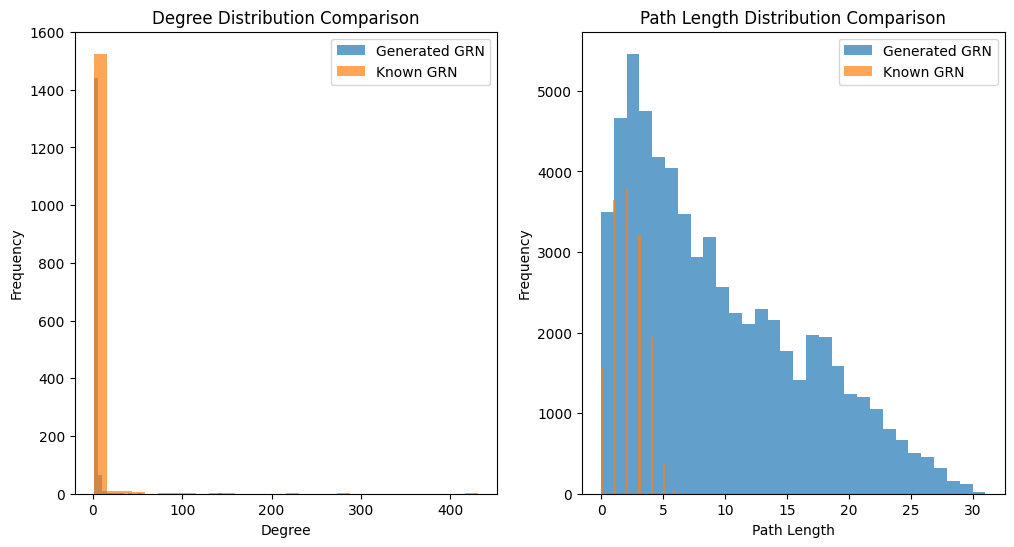

Generated GRN Assortativity: -0.044702679509794535
Known GRN Assortativity: 0.04987603004332345


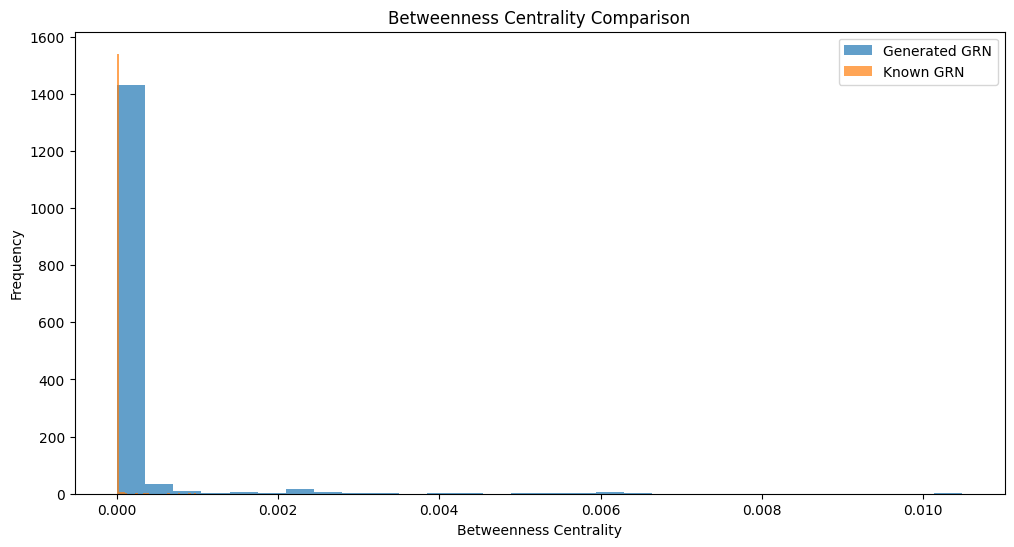

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Load or generate your GRN and the known GRN (e.g., E.Coli TF network)
filepath = 'data/gnw/Ecoli-full.tsv'
adj_mx = adj_mx_gnw_goldstandard(filepath)
generated_grn = G_lfr_directed
known_grn = nx.from_numpy_array(adj_mx, create_using=nx.DiGraph)

# Degree distribution comparison
generated_degrees = [d for n, d in generated_grn.degree()]
known_degrees = [d for n, d in known_grn.degree()]

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(generated_degrees, bins=30, alpha=0.7, label='GRNgene')
plt.hist(known_degrees, bins=30, alpha=0.7, label='E.Coli')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.title('Degree Distribution Comparison')

# KS test for degree distribution
ks_stat, ks_p_value = ks_2samp(generated_degrees, known_degrees)
print(f"KS Statistic: {ks_stat}, p-value: {ks_p_value}")

# Clustering coefficient comparison
generated_clustering = nx.average_clustering(generated_grn)
known_clustering = nx.average_clustering(known_grn)
print(f"Generated GRN Clustering Coefficient: {generated_clustering}")
print(f"Known GRN Clustering Coefficient: {known_clustering}")

# Path length distribution comparison
generated_path_lengths = dict(nx.shortest_path_length(generated_grn))
known_path_lengths = dict(nx.shortest_path_length(known_grn))

generated_lengths = [length for lengths in generated_path_lengths.values() for length in lengths.values()]
known_lengths = [length for lengths in known_path_lengths.values() for length in lengths.values()]

plt.subplot(122)
plt.hist(generated_lengths, bins=30, alpha=0.7, label='GRNgene')
plt.hist(known_lengths, bins=30, alpha=0.7, label='E.Coli')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Path Length Distribution Comparison')

plt.show()

# Assortativity comparison
generated_assortativity = nx.degree_assortativity_coefficient(generated_grn)
known_assortativity = nx.degree_assortativity_coefficient(known_grn)
print(f"Generated GRN Assortativity: {generated_assortativity}")
print(f"Known GRN Assortativity: {known_assortativity}")

# Betweenness centrality comparison
generated_betweenness = nx.betweenness_centrality(generated_grn)
known_betweenness = nx.betweenness_centrality(known_grn)

generated_betweenness_values = list(generated_betweenness.values())
known_betweenness_values = list(known_betweenness.values())

plt.figure(figsize=(12, 6))
plt.hist(generated_betweenness_values, bins=30, alpha=0.7, label='GRNgene')
plt.hist(known_betweenness_values, bins=30, alpha=0.7, label='E.Coli')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.title('Betweenness Centrality Comparison')
plt.show()

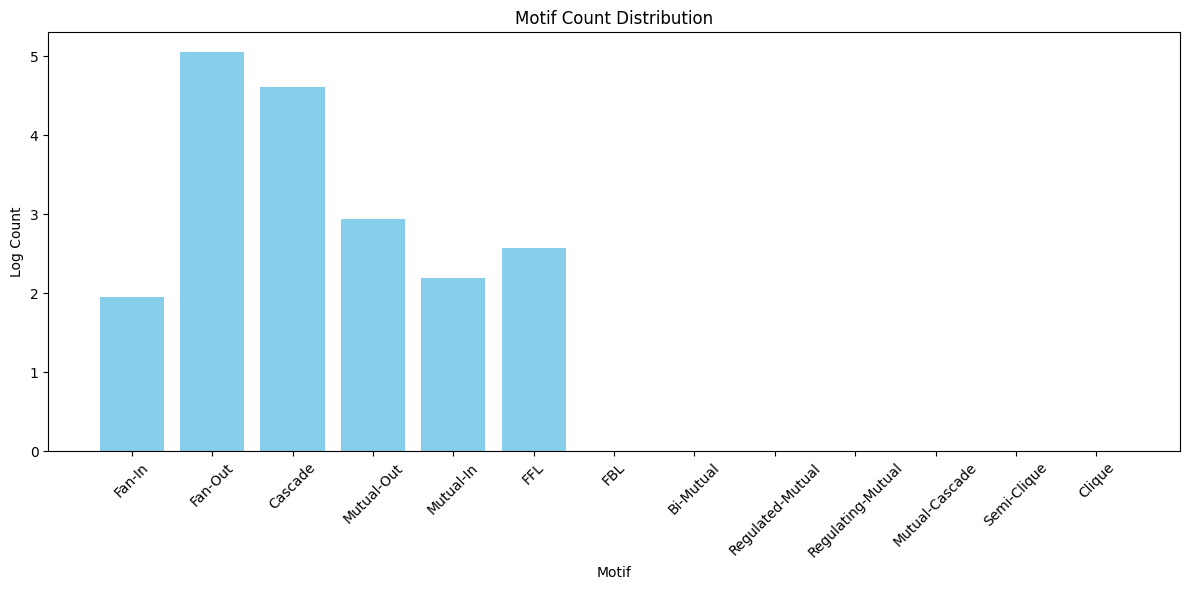

In [126]:
lfr_motifs = subgraph3N(G_lfr_directed)
motifs_count=get_all_motifs_count(lfr_motifs)

# Plot the motifs count
plot_motifs_count(motifs_count)

In [115]:
G_lfr_directed.number_of_edges()

2127

In [116]:
known_grn.number_of_edges()

3648

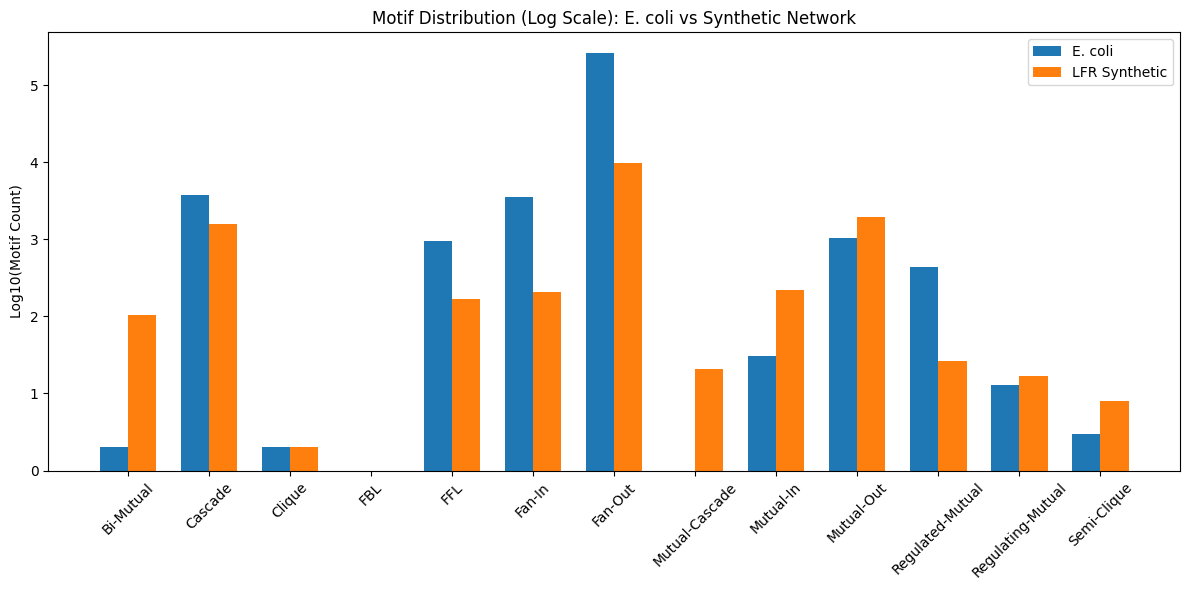

In [ ]:
# Extract motifs for E. coli graph

# Load or generate your GRN and the known GRN (e.g., E.Coli TF network)
filepath = 'data/gnw/Ecoli-full.tsv'
adj_mx = adj_mx_gnw_goldstandard(filepath)
generated_grn = G_lfr_directed
known_grn = nx.from_numpy_array(adj_mx, create_using=nx.DiGraph)

ecoli_motifs = subgraph3N(known_grn)
ecoli_motifs_count = get_all_motifs_count(ecoli_motifs)

lfr_motifs = subgraph3N(G_lfr_directed)
motifs_count=get_all_motifs_count(lfr_motifs)

# Ensure both have the same motif keys
all_motifs = set(motifs_count.keys()).union(ecoli_motifs_count.keys())

motifs = sorted(all_motifs)
counts_lfr = [motifs_count.get(m, 0) for m in motifs]
counts_ecoli = [ecoli_motifs_count.get(m, 0) for m in motifs]

# Convert counts to log-scale (add +1 to avoid log(0))
import numpy as np
log_counts_lfr = [np.log10(c + 1) for c in counts_lfr]
log_counts_ecoli = [np.log10(c + 1) for c in counts_ecoli]

# Plot
import matplotlib.pyplot as plt

x = np.arange(len(motifs))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, log_counts_ecoli, width, label='E. coli')
rects2 = ax.bar(x + width/2, log_counts_lfr, width, label='GRNgene')

ax.set_ylabel('Log10(Motif Count)')
ax.set_title('Motif Distribution (Log Scale): E. coli vs GRNgene')
ax.set_xticks(x)
ax.set_xticklabels(motifs, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


In [118]:
# Normalize counts to get proportions
total_lfr = sum(motifs_count.get(m, 0) for m in motifs)
total_ecoli = sum(ecoli_motifs_count.get(m, 0) for m in motifs)

normalized_lfr = np.array([motifs_count.get(m, 0) / total_lfr for m in motifs])
normalized_ecoli = np.array([ecoli_motifs_count.get(m, 0) / total_ecoli for m in motifs])


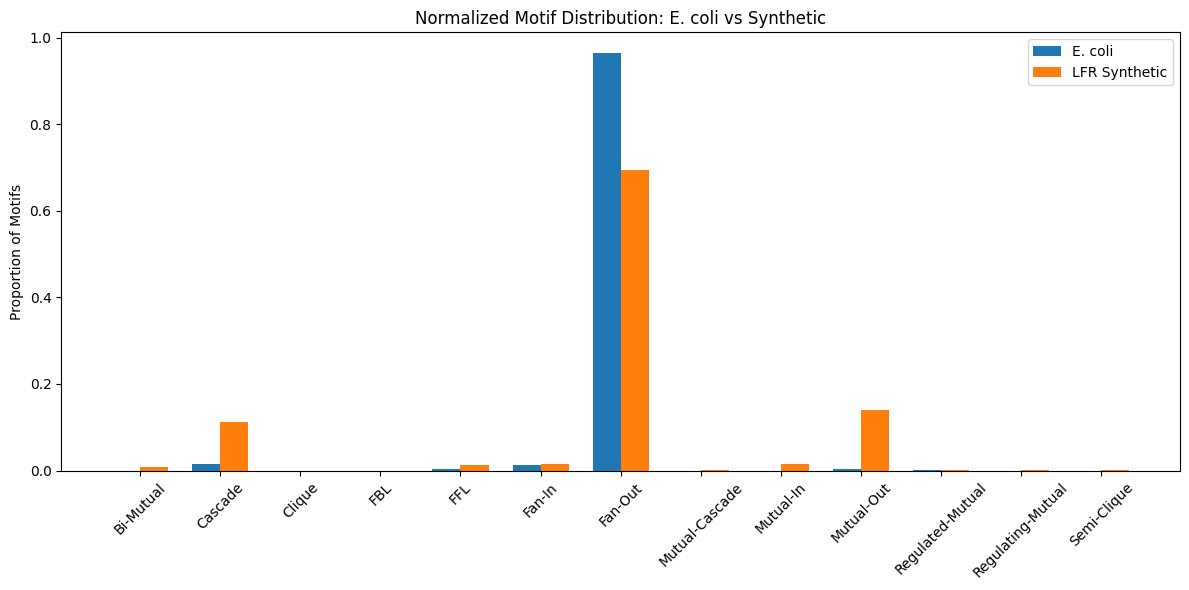

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(motifs))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, normalized_ecoli, width, label='E. coli')
rects2 = ax.bar(x + width/2, normalized_lfr, width, label='GRNgene')

ax.set_ylabel('Proportion of Motifs')
ax.set_title('Normalized Motif Distribution: E. coli vs GRNgene')
ax.set_xticks(x)
ax.set_xticklabels(motifs, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


In [120]:
from scipy.special import rel_entr

kl_div = np.sum(rel_entr(normalized_lfr + 1e-12, normalized_ecoli + 1e-12))
print(f"KL Divergence (LFR || E. coli): {kl_div:.4f}")

KL Divergence (LFR || E. coli): 0.6943


In [ ]:
from scipy.stats import spearmanr

corr, p_corr = spearmanr(counts_lfr, counts_ecoli)
print(f"Spearman correlation: {corr:.3f} (p={p_corr:.5f})")

Spearman correlation: 0.840 (p=0.000)


# RegulonDB

In [24]:
import pandas as pd
import networkx as nx
file_path = 'data/regulondb/NetworkRegulatorGene.tsv'
# Skip lines until the header is reached (first line that starts with "1)regulatorId")
with open(file_path, "r") as file:
    for i, line in enumerate(file):
        if line.startswith("1)regulatorId"):
            header_index = i
            break

# Load the data into a DataFrame
df = pd.read_csv(file_path, sep="\t", skiprows=header_index + 1,
                 names=["regulatorId", "regulatorName", "RegulatorGeneName",
                        "regulatedId", "regulatedName", "function", "confidenceLevel"])

# Create a directed graph
G = nx.DiGraph()

# Add edges with attributes
for _, row in df.iterrows():
    G.add_edge(
        row["regulatorName"],
        row["regulatedName"],
        function=row["function"],
        confidence=row["confidenceLevel"]
    )

# Summary of the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
example_edges = list(G.edges(data=True))[:5]

num_nodes, num_edges, example_edges

(3094,
 7283,
 [('ppGpp', 'hisM', {'function': '-', 'confidence': 'W '}),
  ('ppGpp', 'agp', {'function': '+', 'confidence': 'W '}),
  ('ppGpp', 'cysQ', {'function': '+', 'confidence': 'W '}),
  ('ppGpp', 'argI', {'function': '+', 'confidence': 'W '}),
  ('ppGpp', 'argS', {'function': '-', 'confidence': 'W '})])

In [25]:
import pandas as pd
import networkx as nx

# Load the file
df = pd.read_csv(file_path, sep="\t", comment='#', 
                 names=["regulatorId", "regulatorName", "RegulatorGeneName",
                        "regulatedId", "regulatedName", "function", "confidenceLevel"])

# Filter for confirmed interactions
confirmed_df = df[df["confidenceLevel"].str.strip() == "C"]

# Build the directed graph with confirmed interactions
G_confirmed = nx.DiGraph()
for _, row in confirmed_df.iterrows():
    G_confirmed.add_edge(
        row["regulatorName"],
        row["regulatedName"]
    )

# Filter for confirmed ('C') or strong ('S') interactions
high_conf_df = df[df["confidenceLevel"].str.strip().isin(["C", "S"])]

# Build the directed graph with high-confidence interactions
G_high_conf = nx.DiGraph()
for _, row in high_conf_df.iterrows():
    G_high_conf.add_edge(
        row["regulatorName"],
        row["regulatedName"]
    )


In [51]:
G_confirmed.number_of_nodes()

1100

In [ ]:
G_high_conf.number_of_nodes()

2499

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


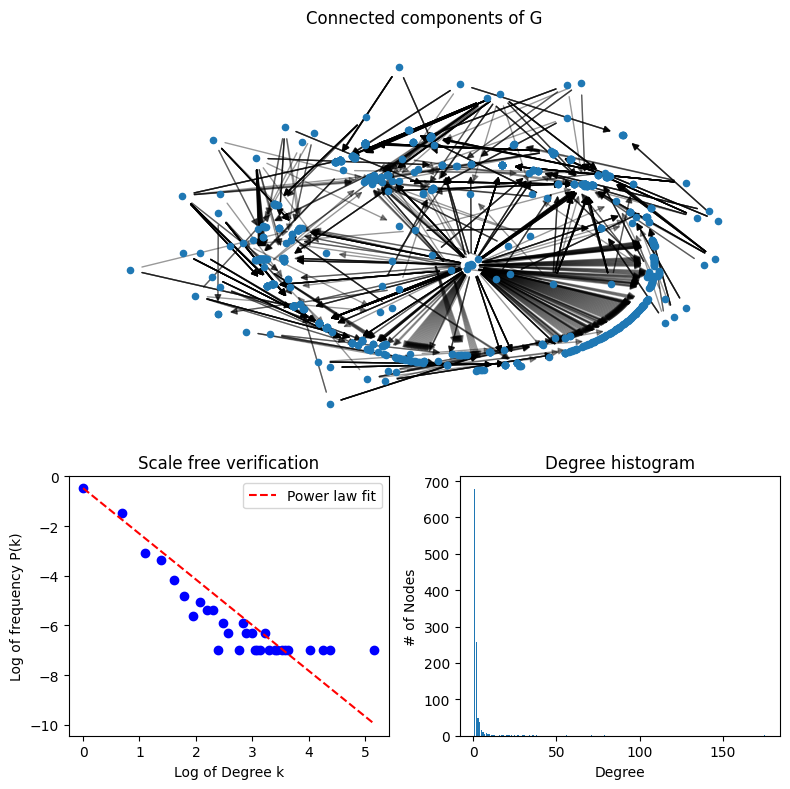

Graph strongly connected: False
Graph weakly connected: False
Modularity of the graph: 0.8279180552398854
Fitted power law parameters: a = 0.63, b = -1.84


In [50]:
rdb_adj_mx = nx.adjacency_matrix(G_confirmed)
plot_grn_degree(rdb_adj_mx, plot_network=True)
gnw_properties = graph_properties(rdb_adj_mx)

The graph has been loaded as directed graph.
Plotting the graph...
Computing the degree distribution...
Plotting the scale free verification...
Fitting the power law distribution to the degree distribution...


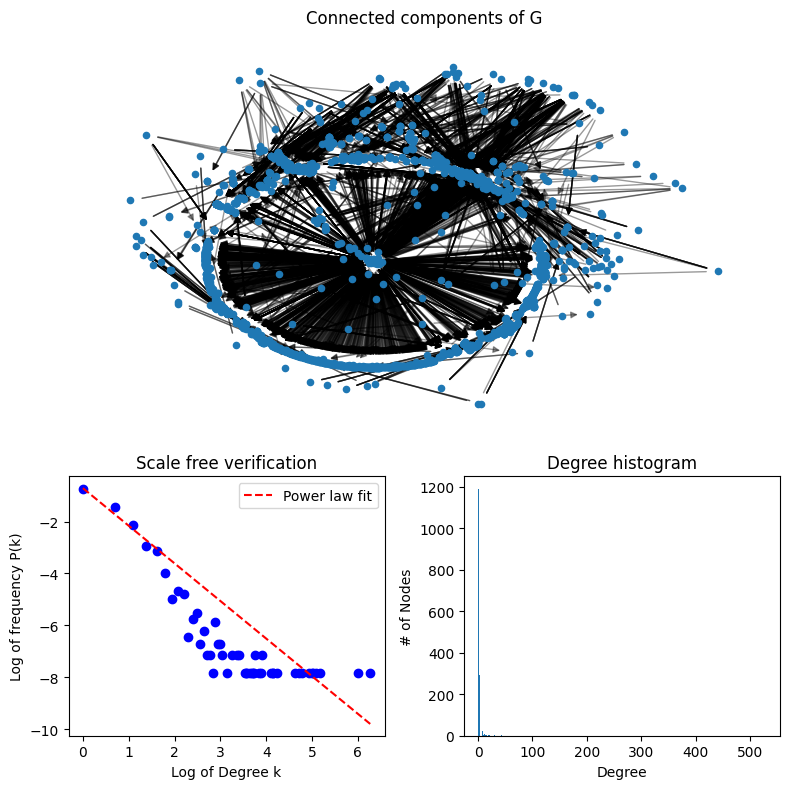

Graph strongly connected: False
Graph weakly connected: False
Modularity of the graph: 0.664090529630537
Fitted power law parameters: a = 0.49, b = -1.45


In [57]:
rdb_high_adj_mx = nx.adjacency_matrix(G_high_conf)
plot_grn_degree(rdb_high_adj_mx, plot_network=True)
gnw_properties = graph_properties(rdb_high_adj_mx)

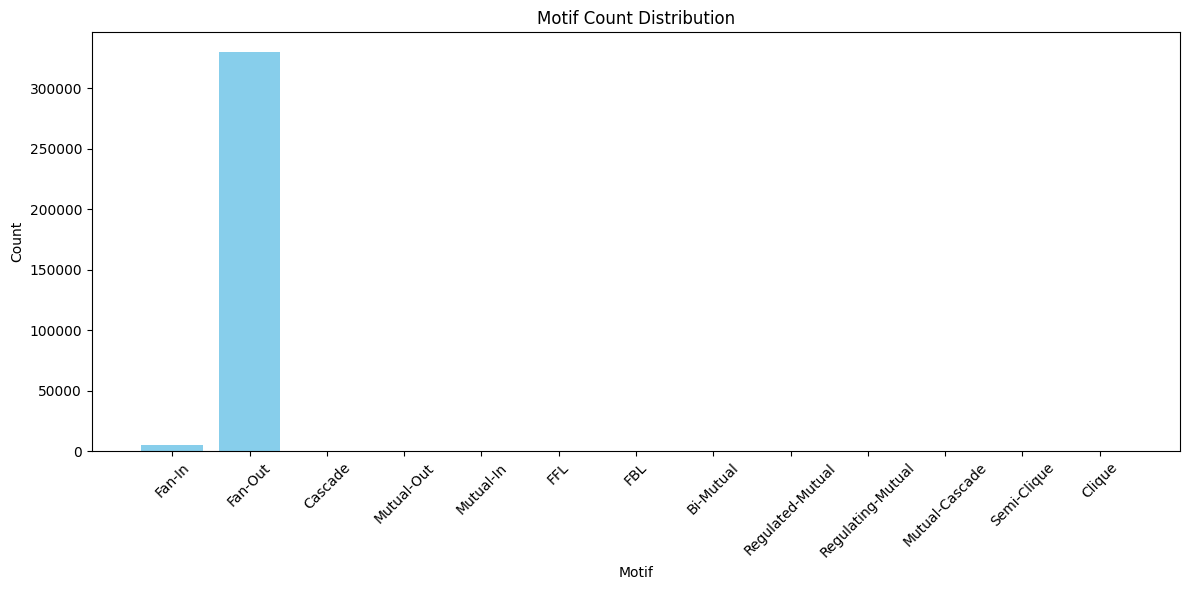

In [58]:
db_high_motifs = subgraph3N(G_high_conf)
db_high_motifs_count=get_all_motifs_count(db_high_motifs)


# Plot the motifs count
plot_motifs_count(db_high_motifs_count)

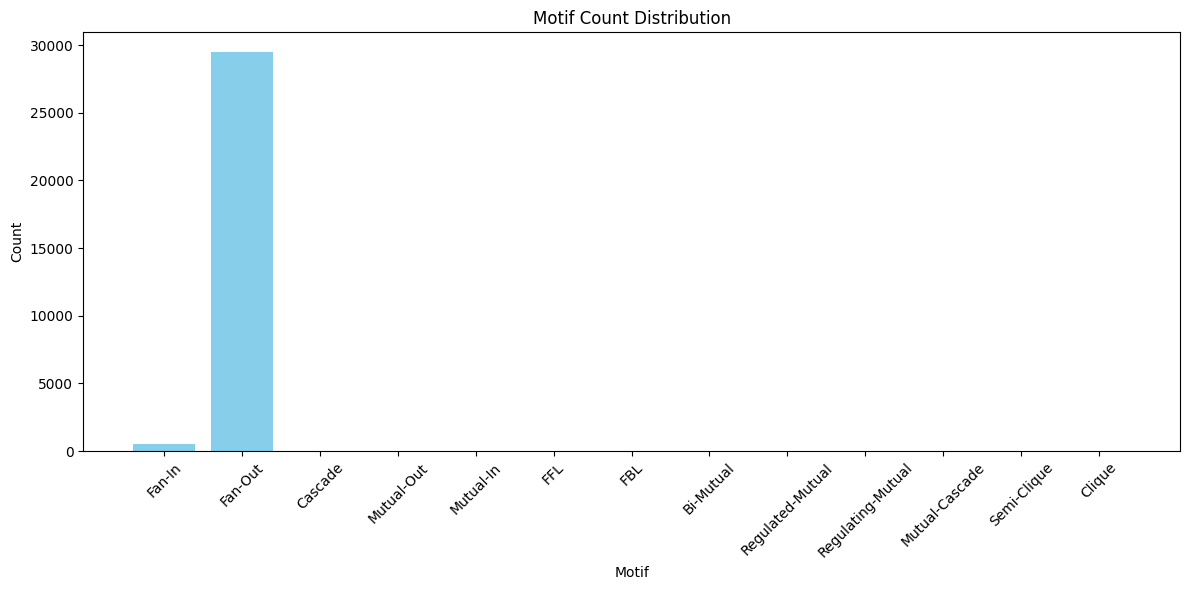

In [52]:
db_motifs = subgraph3N(G_confirmed)
db_motifs_count=get_all_motifs_count(db_motifs)


# Plot the motifs count
plot_motifs_count(db_motifs_count)

## Alon like network detection

In [ ]:
import networkx as nx
from networkx.algorithms.isomorphism import DiGraphMatcher
from collections import Counter

def generate_motif_templates():
    """Generates canonical 3-node motif templates."""
    templates = {}

    def add_motif(name, edges):
        G = nx.DiGraph()
        G.add_edges_from(edges)
        templates[name] = G

    # Basic motif types
    add_motif("Fan-In", [(1, 0), (2, 0)])
    add_motif("Fan-Out", [(0, 1), (0, 2)])
    add_motif("Cascade", [(0, 1), (1, 2)])
    add_motif("FFL", [(0, 1), (1, 2), (0, 2)])
    add_motif("FBL", [(0, 1), (1, 2), (2, 0)])
    add_motif("Bi-Mutual", [(0, 1), (1, 0), (1, 2), (2, 1)])
    add_motif("Clique", [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1)])
    # Extend here as needed

    return templates

def classify_subgraph(subG, motif_templates):
    """Classifies a 3-node subgraph by matching it to motif templates."""
    for name, motifG in motif_templates.items():
        matcher = DiGraphMatcher(subG, motifG)
        if matcher.is_isomorphic():
            return name
    return "Other"

def fast_count_motifs(G):
    """
    Counts motifs using edge-induced triplet enumeration.
    
    Parameters:
        G (nx.DiGraph): Directed graph.
    
    Returns:
        Counter: motif type -> count
    """
    motif_templates = generate_motif_templates()
    motif_counts = Counter()
    seen_triplets = set()

    for u, v in G.edges:
        neighbors = set(G.successors(u)).union(
            G.predecessors(u),
            G.successors(v),
            G.predecessors(v)
        )
        neighbors.discard(u)
        neighbors.discard(v)

        for w in neighbors:
            triplet = tuple(sorted([u, v, w]))
            if triplet in seen_triplets:
                continue
            seen_triplets.add(triplet)

            subG = G.subgraph(triplet).copy()
            if nx.is_weakly_connected(subG):
                motif_type = classify_subgraph(subG, motif_templates)
                motif_counts[motif_type] += 1

    return motif_counts

def count_connected_triplets_only(G):
    """
    Counts how many connected 3-node triplets exist (for benchmarking).
    """
    seen_triplets = set()
    total = 0

    for u, v in G.edges:
        neighbors = set(G.successors(u)).union(
            G.predecessors(u),
            G.successors(v),
            G.predecessors(v)
        )
        neighbors.discard(u)
        neighbors.discard(v)

        for w in neighbors:
            triplet = tuple(sorted([u, v, w]))
            if triplet in seen_triplets:
                continue
            seen_triplets.add(triplet)

            subG = G.subgraph(triplet).copy()
            if nx.is_weakly_connected(subG):
                total += 1

    print(f"Connected 3-node triplets: {total}")
    return total



In [63]:
# Count motifs in your graph (e.g., G_confirmed)
motif_counts = fast_count_motifs(G_confirmed)
print(motif_counts)

# Optionally, benchmark the number of connected triplets
count_connected_triplets_only(G_confirmed)


Counter({'Fan-Out': 29466, 'Fan-In': 552})
✅ Connected 3-node triplets: 30018


30018

In [ ]:
def graph_benchmark_stats(G):
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    density = nx.density(G)
    avg_degree = sum(dict(G.degree()).values()) / n_nodes
    triplets_total = n_nodes * (n_nodes - 1) * (n_nodes - 2) // 6
    
    print(f"Graph stats:")
    print(f" - Nodes: {n_nodes}")
    print(f" - Edges: {n_edges}")
    print(f" - Density: {density:.6f}")
    print(f" - Avg Degree: {avg_degree:.2f}")
    print(f" - Total 3-node combinations: {triplets_total:,}")
    
    # Estimate: % of triplets connected by at least one edge
    est_connected_triplets = (n_edges * avg_degree)  # rough estimate
    print(f" - ~Estimated connected triplets: {int(est_connected_triplets):,}")
    print(f" - Sparsity: {(est_connected_triplets / triplets_total):.6f} (lower = sparser)")
    
    return {
        "nodes": n_nodes,
        "edges": n_edges,
        "density": density,
        "triplets_total": triplets_total,
        "est_connected_triplets": est_connected_triplets
    }

# Example usage:
graph_benchmark_stats(G_confirmed)


📊 Graph stats:
 - Nodes: 1100
 - Edges: 1361
 - Density: 0.001126
 - Avg Degree: 2.47
 - Total 3-node combinations: 221,228,700
 - ~Estimated connected triplets: 3,367
 - Sparsity: 0.000015 (lower = sparser)


{'nodes': 1100,
 'edges': 1361,
 'density': 0.0011258168583009346,
 'triplets_total': 221228700,
 'est_connected_triplets': 3367.8563636363638}

In [ ]:
max(dict(G_confirmed.degree()).values())

175

Detected 81 communities.
Community sizes: [152, 108, 87, 72, 62, 54, 44, 37, 35, 31, 26, 24, 20, 19, 18, 18, 17, 11, 10, 10, 9, 9, 8, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Estimated mu (mixing parameter): 0.0149
Estimated tau2 (community size exponent): 2.162


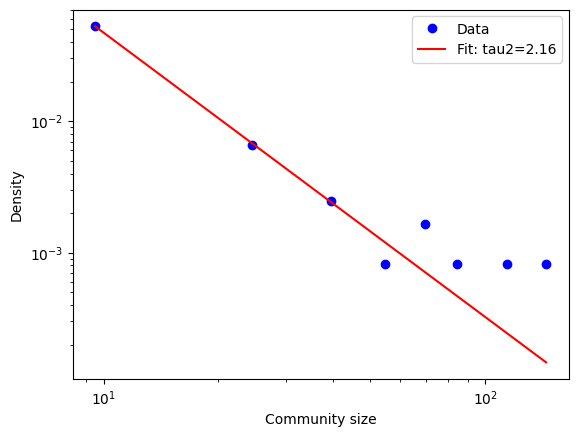

In [28]:
import networkx as nx
from collections import Counter

# Use networkx's built-in community detection (greedy modularity)
communities = list(nx.algorithms.community.greedy_modularity_communities(G_confirmed))

# Build partition dictionary: node -> community_id
partition = {}
for i, com in enumerate(communities):
    for node in com:
        partition[node] = i

# Get community sizes
community_sizes = [len(com) for com in communities]
print(f"Detected {len(communities)} communities.")
print(f"Community sizes: {community_sizes}")

def calculate_mu(G, partition):
    mu_values = []
    for node in G.nodes():
        community = partition[node]
        internal = sum(1 for neighbor in G.neighbors(node) if partition[neighbor] == community)
        total = len(list(G.neighbors(node)))
        if total > 0:
            mu_values.append(1 - (internal / total))
    return sum(mu_values) / len(mu_values)

mu = calculate_mu(G_confirmed, partition)
print(f"Estimated mu (mixing parameter): {mu:.4f}")

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Power-law fitting function
def power_law(x, a, b):
    return a * np.power(x, b)

# Prepare data
sizes = np.array(community_sizes)
hist, bin_edges = np.histogram(sizes, bins=10, density=True)
x = (bin_edges[1:] + bin_edges[:-1]) / 2  # midpoints

# Fit
popt, _ = curve_fit(power_law, x, hist)
a, b = popt
tau2 = -b
print(f"Estimated tau2 (community size exponent): {tau2:.3f}")

# Plot
plt.loglog(x, hist, 'bo', label="Data")
plt.loglog(x, power_law(x, *popt), 'r-', label=f"Fit: tau2={tau2:.2f}")
plt.xlabel("Community size")
plt.ylabel("Density")
plt.legend()
plt.show()

In [72]:
graph_benchmark_stats(G)

📊 Graph stats:
 - Nodes: 1565
 - Edges: 7720
 - Density: 0.003154
 - Avg Degree: 9.87
 - Total 3-node combinations: 637,615,430
 - ~Estimated connected triplets: 76,164
 - Sparsity: 0.000119 (lower = sparser)


{'nodes': 1565,
 'edges': 7720,
 'density': 0.0031540328313572966,
 'triplets_total': 637615430,
 'est_connected_triplets': 76164.08945686901}

# Metrics

KS Statistic: 0.8126627064216435, p-value: 0.0
Generated GRN Clustering Coefficient: 0.009928196029141214
Known GRN Clustering Coefficient: 0.13291362343159122


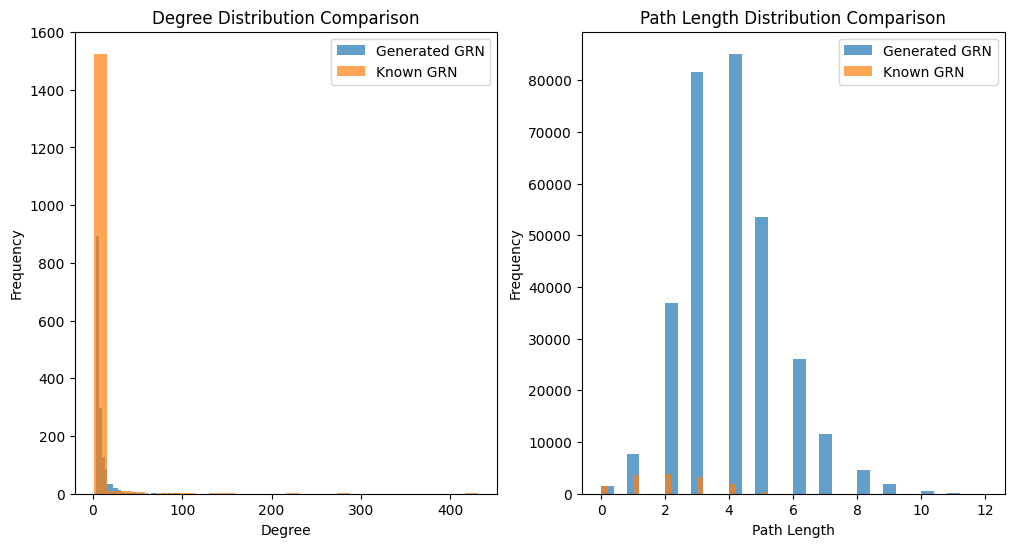

Generated GRN Assortativity: -0.1850602048988838
Known GRN Assortativity: 0.04987603004332345


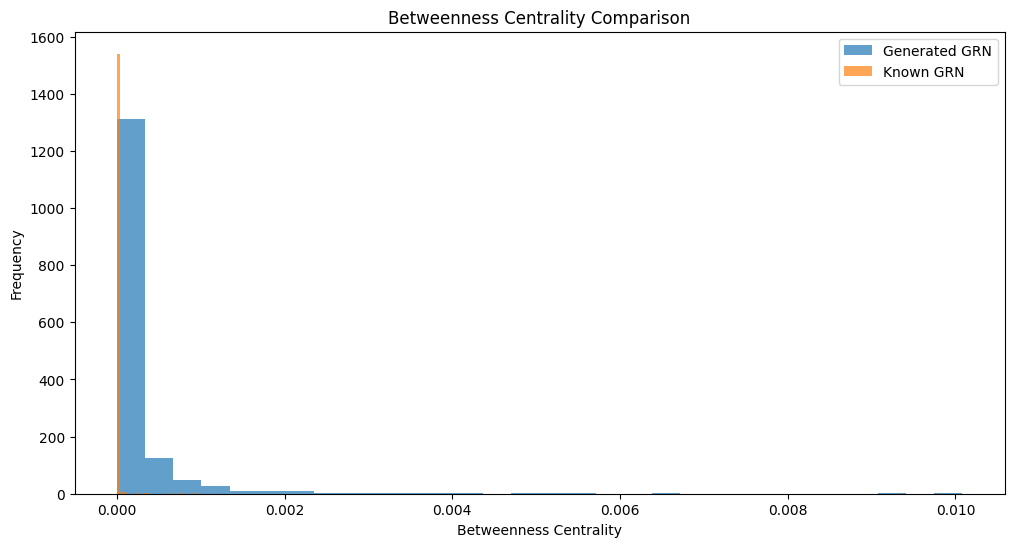

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Load or generate your GRN and the known GRN (e.g., E.Coli TF network)
filepath = 'data/gnw/Ecoli-full.tsv'
adj_mx = adj_mx_gnw_goldstandard(filepath)
generated_grn = nx.from_numpy_array(grgene_adj_mx, create_using=nx.DiGraph)
known_grn = nx.from_numpy_array(adj_mx, create_using=nx.DiGraph)

# Degree distribution comparison
generated_degrees = [d for n, d in generated_grn.degree()]
known_degrees = [d for n, d in known_grn.degree()]

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(generated_degrees, bins=30, alpha=0.7, label='Generated GRN')
plt.hist(known_degrees, bins=30, alpha=0.7, label='Known GRN')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.title('Degree Distribution Comparison')

# KS test for degree distribution
ks_stat, ks_p_value = ks_2samp(generated_degrees, known_degrees)
print(f"KS Statistic: {ks_stat}, p-value: {ks_p_value}")

# Clustering coefficient comparison
generated_clustering = nx.average_clustering(generated_grn)
known_clustering = nx.average_clustering(known_grn)
print(f"Generated GRN Clustering Coefficient: {generated_clustering}")
print(f"Known GRN Clustering Coefficient: {known_clustering}")

# Path length distribution comparison
generated_path_lengths = dict(nx.shortest_path_length(generated_grn))
known_path_lengths = dict(nx.shortest_path_length(known_grn))

generated_lengths = [length for lengths in generated_path_lengths.values() for length in lengths.values()]
known_lengths = [length for lengths in known_path_lengths.values() for length in lengths.values()]

plt.subplot(122)
plt.hist(generated_lengths, bins=30, alpha=0.7, label='Generated GRN')
plt.hist(known_lengths, bins=30, alpha=0.7, label='Known GRN')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Path Length Distribution Comparison')

plt.show()

# Assortativity comparison
generated_assortativity = nx.degree_assortativity_coefficient(generated_grn)
known_assortativity = nx.degree_assortativity_coefficient(known_grn)
print(f"Generated GRN Assortativity: {generated_assortativity}")
print(f"Known GRN Assortativity: {known_assortativity}")

# Betweenness centrality comparison
generated_betweenness = nx.betweenness_centrality(generated_grn)
known_betweenness = nx.betweenness_centrality(known_grn)

generated_betweenness_values = list(generated_betweenness.values())
known_betweenness_values = list(known_betweenness.values())

plt.figure(figsize=(12, 6))
plt.hist(generated_betweenness_values, bins=30, alpha=0.7, label='Generated GRN')
plt.hist(known_betweenness_values, bins=30, alpha=0.7, label='Known GRN')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.title('Betweenness Centrality Comparison')
plt.show()

# # Eigenvector centrality comparison
# generated_eigenvector = nx.eigenvector_centrality(generated_grn)
# known_eigenvector = nx.eigenvector_centrality(known_grn)

# generated_eigenvector_values = list(generated_eigenvector.values())
# known_eigenvector_values = list(known_eigenvector.values())

# plt.figure(figsize=(12, 6))
# plt.hist(generated_eigenvector_values, bins=30, alpha=0.7, label='Generated GRN')
# plt.hist(known_eigenvector_values, bins=30, alpha=0.7, label='Known GRN')
# plt.xlabel('Eigenvector Centrality')
# plt.ylabel('Frequency')
# plt.legend()
# plt.title('Eigenvector Centrality Comparison')
# plt.show()

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Load or generate your GRN and the known GRN (e.g., E.Coli TF network)
generated_grn = nx.barabasi_albert_graph(100, 3)
known_grn = nx.read_edgelist("path_to_known_grn_edgelist.txt", create_using=nx.DiGraph)

# Degree distribution comparison
generated_degrees = [d for n, d in generated_grn.degree()]
known_degrees = [d for n, d in known_grn.degree()]

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(generated_degrees, bins=30, alpha=0.7, label='Generated GRN')
plt.hist(known_degrees, bins=30, alpha=0.7, label='Known GRN')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.title('Degree Distribution Comparison')

# KS test for degree distribution
ks_stat, ks_p_value = ks_2samp(generated_degrees, known_degrees)
print(f"KS Statistic: {ks_stat}, p-value: {ks_p_value}")

# Clustering coefficient comparison
generated_clustering = nx.average_clustering(generated_grn)
known_clustering = nx.average_clustering(known_grn)
print(f"Generated GRN Clustering Coefficient: {generated_clustering}")
print(f"Known GRN Clustering Coefficient: {known_clustering}")

# Path length distribution comparison
generated_path_lengths = dict(nx.shortest_path_length(generated_grn))
known_path_lengths = dict(nx.shortest_path_length(known_grn))

generated_lengths = [length for lengths in generated_path_lengths.values() for length in lengths.values()]
known_lengths = [length for lengths in known_path_lengths.values() for length in lengths.values()]

plt.subplot(122)
plt.hist(generated_lengths, bins=30, alpha=0.7, label='Generated GRN')
plt.hist(known_lengths, bins=30, alpha=0.7, label='Known GRN')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Path Length Distribution Comparison')

plt.show()

# Assortativity comparison
generated_assortativity = nx.degree_assortativity_coefficient(generated_grn)
known_assortativity = nx.degree_assortativity_coefficient(known_grn)
print(f"Generated GRN Assortativity: {generated_assortativity}")
print(f"Known GRN Assortativity: {known_assortativity}")

# Betweenness centrality comparison
generated_betweenness = nx.betweenness_centrality(generated_grn)
known_betweenness = nx.betweenness_centrality(known_grn)

generated_betweenness_values = list(generated_betweenness.values())
known_betweenness_values = list(known_betweenness.values())

plt.figure(figsize=(12, 6))
plt.hist(generated_betweenness_values, bins=30, alpha=0.7, label='Generated GRN')
plt.hist(known_betweenness_values, bins=30, alpha=0.7, label='Known GRN')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.title('Betweenness Centrality Comparison')
plt.show()

# Eigenvector centrality comparison
generated_eigenvector = nx.eigenvector_centrality(generated_grn)
known_eigenvector = nx.eigenvector_centrality(known_grn)

generated_eigenvector_values = list(generated_eigenvector.values())
known_eigenvector_values = list(known_eigenvector.values())

plt.figure(figsize=(12, 6))
plt.hist(generated_eigenvector_values, bins=30, alpha=0.7, label='Generated GRN')
plt.hist(known_eigenvector_values, bins=30, alpha=0.7, label='Known GRN')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.title('Eigenvector Centrality Comparison')
plt.show()

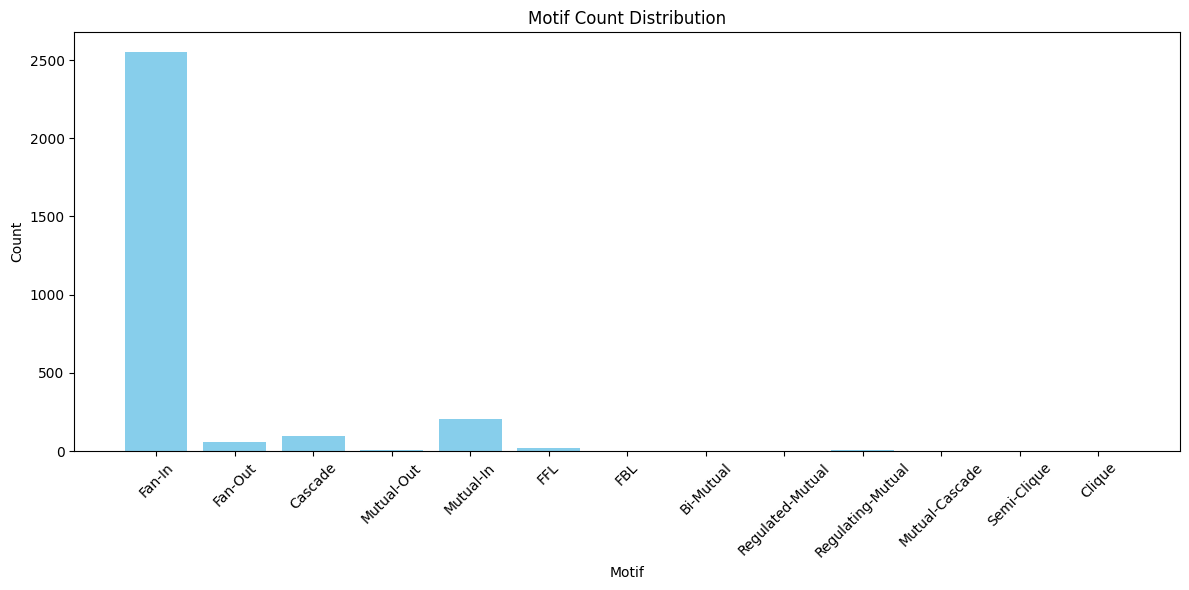

In [ ]:
barabsi_motifs = subgraph3N(barabasi_directed_graph)
motifs_count=get_all_motifs_count(barabsi_motifs)


# Plot the motifs count
plot_motifs_count(motifs_count)